In [95]:
#load dataset from excel file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ep_df = pd.read_csv(r"D:\Jeeva\ds_course\employee_attrition\employee_attrition.csv") 
ep_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [97]:
#check for number of rows and columns
ep_df.shape

(1470, 35)

In [9]:
#check for nulls along with data type
ep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [99]:
#converting column names to lower
ep_df.columns = ep_df.columns.str.lower()
ep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [13]:
# target distribution
ep_df['attrition'].value_counts(normalize=True)

attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [101]:
#drop column
ep_df.drop(columns=["over18","standardhours","employeecount"],inplace=True)
ep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeenumber            1470 non-null   int64 
 9   environmentsatisfaction   1470 non-null   int64 
 10  gender                    1470 non-null   object
 11  hourlyrate                1470 non-null   int64 
 12  jobinvolvement            1470 non-null   int64 
 13  joblevel                  1470 non-null   int64 
 14  jobrole                 

In [103]:
print(ep_df['attrition'].head(10))
print(ep_df['overtime'].head(10))
print(ep_df['gender'].head(10))

0    Yes
1     No
2    Yes
3     No
4     No
5     No
6     No
7     No
8     No
9     No
Name: attrition, dtype: object
0    Yes
1     No
2    Yes
3    Yes
4     No
5     No
6    Yes
7     No
8     No
9     No
Name: overtime, dtype: object
0    Female
1      Male
2      Male
3    Female
4      Male
5      Male
6    Female
7      Male
8      Male
9      Male
Name: gender, dtype: object


In [105]:
# Label Encoding for binary columns
df = ep_df
label_map = {
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0
}

df['attrition'] = df['attrition'].map(label_map)
df['overtime'] = df['overtime'].map(label_map)
df['gender'] = df['gender'].map(label_map)

In [107]:
cat_columns = ep_df.select_dtypes(include="object").columns
for col in cat_columns:
    uniques = ep_df[col].unique()
    print(f"Column: {col}")
    print("Unique values:", uniques)
    print("-" * 30)

Column: businesstravel
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
------------------------------
Column: department
Unique values: ['Sales' 'Research & Development' 'Human Resources']
------------------------------
Column: educationfield
Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
------------------------------
Column: jobrole
Unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
------------------------------
Column: maritalstatus
Unique values: ['Single' 'Married' 'Divorced']
------------------------------


In [109]:

# One-Hot Encoding for nominal categorical variables
one_hot_cols = ['businesstravel', 'department', 'educationfield', 'jobrole', 'maritalstatus']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True,dtype=int)
df.head(5)

age  attrition  dailyrate  distancefromhome  education  employeenumber  \
0   41          1       1102                 1          2               1   
1   49          0        279                 8          1               2   
2   37          1       1373                 2          2               4   
3   33          0       1392                 3          4               5   
4   27          0        591                 2          1               7   

   environmentsatisfaction  gender  hourlyrate  jobinvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   jobrole_Human Resources  jobrole_Laboratory Technician  jobrole_Manager  \
0                        0                              0                0   
1                        0                              0                0   
2                        0                              1                0   
3                        0                              0                0   
4                        0                              1                0   

   jobrole_Manufacturing Director  jobrole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   jobrole_Research Scientist  jobrole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   jobrole_Sales Representative  maritalstatus_Married  maritalstatus_Single  
0                             0                      0                     1  
1                             0                      1                     0  
2                             0                      0                     1  
3                             0                      1                     0  
4                             0                      1                     0  

[5 rows x 46 columns]

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   age                                1470 non-null   int64
 1   attrition                          1470 non-null   int64
 2   dailyrate                          1470 non-null   int64
 3   distancefromhome                   1470 non-null   int64
 4   education                          1470 non-null   int64
 5   employeenumber                     1470 non-null   int64
 6   environmentsatisfaction            1470 non-null   int64
 7   gender                             1470 non-null   int64
 8   hourlyrate                         1470 non-null   int64
 9   jobinvolvement                     1470 non-null   int64
 10  joblevel                           1470 non-null   int64
 11  jobsatisfaction                    1470 non-null   int64
 12  monthlyincome       

In [113]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   age                                1470 non-null   int64
 1   attrition                          1470 non-null   int64
 2   dailyrate                          1470 non-null   int64
 3   distancefromhome                   1470 non-null   int64
 4   education                          1470 non-null   int64
 5   employeenumber                     1470 non-null   int64
 6   environmentsatisfaction            1470 non-null   int64
 7   gender                             1470 non-null   int64
 8   hourlyrate                         1470 non-null   int64
 9   jobinvolvement                     1470 non-null   int64
 10  joblevel                           1470 non-null   int64
 11  jobsatisfaction                    1470 non-null   int64
 12  monthlyincome       

In [115]:
#cleaned data
df.to_csv(r"D:\Jeeva\ds_course\employee_attrition\employee_attrition_cleaned.csv",index=False)

In [117]:
import pandas as pd
cl_df = pd.read_csv(r"D:\Jeeva\ds_course\employee_attrition\employee_attrition_cleaned.csv")
print(cl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   age                                1470 non-null   int64
 1   attrition                          1470 non-null   int64
 2   dailyrate                          1470 non-null   int64
 3   distancefromhome                   1470 non-null   int64
 4   education                          1470 non-null   int64
 5   employeenumber                     1470 non-null   int64
 6   environmentsatisfaction            1470 non-null   int64
 7   gender                             1470 non-null   int64
 8   hourlyrate                         1470 non-null   int64
 9   jobinvolvement                     1470 non-null   int64
 10  joblevel                           1470 non-null   int64
 11  jobsatisfaction                    1470 non-null   int64
 12  monthlyincome       

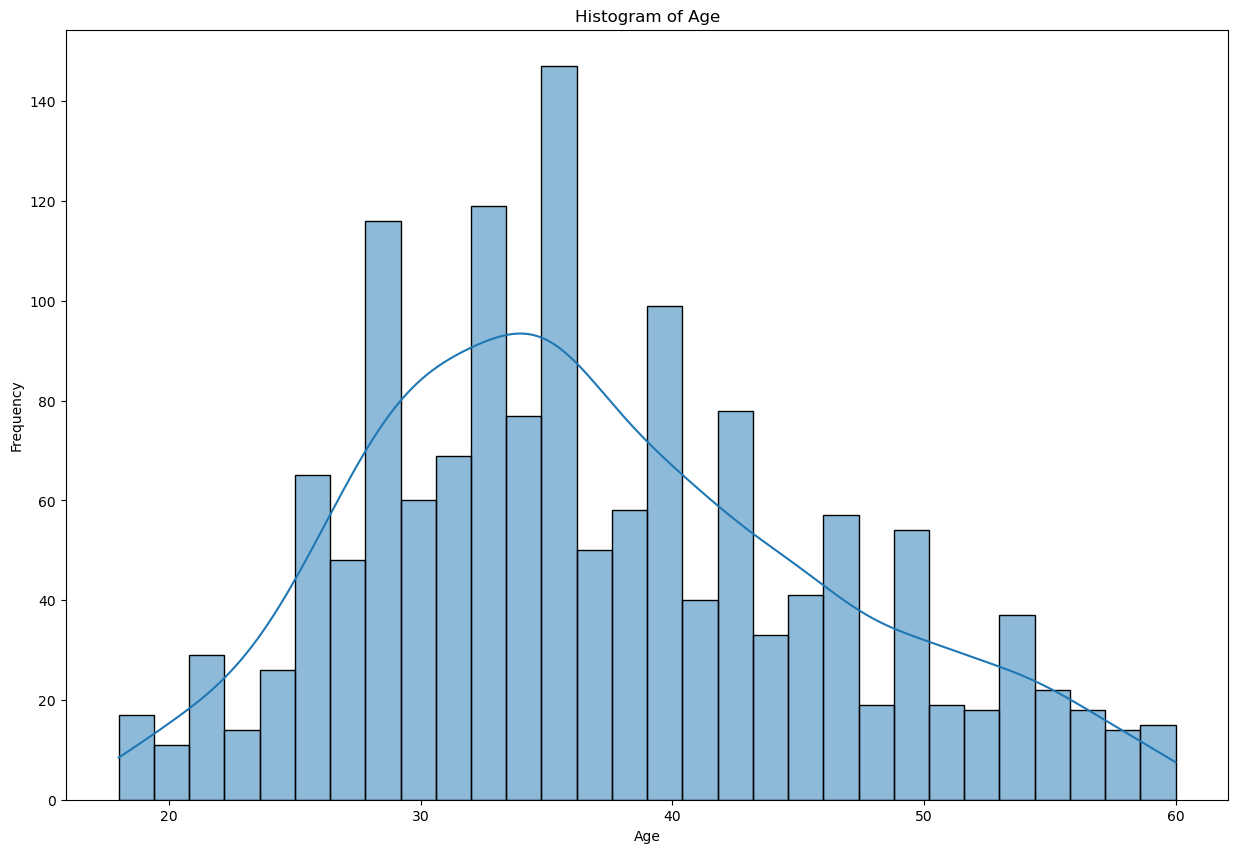

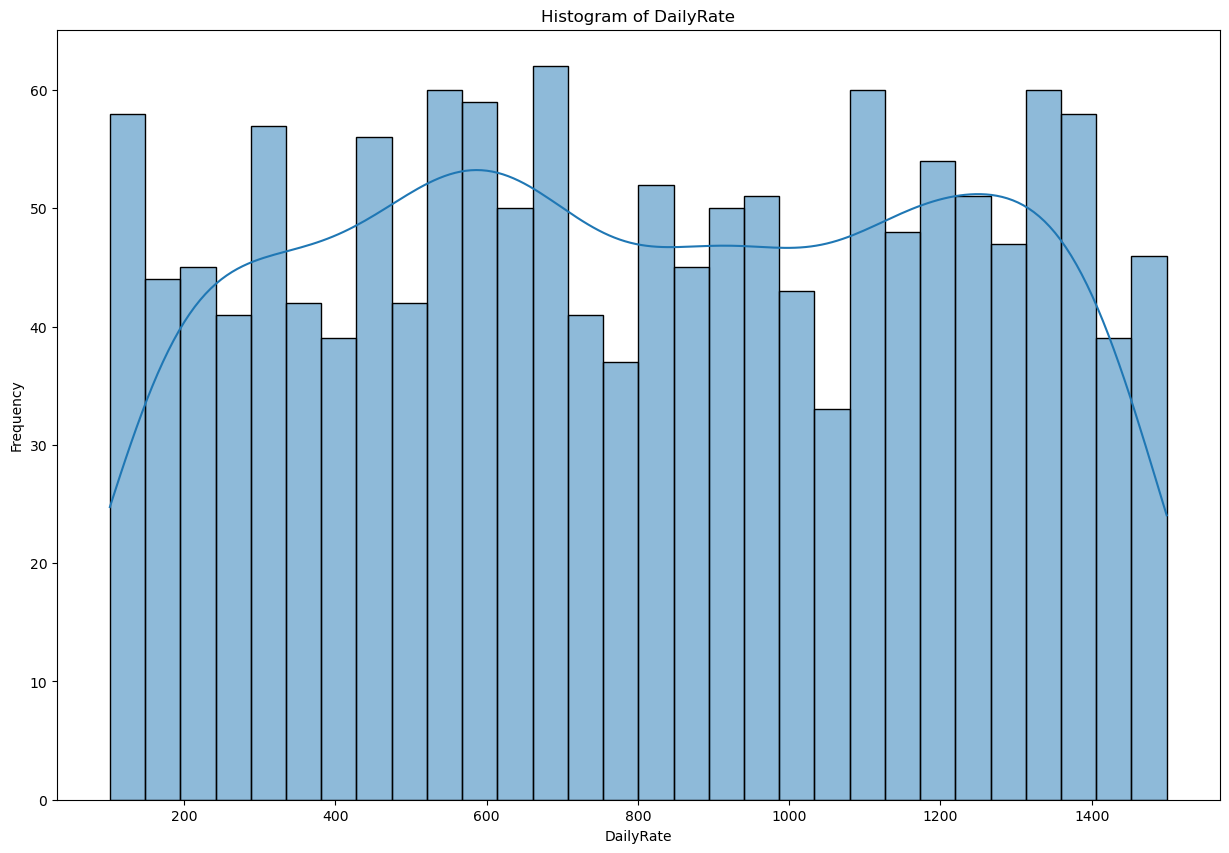

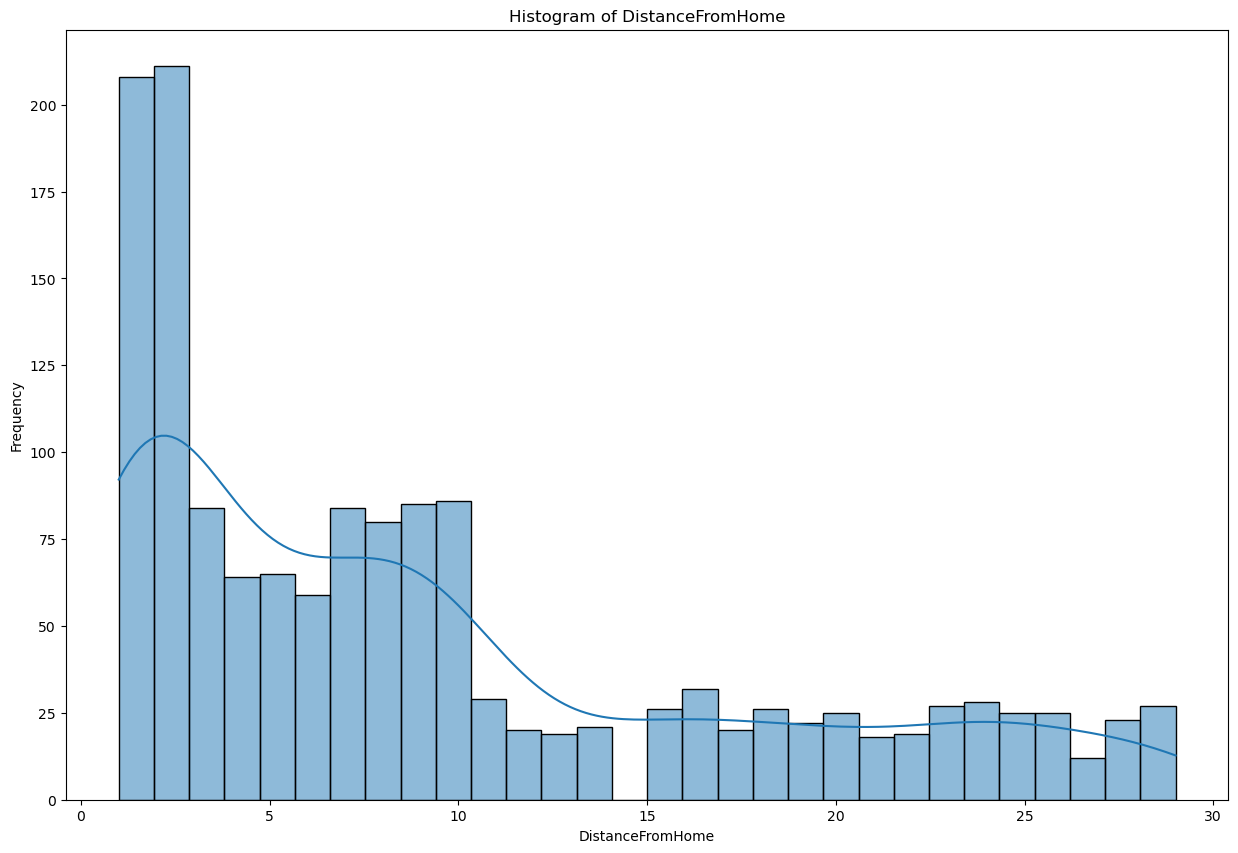

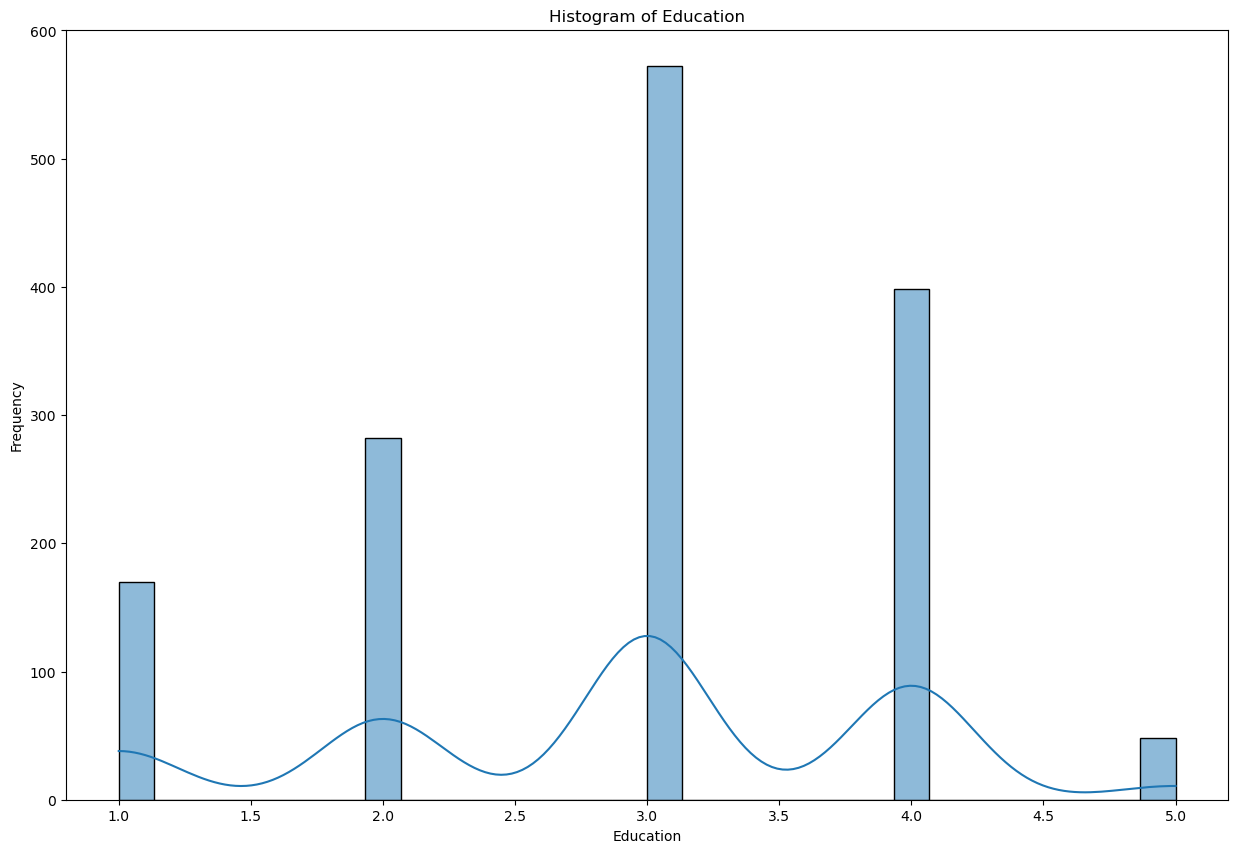

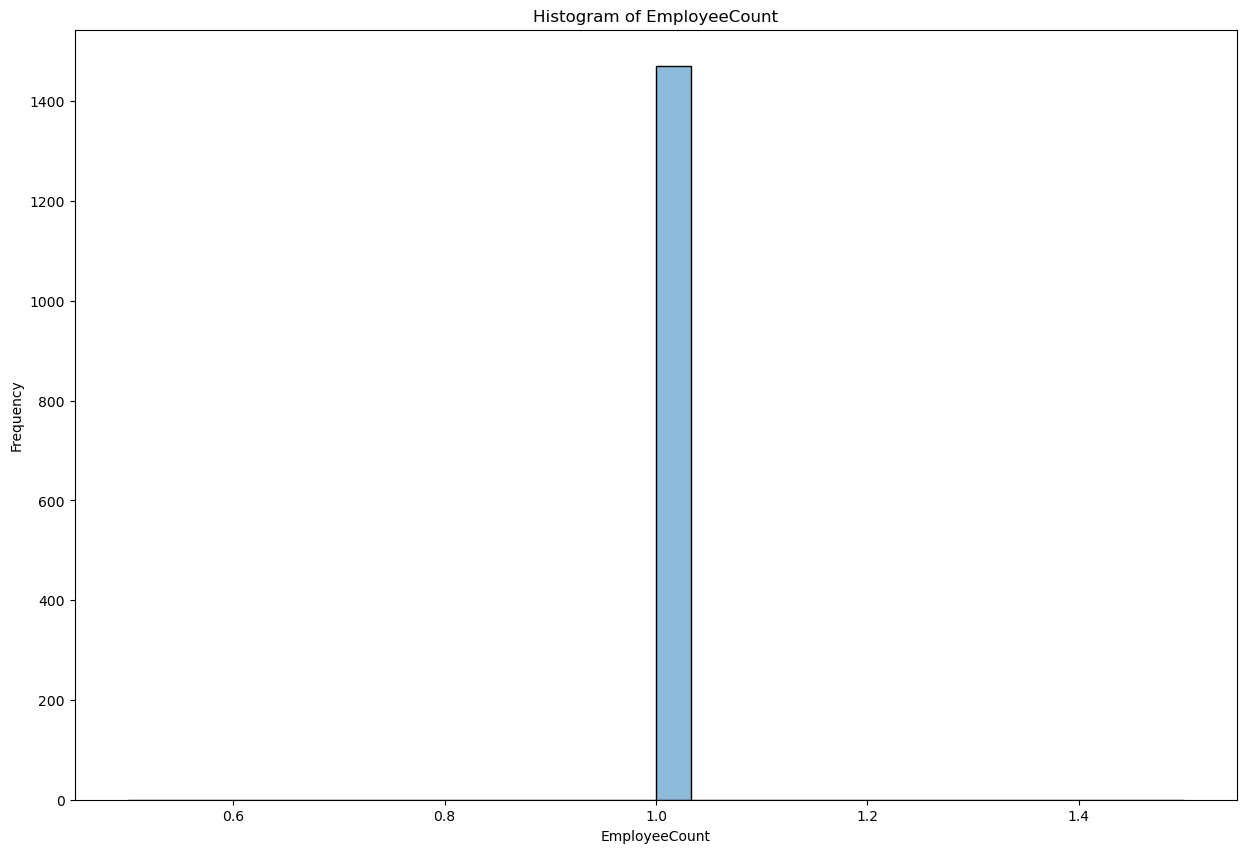

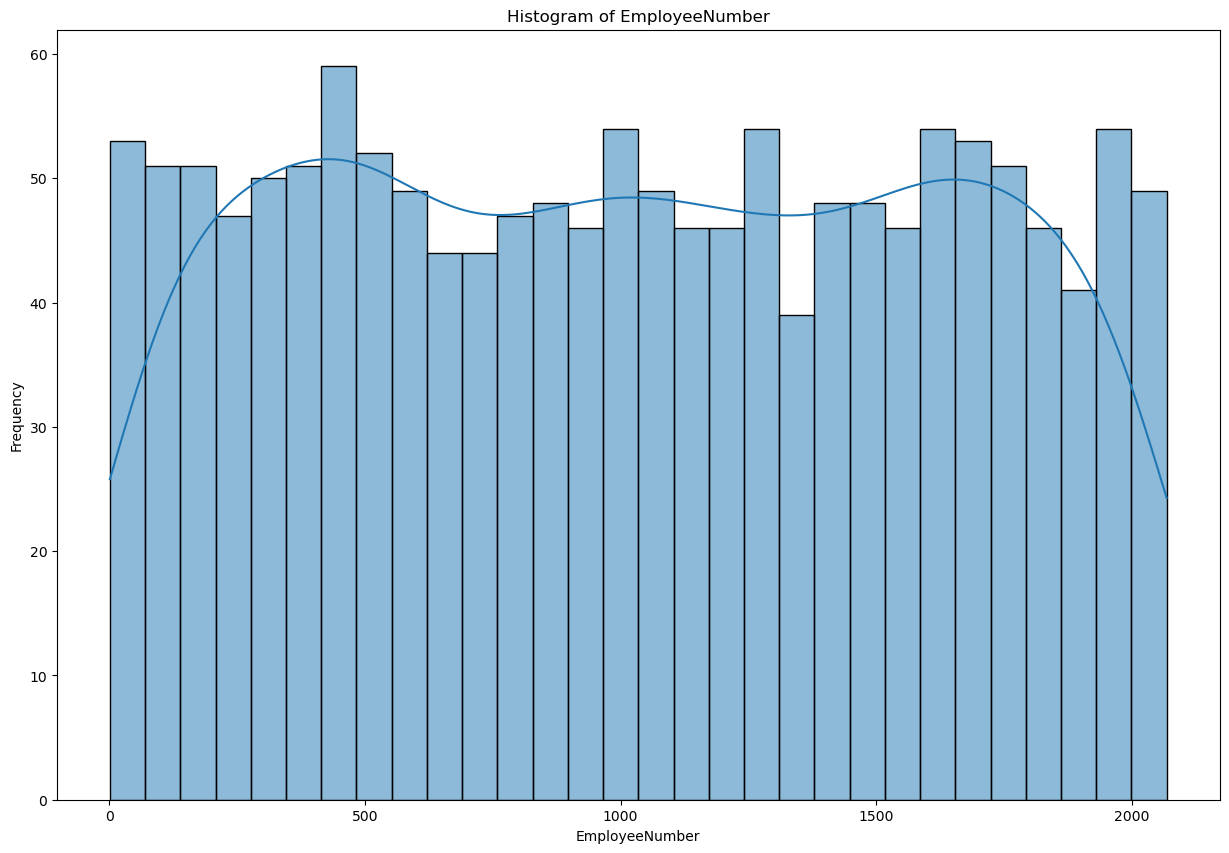

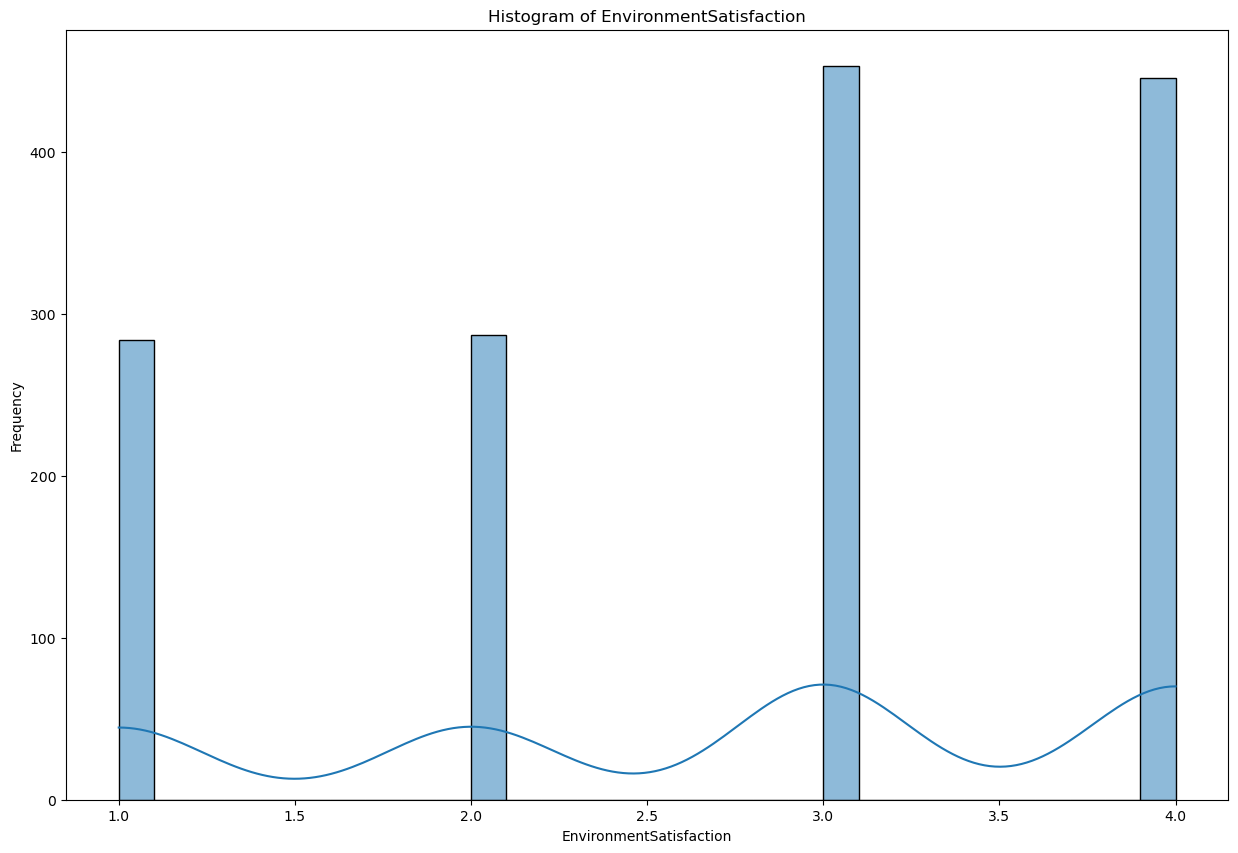

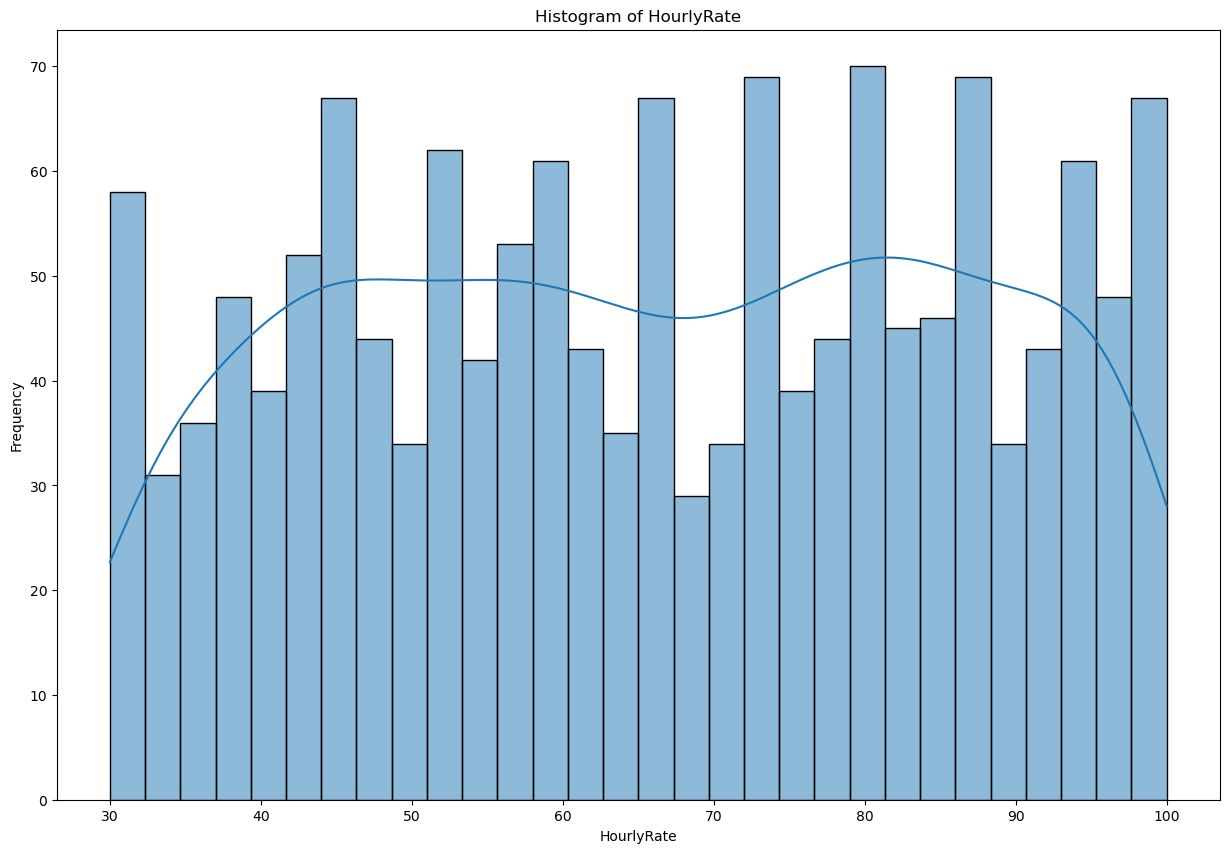

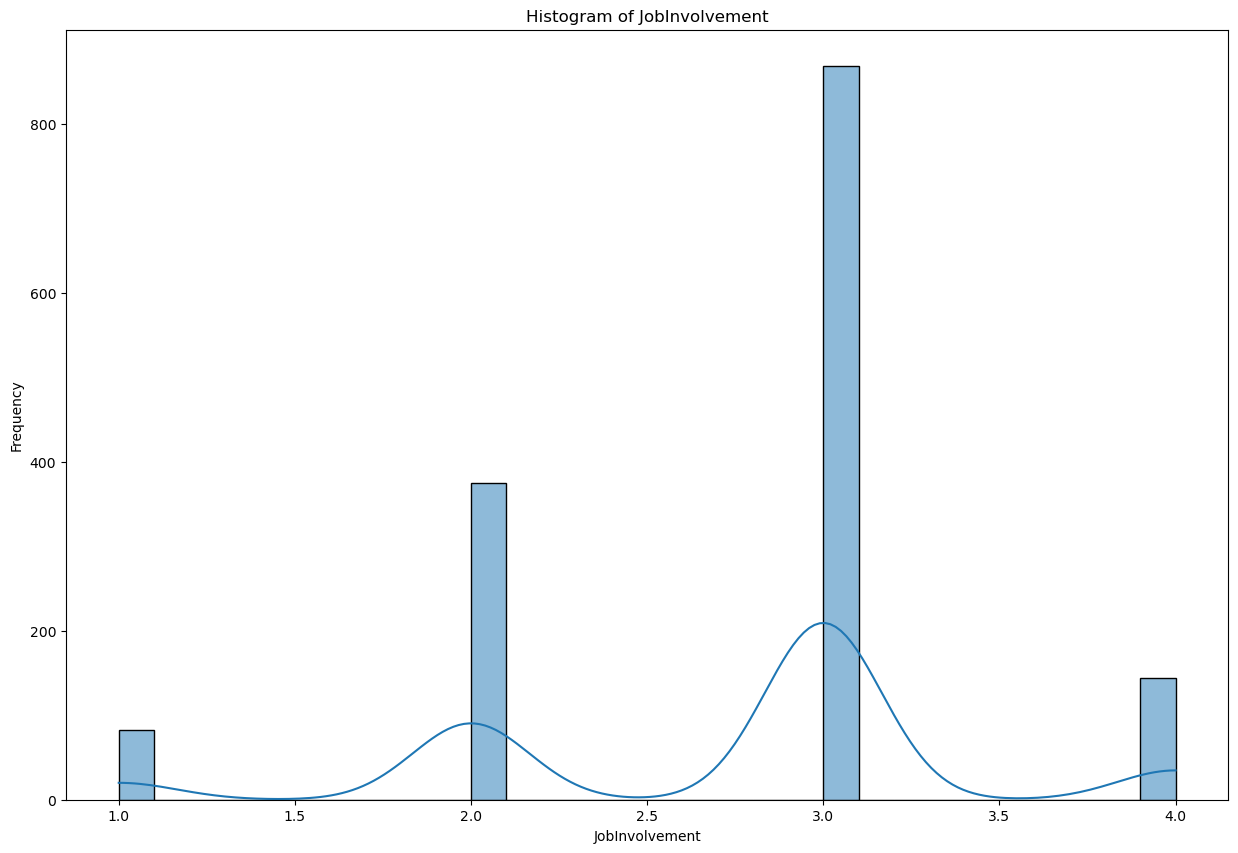

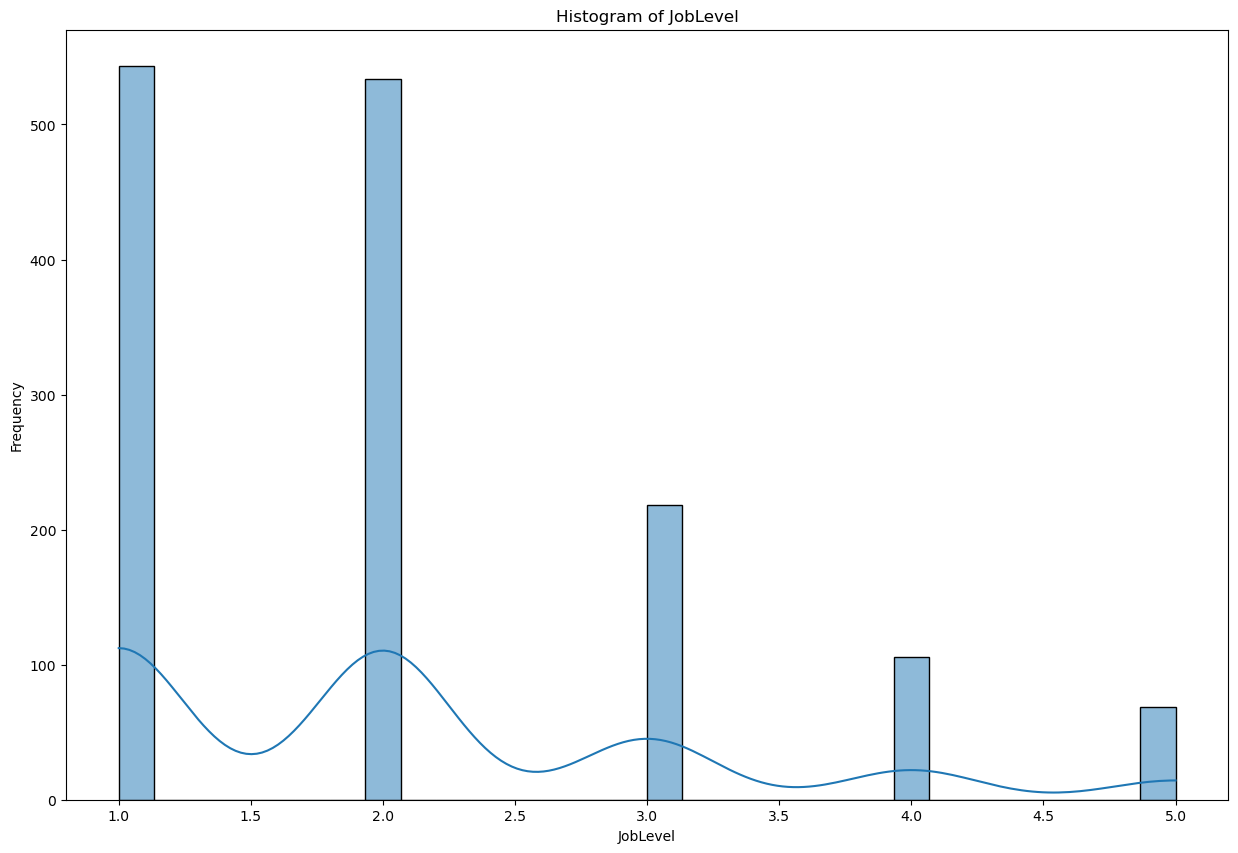

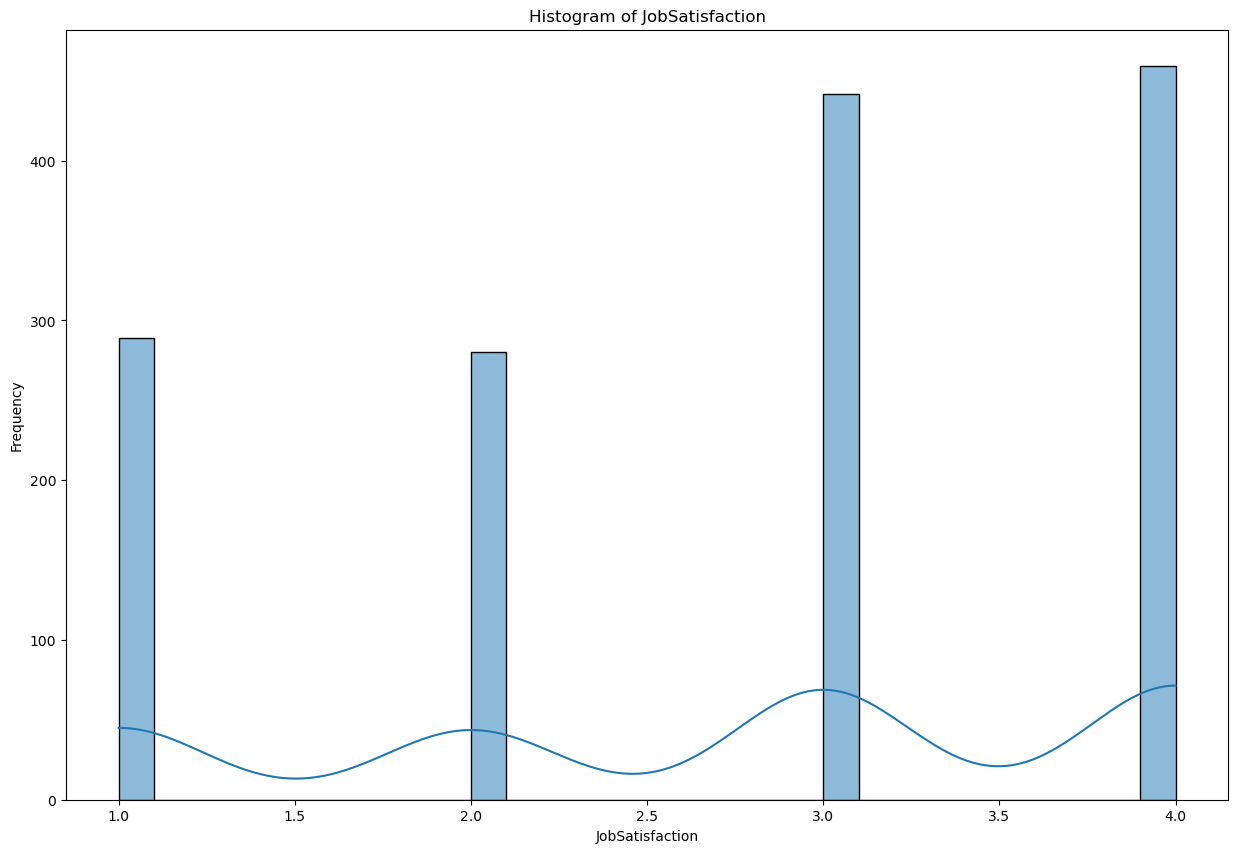

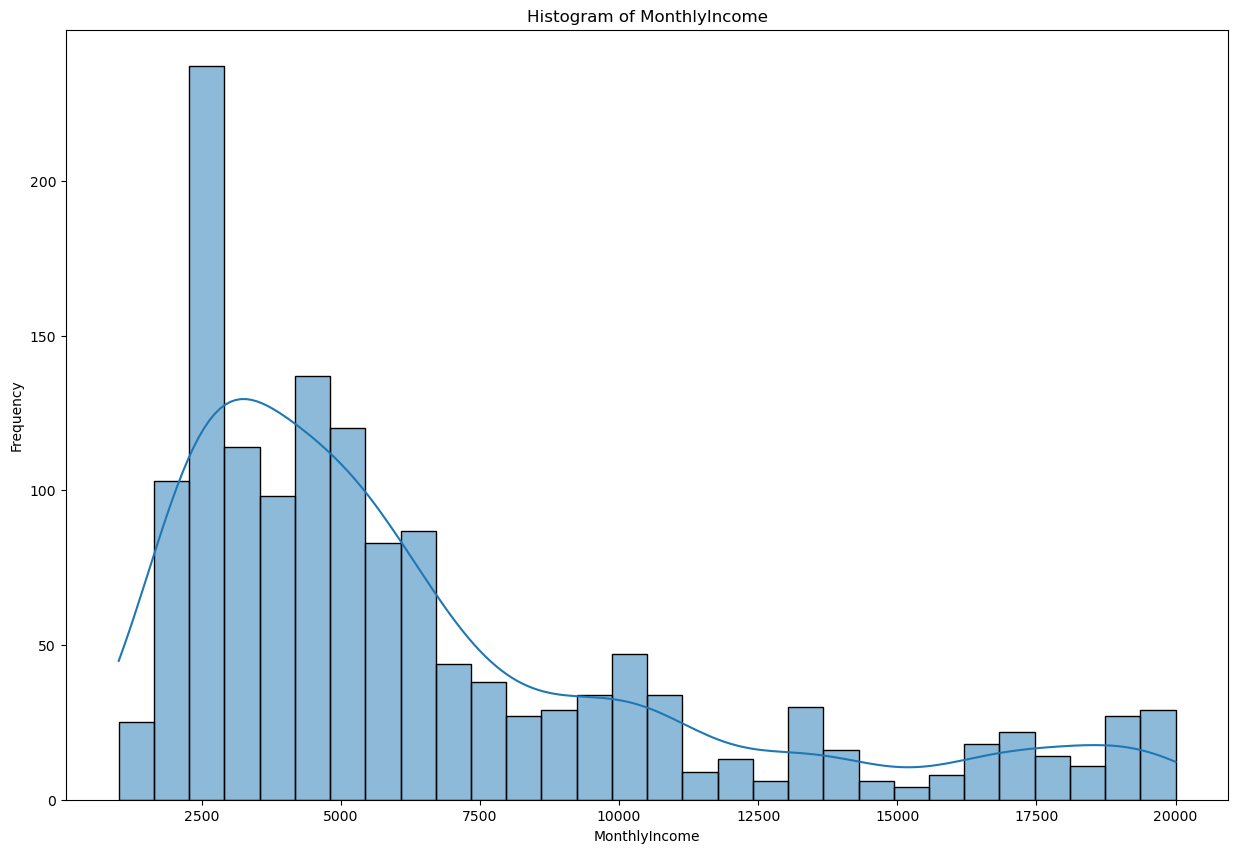

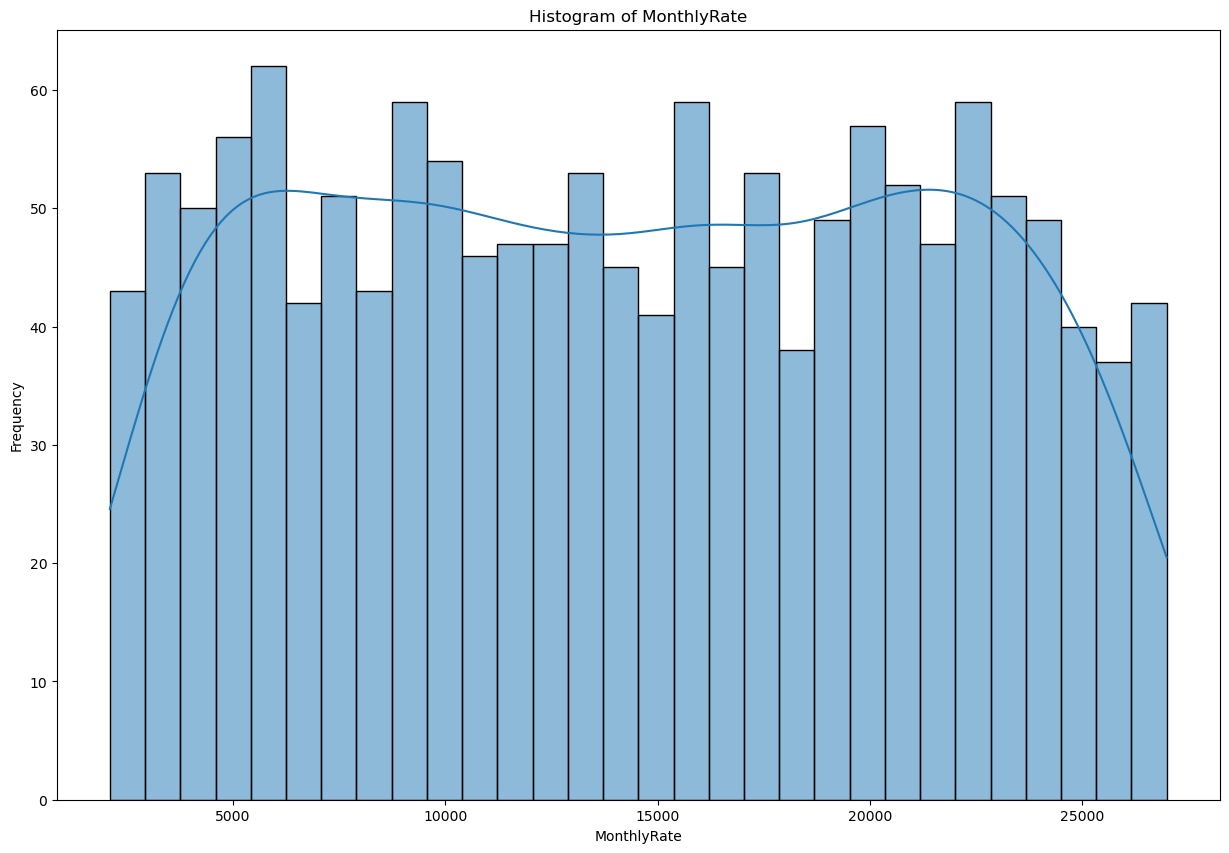

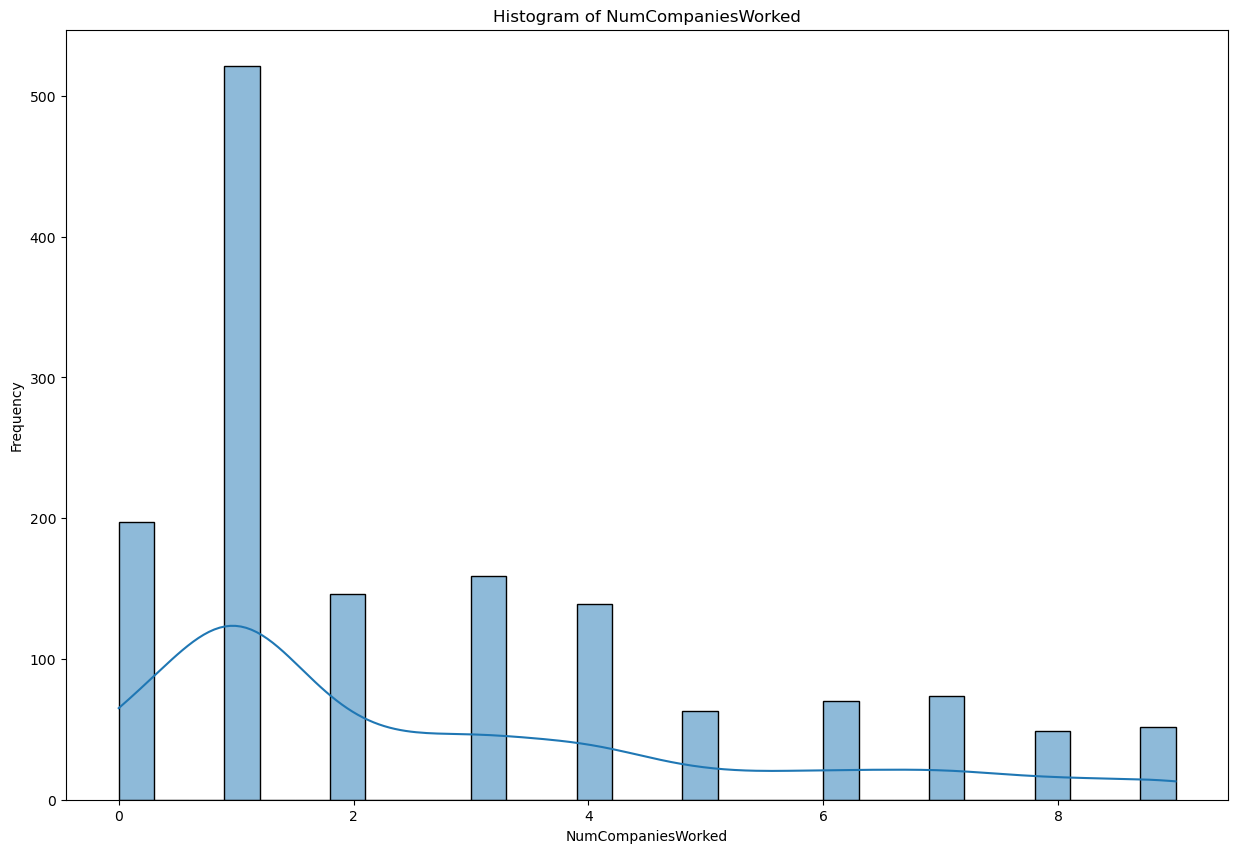

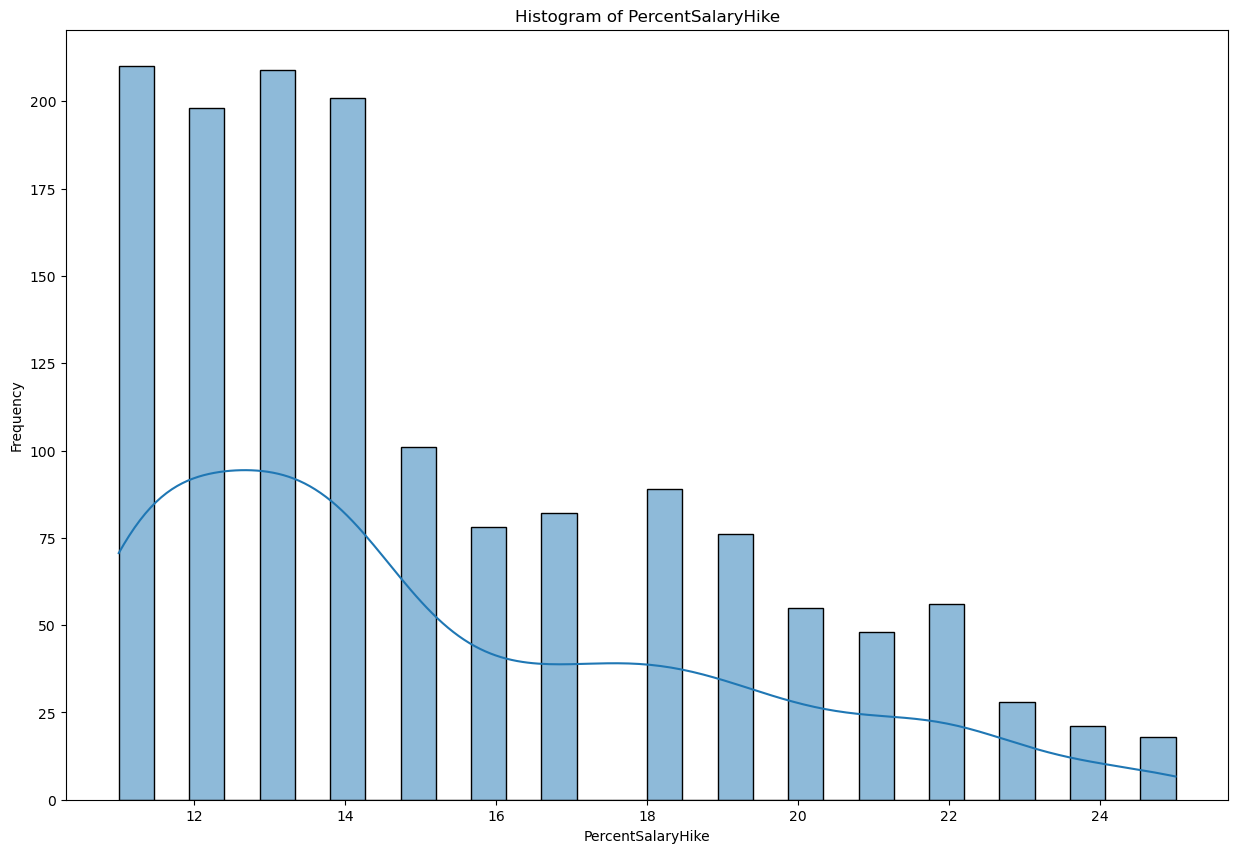

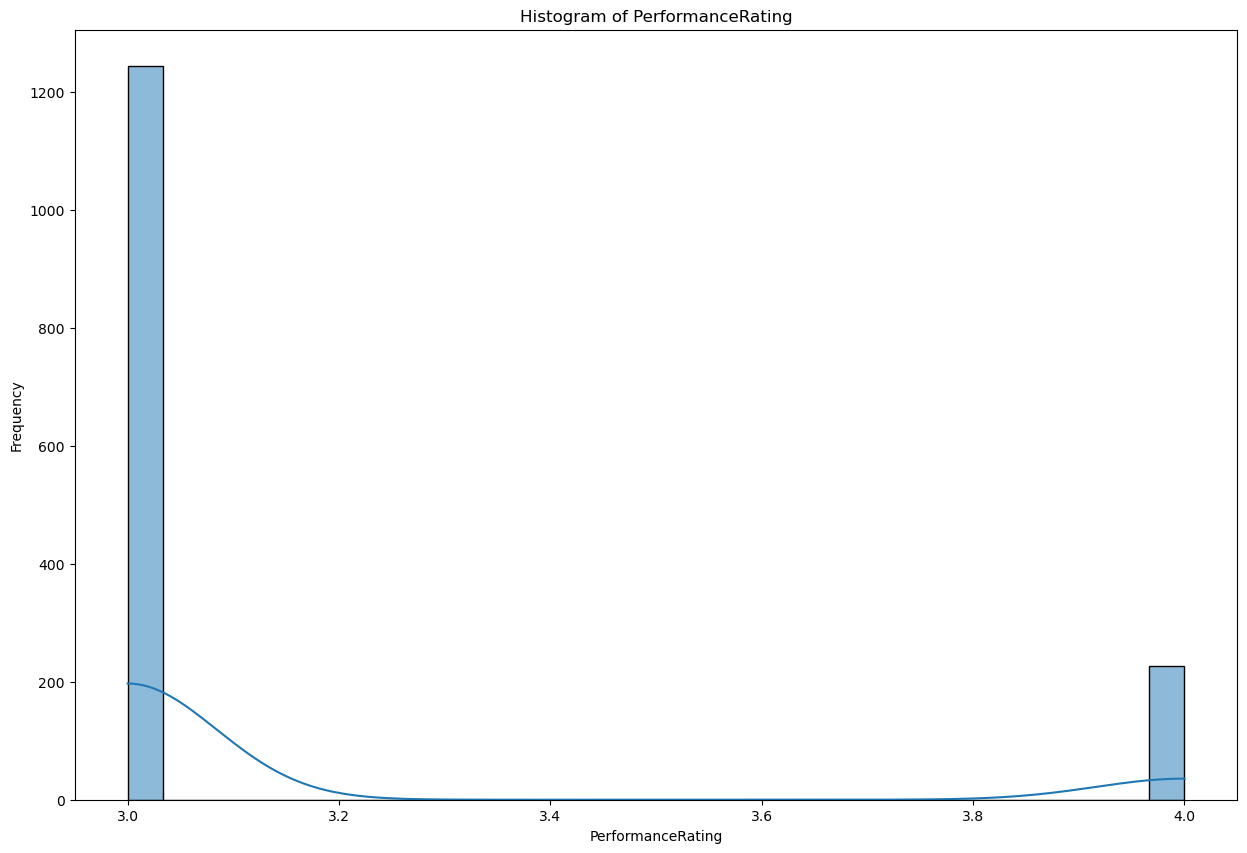

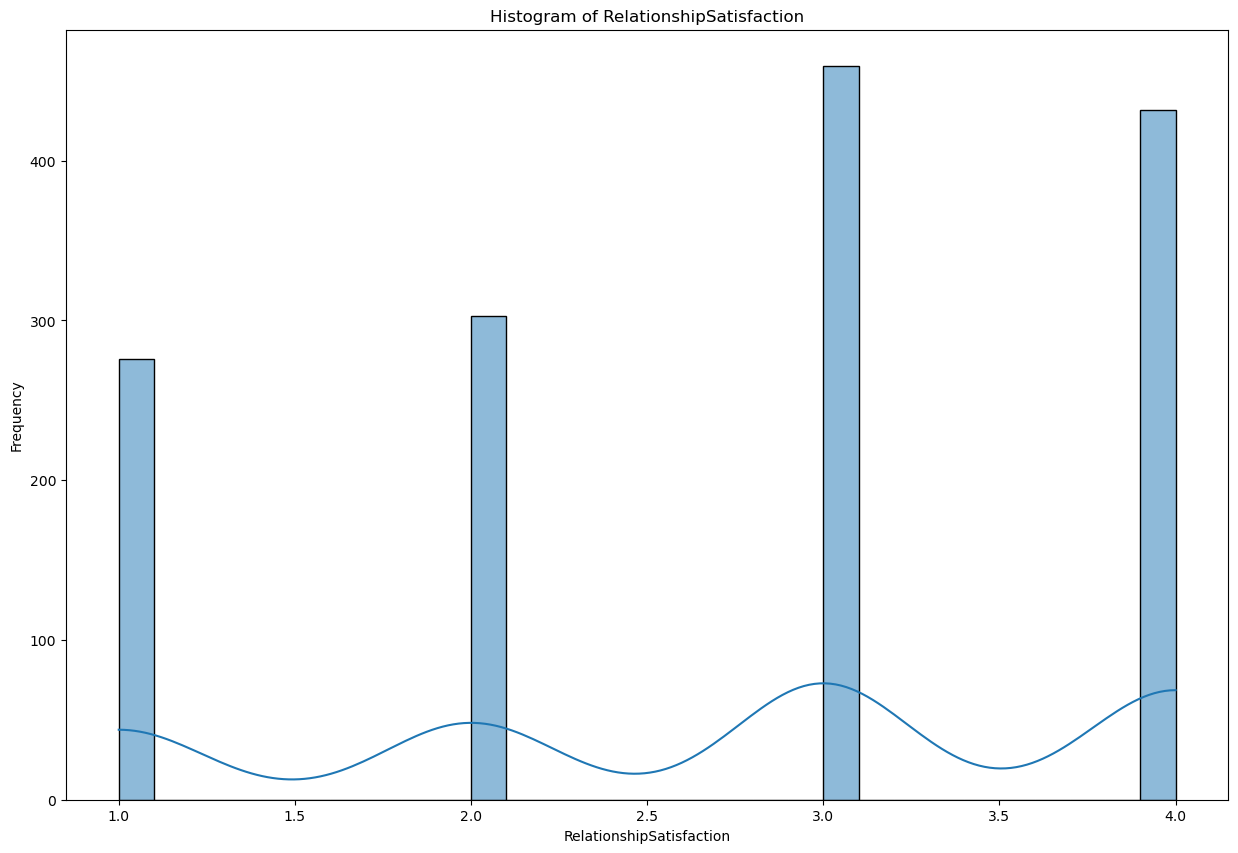

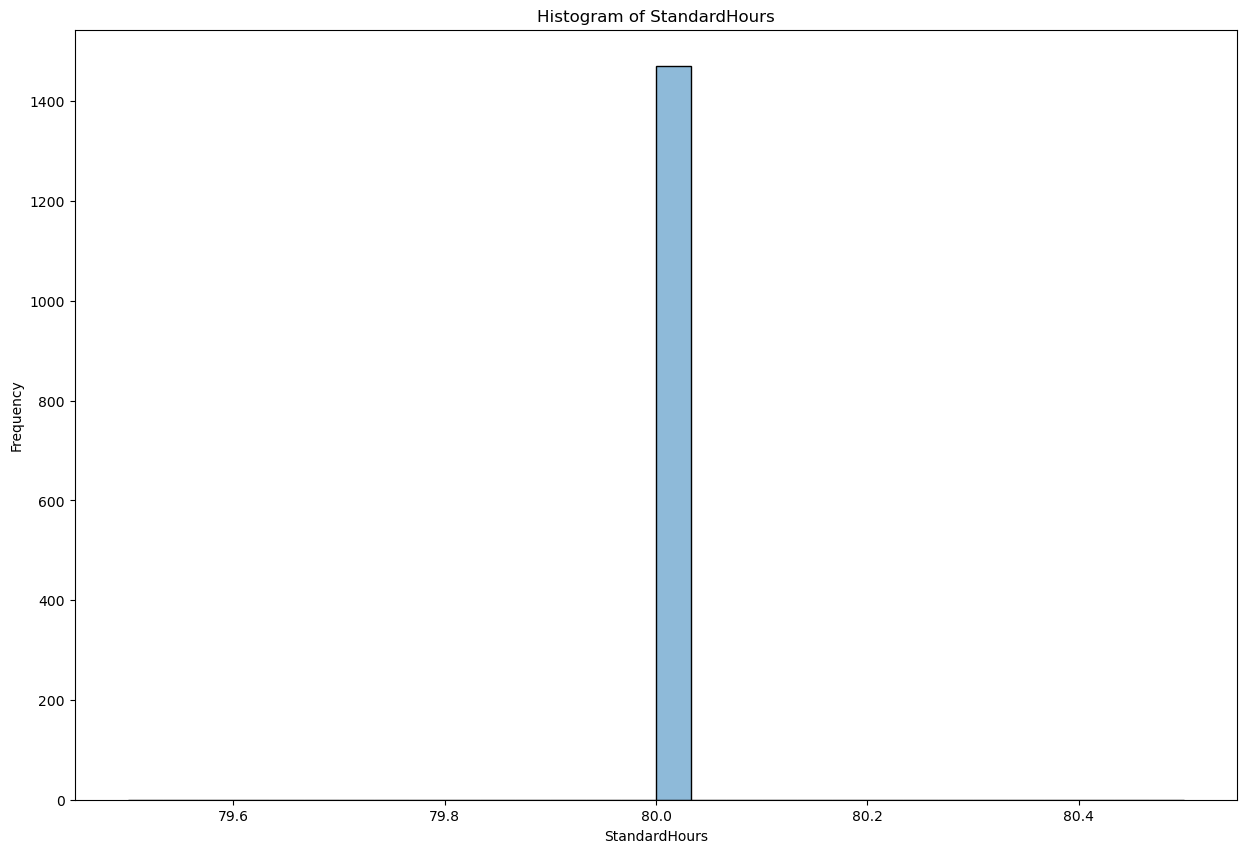

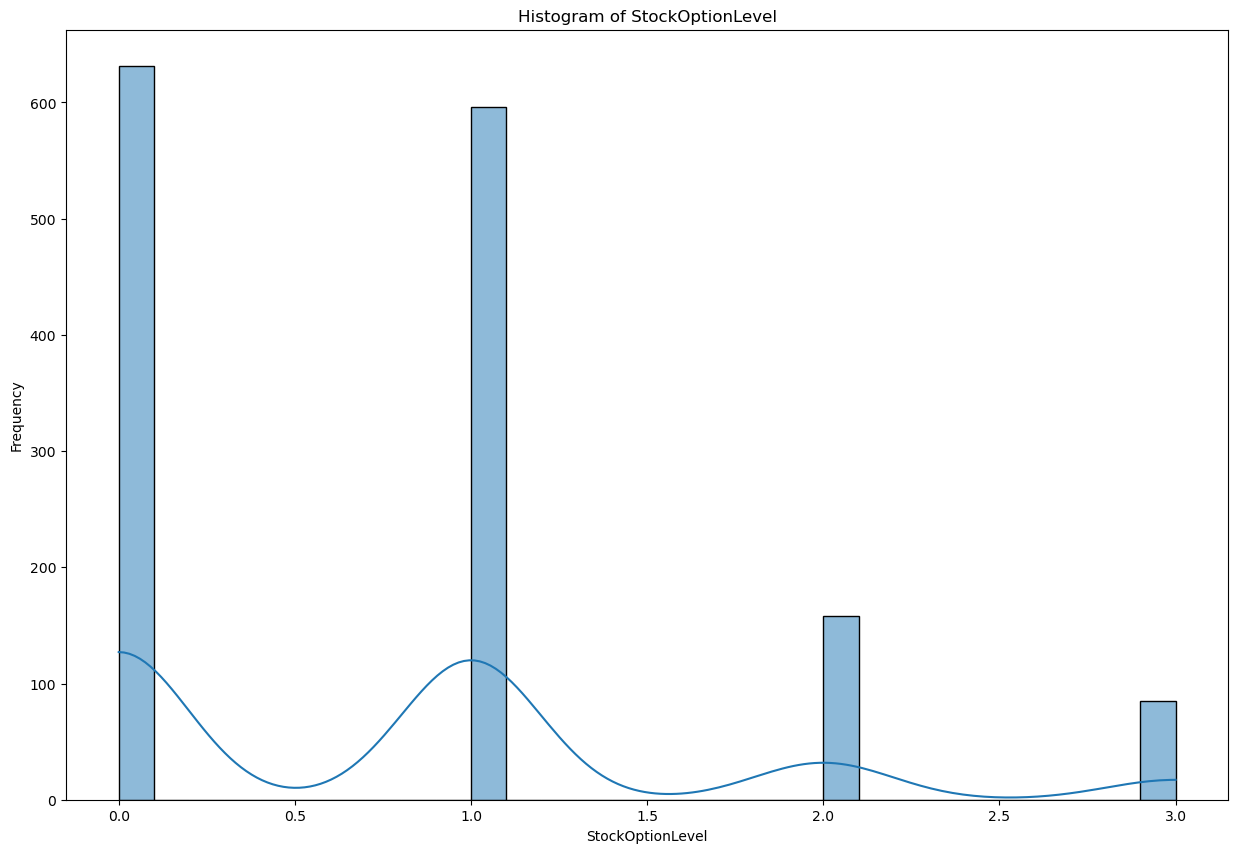

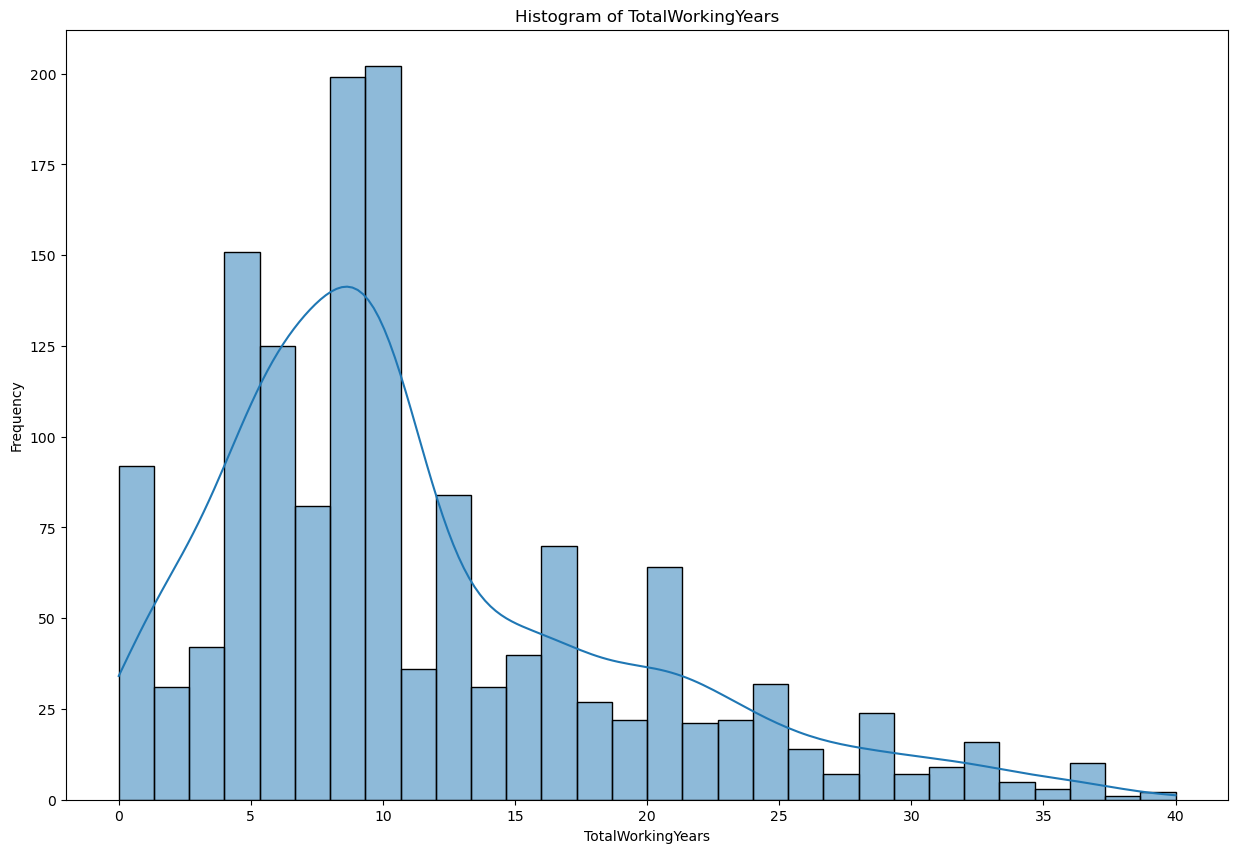

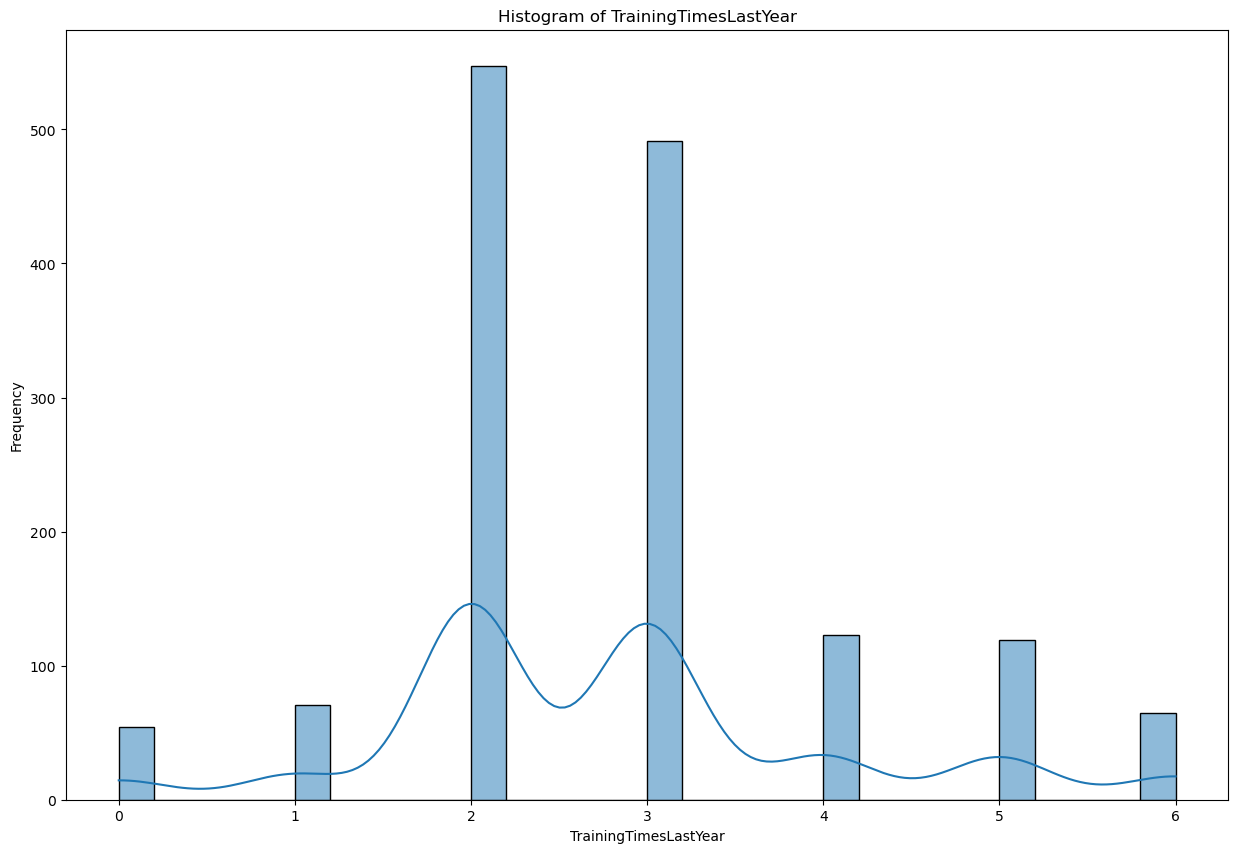

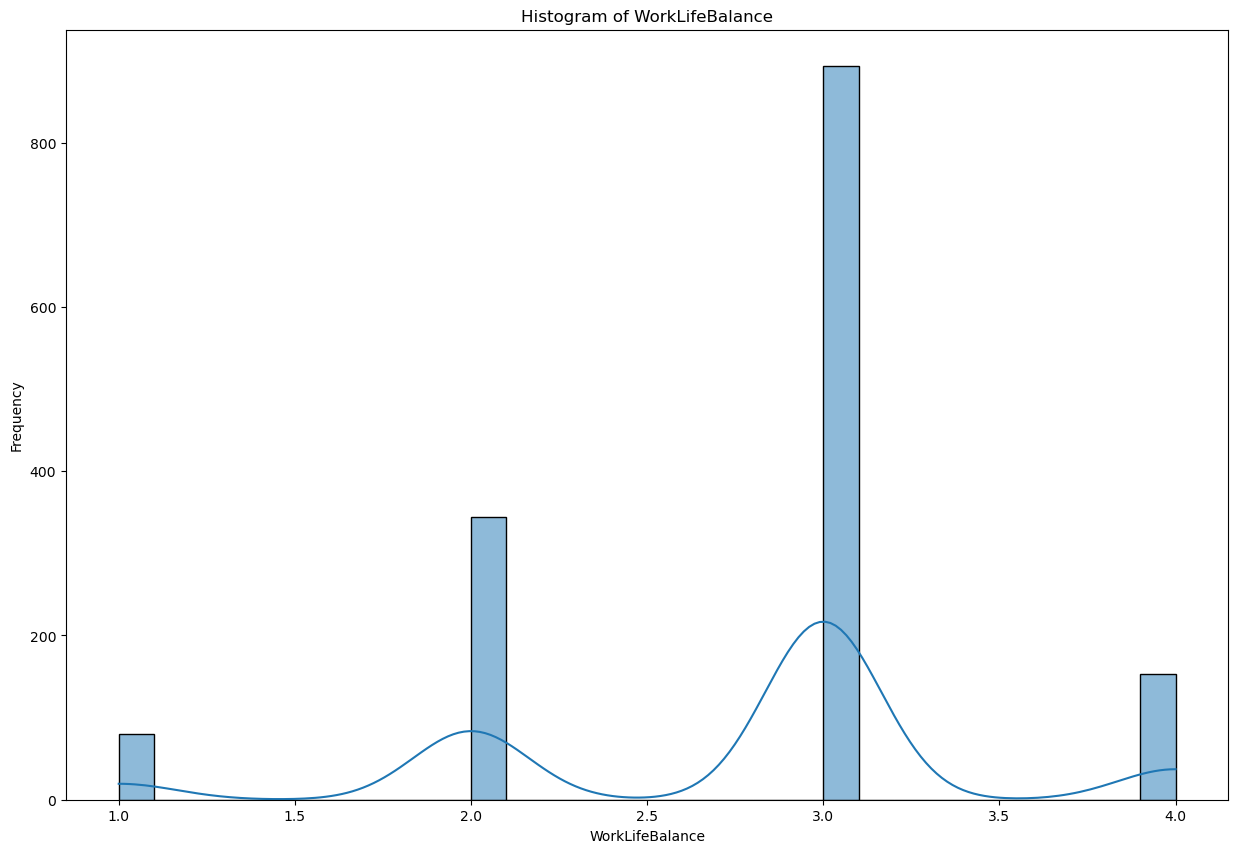

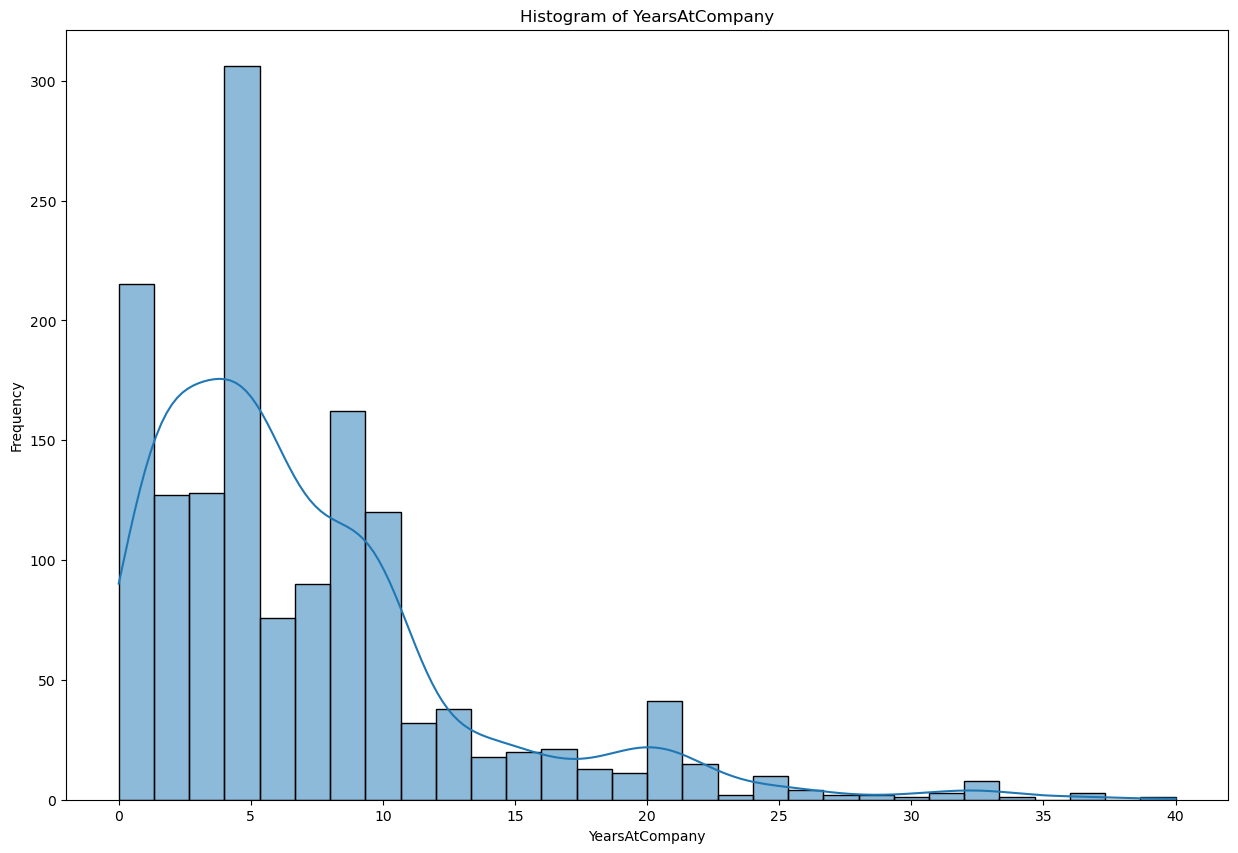

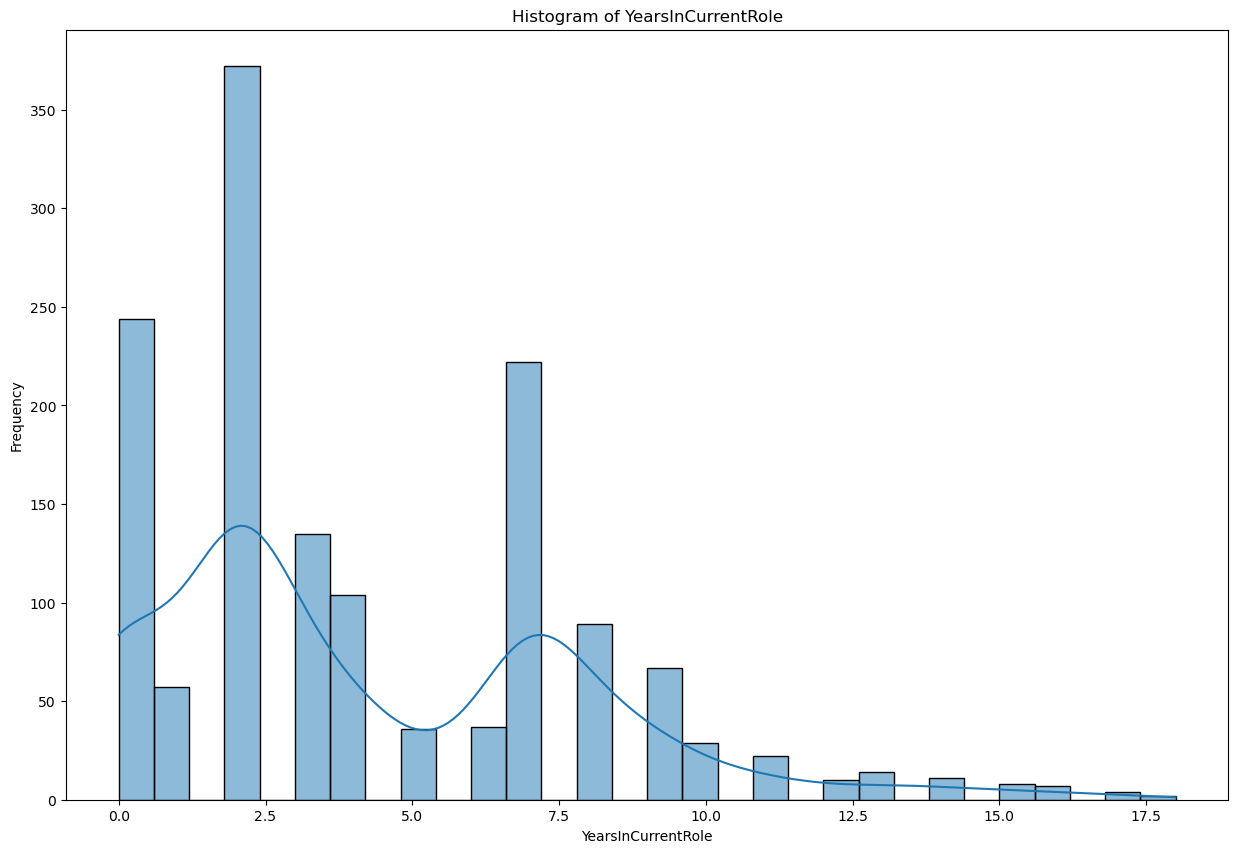

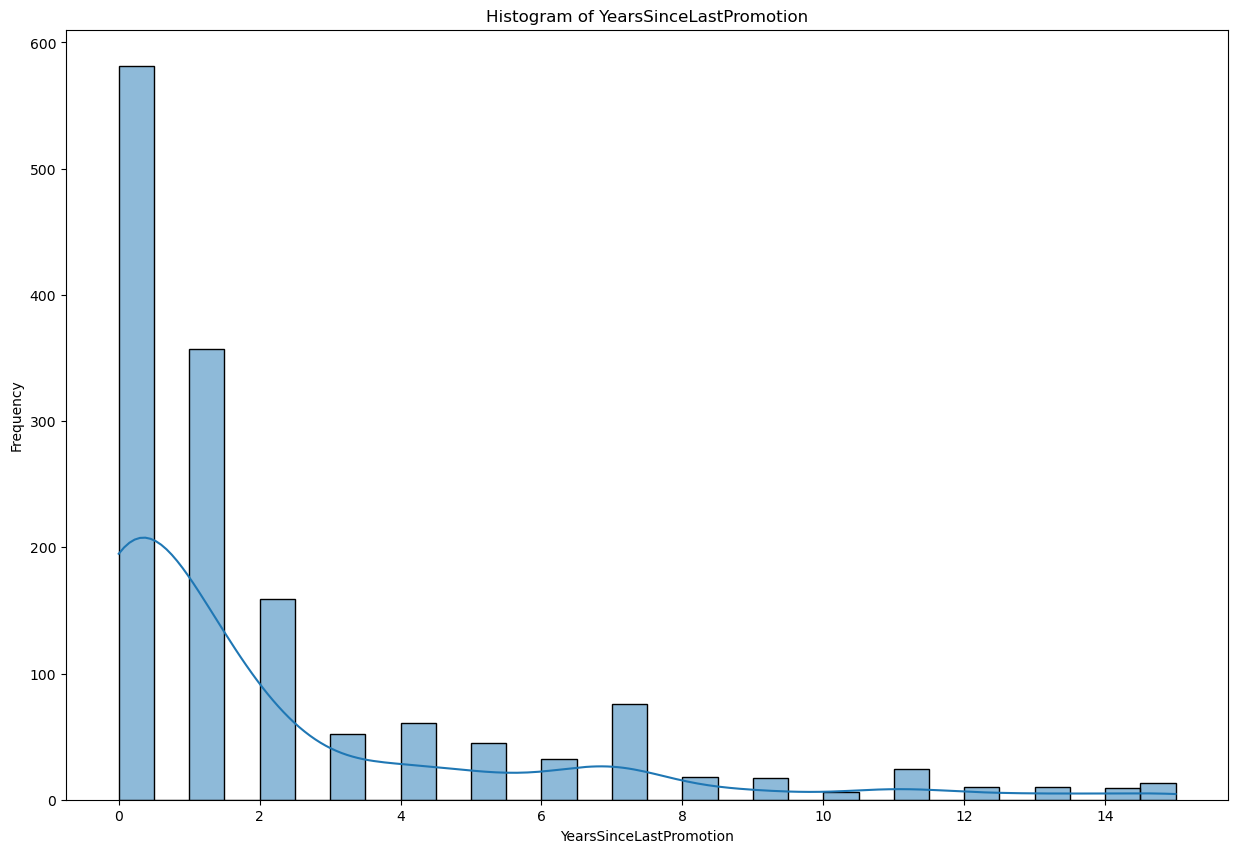

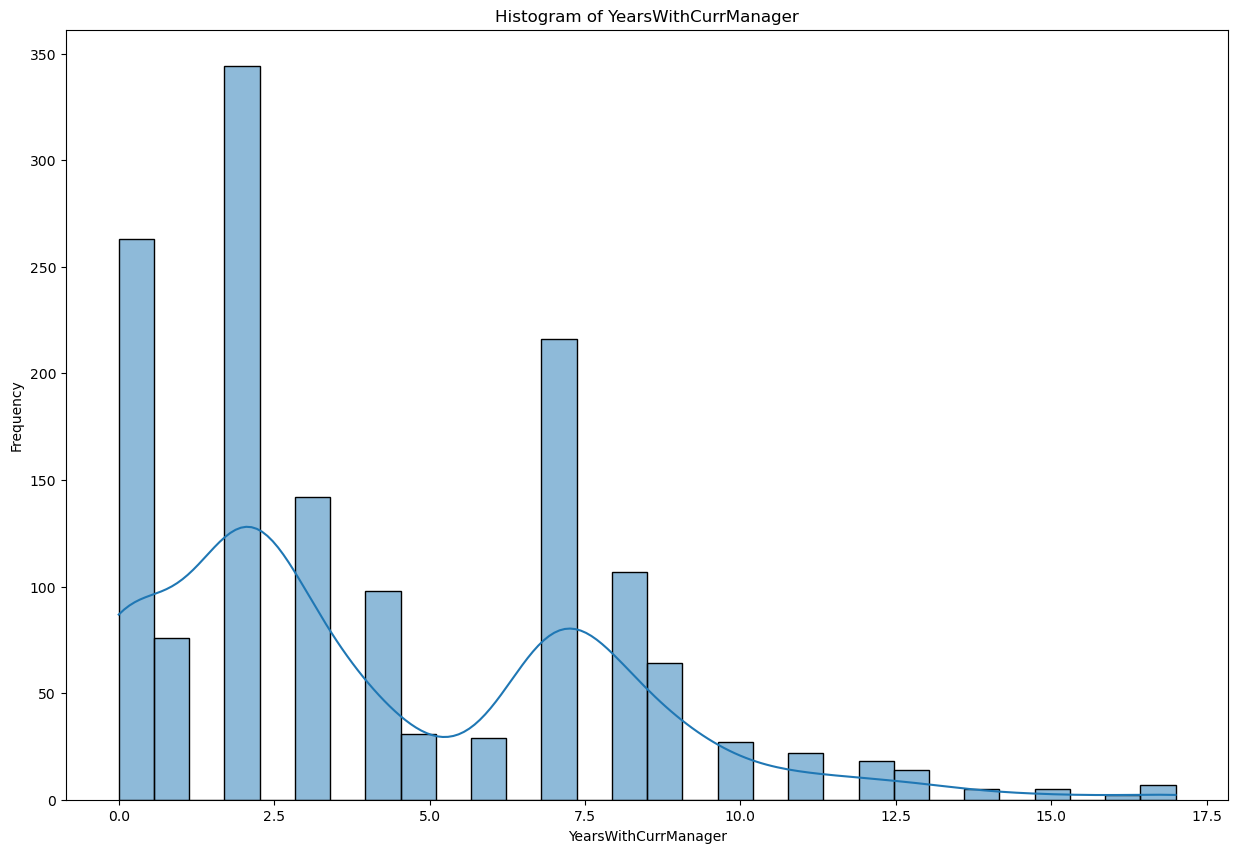

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ep_df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(15, 10))
    sns.histplot(ep_df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


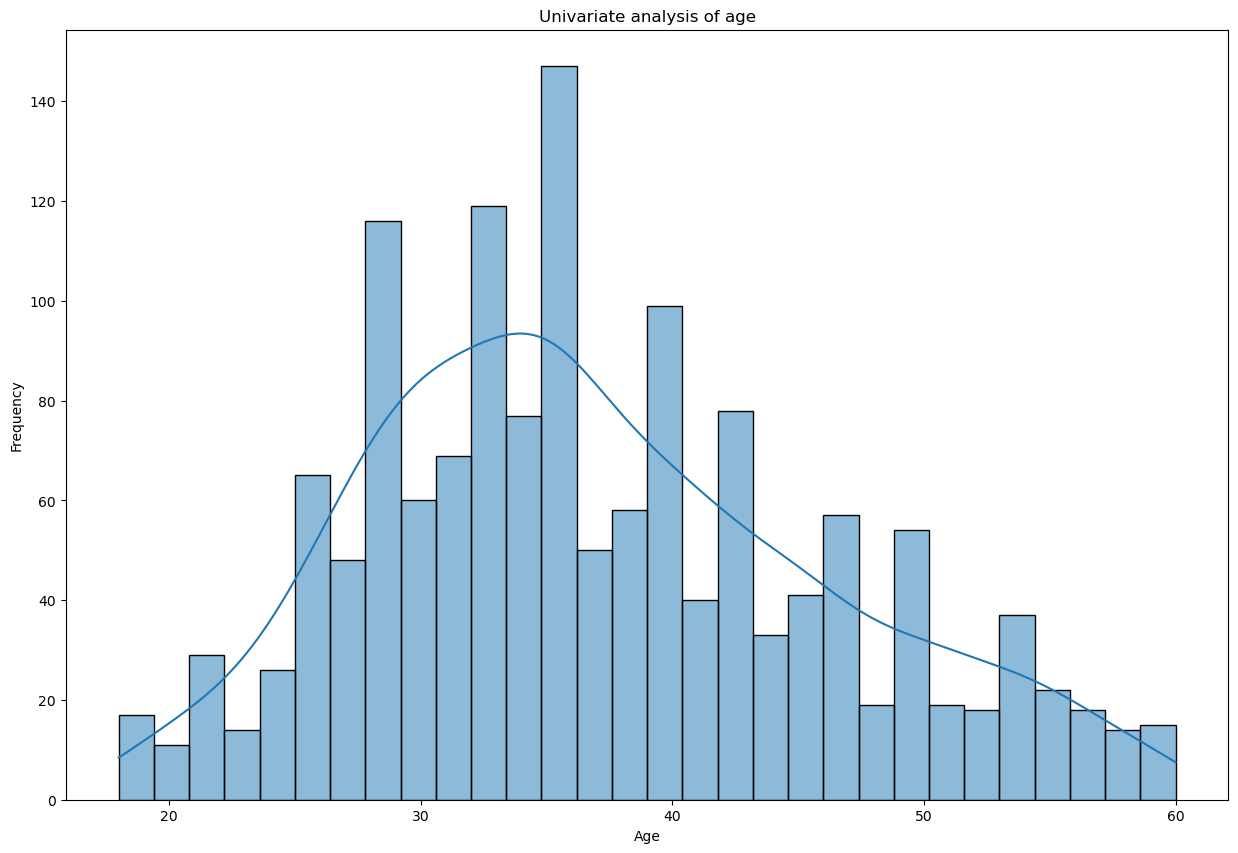

age skew
0.4132863018563338
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64


In [25]:
#univariate analysis on age
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
sns.histplot(data=ep_df, x="age", kde=True, bins=30)
plt.title("Univariate analysis of age")
plt.xlabel("Age")
plt.ylabel("Frequency")  # Corrected here
plt.grid(False)
plt.show()

print("age skew")
print(ep_df['age'].skew())
print(ep_df['age'].describe())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
attrition          No        Yes
age                             
18          50.000000  50.000000
19          33.333333  66.666667
20          45.454545  54.545455
21          53.846154  46.153846
22          68.750000  31.250000
23          71.428571  28.571429
24          73.076923  26.923077
25          76.923077  23.076923
26          69.230769  30.769231
27          93.750000   6.250000
28          70.833333  29.166667
29          73.529412 

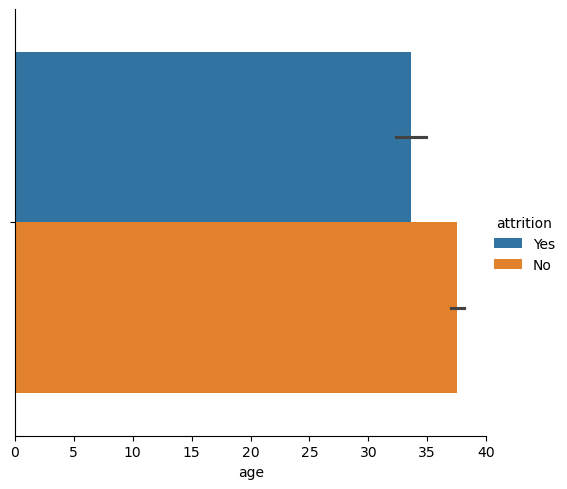

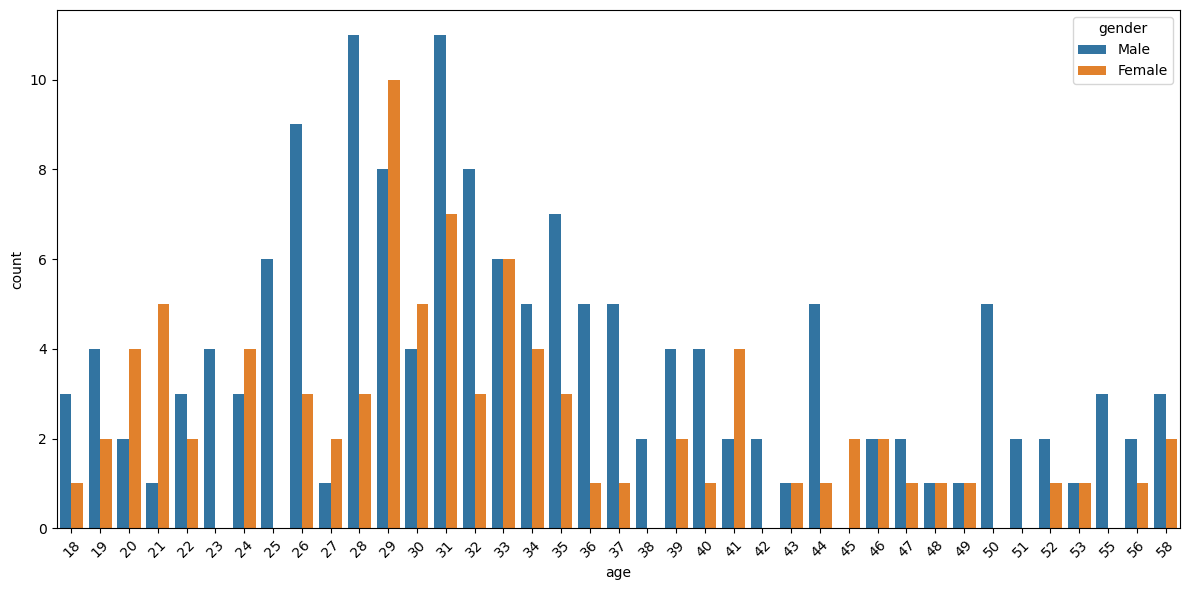

In [17]:
#bivariate analysis of age

df = ep_df
print(df['age'].unique())
print(df['age'].value_counts())
gd_env = pd.crosstab(
    index=[df['age']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, age)
) * 100

print(gd_env)
sns.catplot(data = df , x = "age",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['age']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, age)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "age", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

attrition        No       Yes
AgeGroup                     
18-25      0.652174  0.347826
26-35      0.808581  0.191419
36-45      0.908120  0.091880
46-60      0.875458  0.124542


<Axes: xlabel='AgeGroup'>

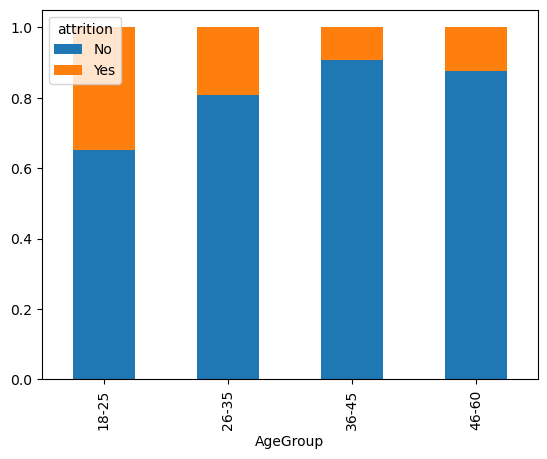

In [27]:
df1 = df
df1['AgeGroup'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])

ct = pd.crosstab(df['AgeGroup'], df['attrition'], normalize='index' )
print(ct)# to get percentage within each (Gender, age))
ct.plot(kind='bar', stacked=True)


0    36-45
1    46-60
2    36-45
3    26-35
4    26-35
5    26-35
6    46-60
7    26-35
8    36-45
9    36-45
Name: AgeGroup, dtype: category
Categories (4, object): ['18-25' < '26-35' < '36-45' < '46-60']


C:\Users\JEEVA\AppData\Local\Temp\ipykernel_10772\3540596382.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(['AgeGroup', 'attrition']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='AgeGroup'>

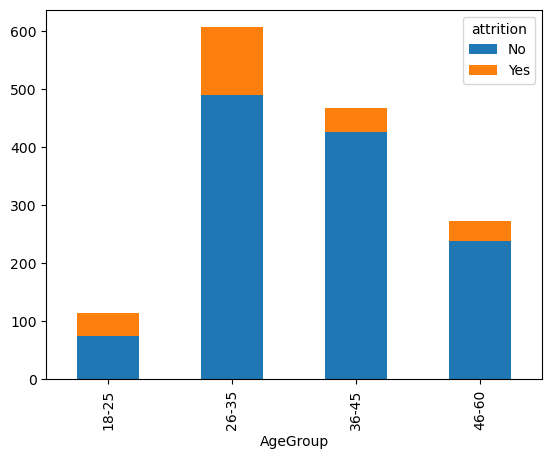

In [23]:
# Example age bins
df1 = df
df1['AgeGroup'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])

print(df1['AgeGroup'].head(10))
# Group by age group
df1.groupby(['AgeGroup', 'attrition']).size().unstack().plot(kind='bar', stacked=True)


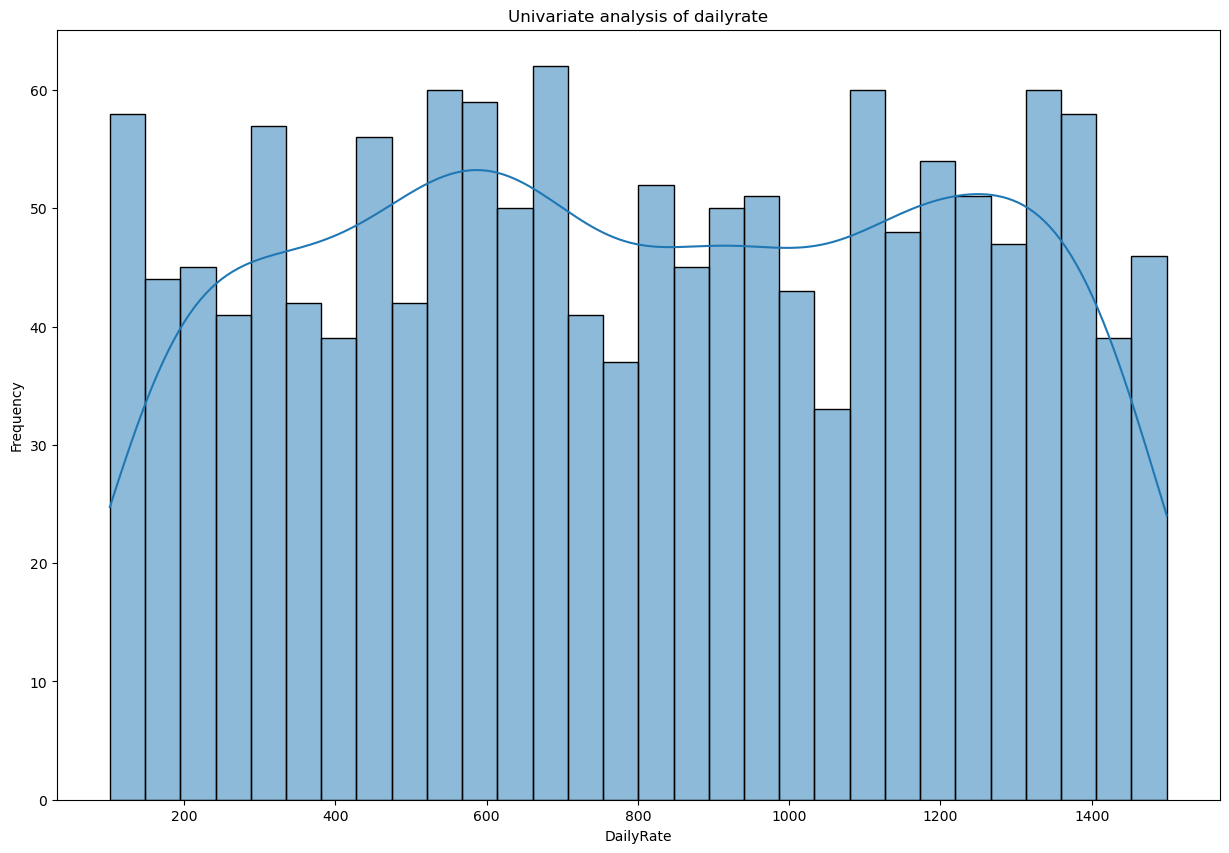

dailyrate skew
-0.003518568352325854
count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: dailyrate, dtype: float64


In [43]:
#univariate analysis on age
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
sns.histplot(data=ep_df, x="dailyrate", kde=True, bins=30)
plt.title("Univariate analysis of dailyrate")
plt.xlabel("DailyRate")
plt.ylabel("Frequency")  # Corrected here
plt.grid(False)
plt.show()

print("dailyrate skew")
print(ep_df['dailyrate'].skew())
print(ep_df['dailyrate'].describe())

attrition              No        Yes
dailyrate_slab                      
100-450         79.943503  20.056497
450-800         83.641161  16.358839
800-1150        84.806630  15.193370
1150-1500       86.933333  13.066667
attrition              No                  Yes           
gender             Female       Male    Female       Male
dailyrate_slab                                           
100-450         31.920904  48.022599  7.627119  12.429379
450-800         31.398417  52.242744  6.332454  10.026385
800-1150        39.502762  45.303867  5.248619   9.944751
1150-1500       33.600000  53.333333  4.533333   8.533333


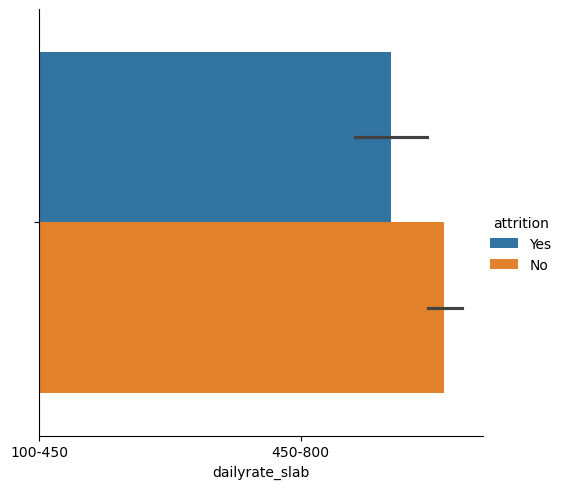

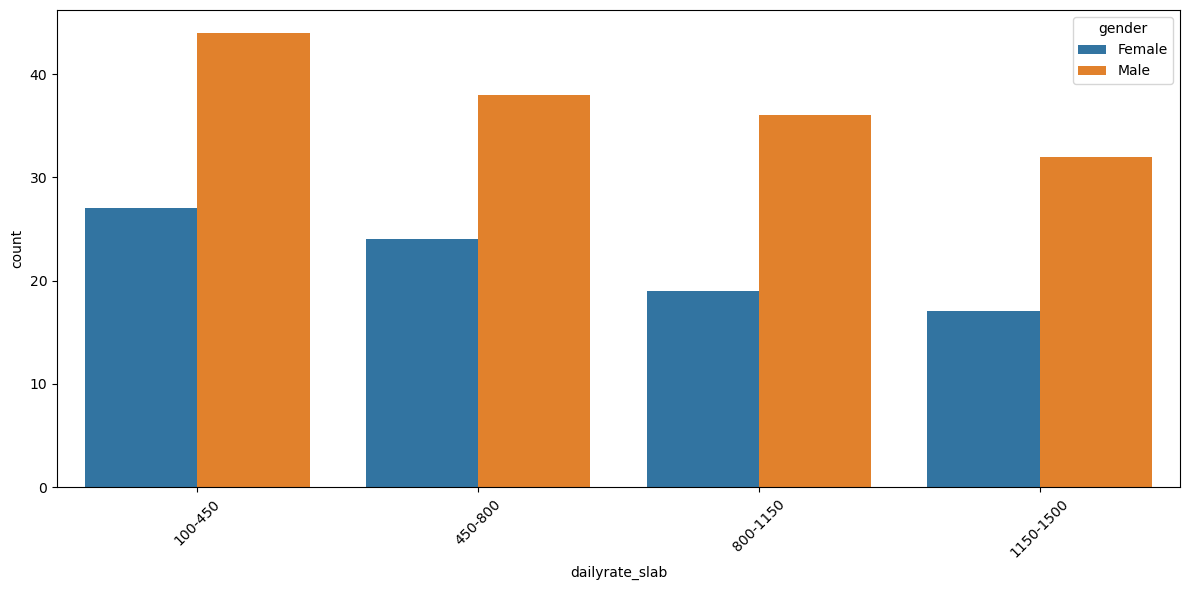

In [43]:
df1['dailyrate'].unique()
df1['dailyrate_slab'] = pd.cut(df1['dailyrate'],bins = [100,450,800,1150,1500],labels = ['100-450','450-800','800-1150','1150-1500'])
df1['dailyrate_slab'].value_counts()


gd_env = pd.crosstab(
    index=[df1['dailyrate_slab']], 
    columns=[df1['attrition']], 
    normalize='index'  # to get percentage within each (Gender, age)
) * 100

print(gd_env)
sns.catplot(data = df1 , x = "dailyrate_slab",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df1['dailyrate_slab']], 
    columns=[df1['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, age)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df1[df1['attrition']== "Yes"], x = "dailyrate_slab", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

attrition                    No       Yes
distancefromhome_slab                    
1-6                    0.859213  0.140787
6-11                   0.851648  0.148352
11-16                  0.762712  0.237288
16-21                  0.828829  0.171171
21-26                  0.741935  0.258065
26-31                  0.838710  0.161290
attrition              No                  Yes           
gender             Female       Male    Female       Male
dailyrate_slab                                           
100-450         31.920904  48.022599  7.627119  12.429379
450-800         31.398417  52.242744  6.332454  10.026385
800-1150        39.502762  45.303867  5.248619   9.944751
1150-1500       33.600000  53.333333  4.533333   8.533333


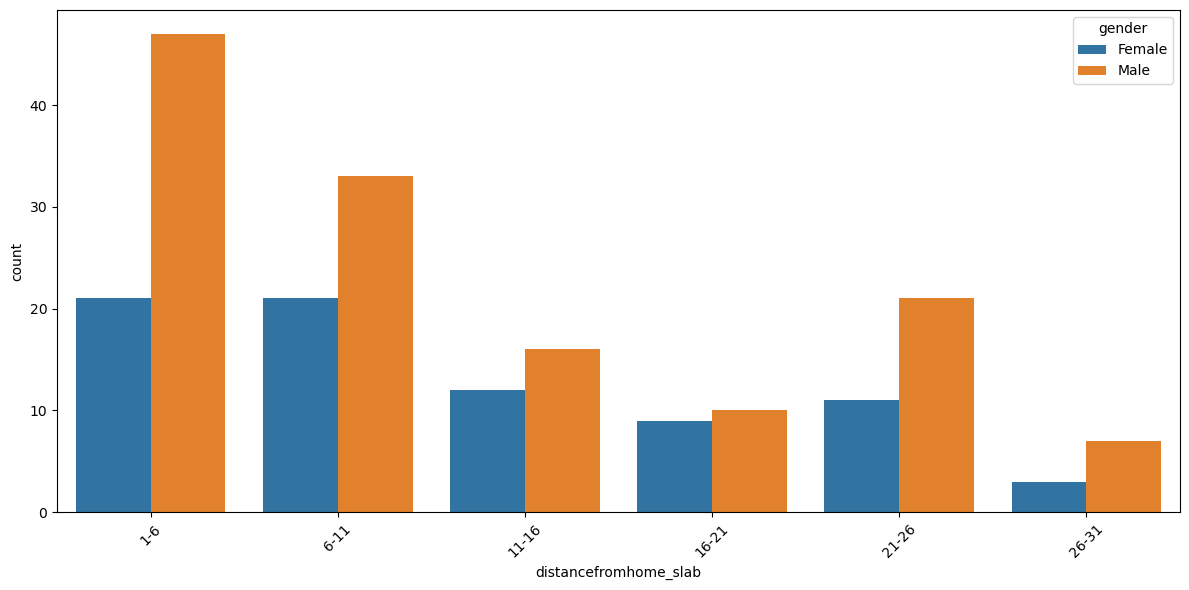

In [55]:
df1['distancefromhome_slab'] = pd.cut(df1['distancefromhome'],bins=[1,6,11,16,21,26,31],labels=['1-6','6-11','11-16','16-21','21-26','26-31'])
df_dt = pd.crosstab(
    index=df1['distancefromhome_slab'],
    columns=df1['attrition'],
    normalize="index"
)
print(df_dt)

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df1[df1['attrition']=="Yes"], x = "distancefromhome_slab",hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

distancefromhome
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: distancefromhome, dtype: float64
0.9581179956568269


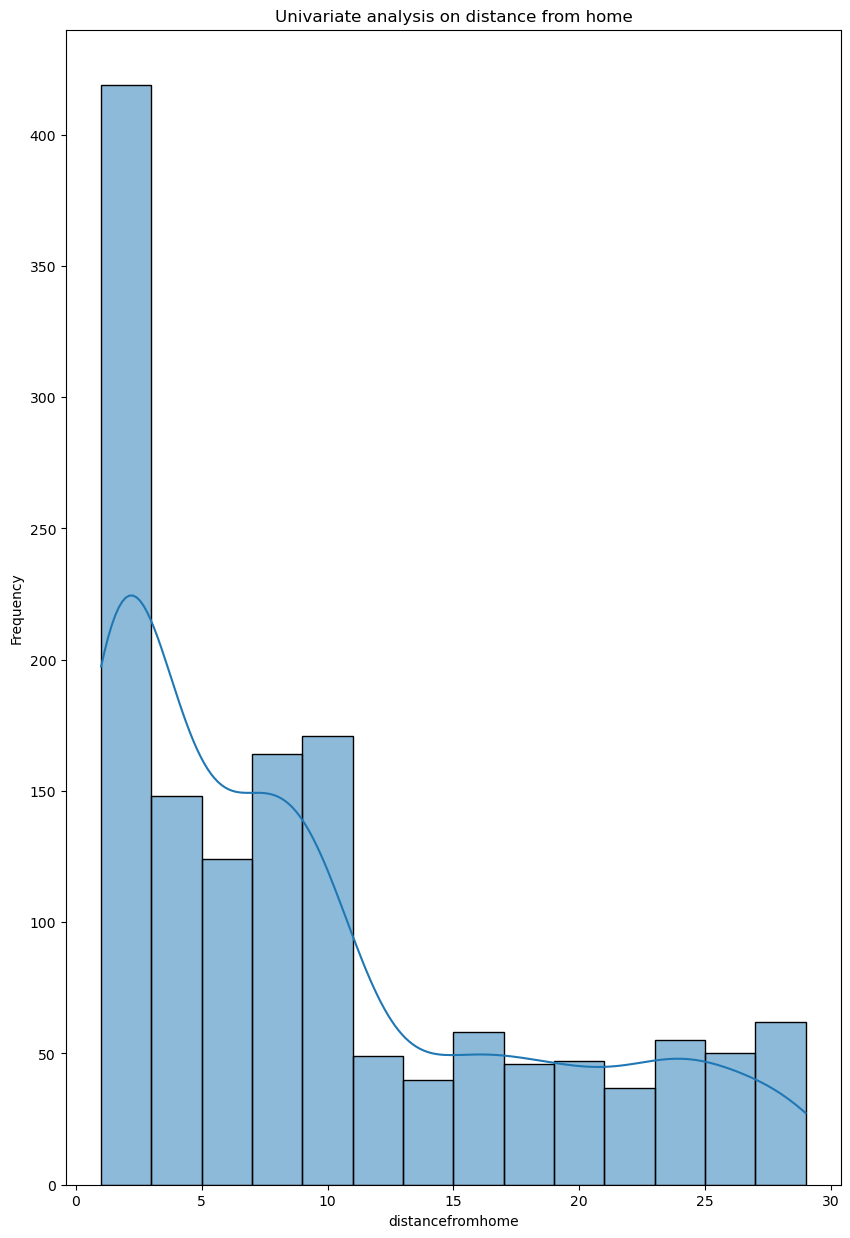

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

print("distancefromhome")
print(ep_df['distancefromhome'].describe())
print(ep_df['distancefromhome'].skew())

plt.figure(figsize=(10,15))
sns.histplot(data=ep_df,x="distancefromhome",kde=True)
plt.title("Univariate analysis on distance from home")
plt.xlabel("distancefromhome")
plt.ylabel("Frequency")
plt.show()

In [33]:
ep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

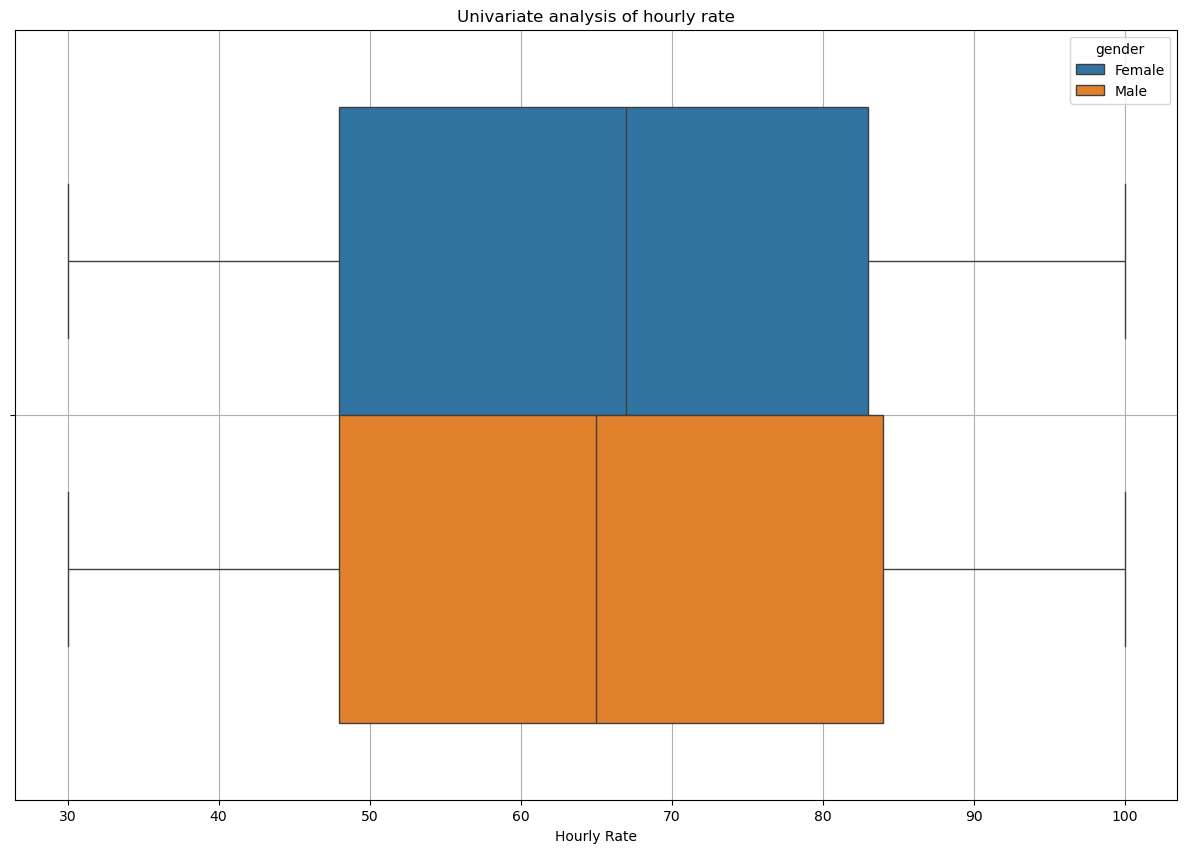

hourly rate describe count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: hourlyrate, dtype: float64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.boxplot(data=ep_df,x='hourlyrate',hue='gender')
plt.title("Univariate analysis of hourly rate")
plt.xlabel("Hourly Rate")
plt.grid(True)
plt.show()

print(f"hourly rate describe {ep_df['hourlyrate'].describe()}")

In [57]:
df1['hourlyrate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

attrition              No       Yes
hourlyrate_slab                    
20-40            0.827225  0.172775
40-60            0.839450  0.160550
60-80            0.838235  0.161765
80-100           0.843678  0.156322


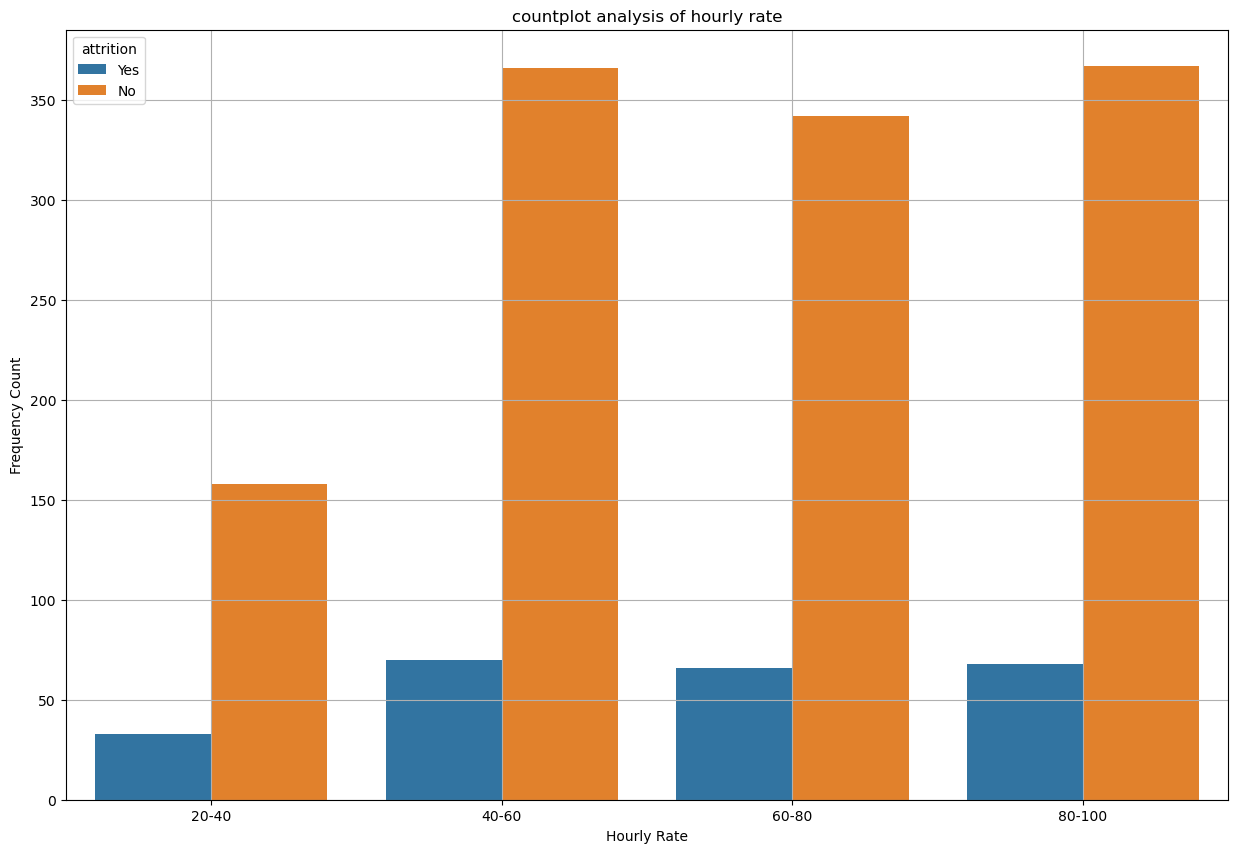

attrition              No                 Yes          
gender             Female      Male    Female      Male
hourlyrate_slab                                        
20-40            0.356021  0.471204  0.057592  0.115183
40-60            0.318807  0.520642  0.066514  0.094037
60-80            0.343137  0.495098  0.063725  0.098039
80-100           0.354023  0.489655  0.048276  0.108046


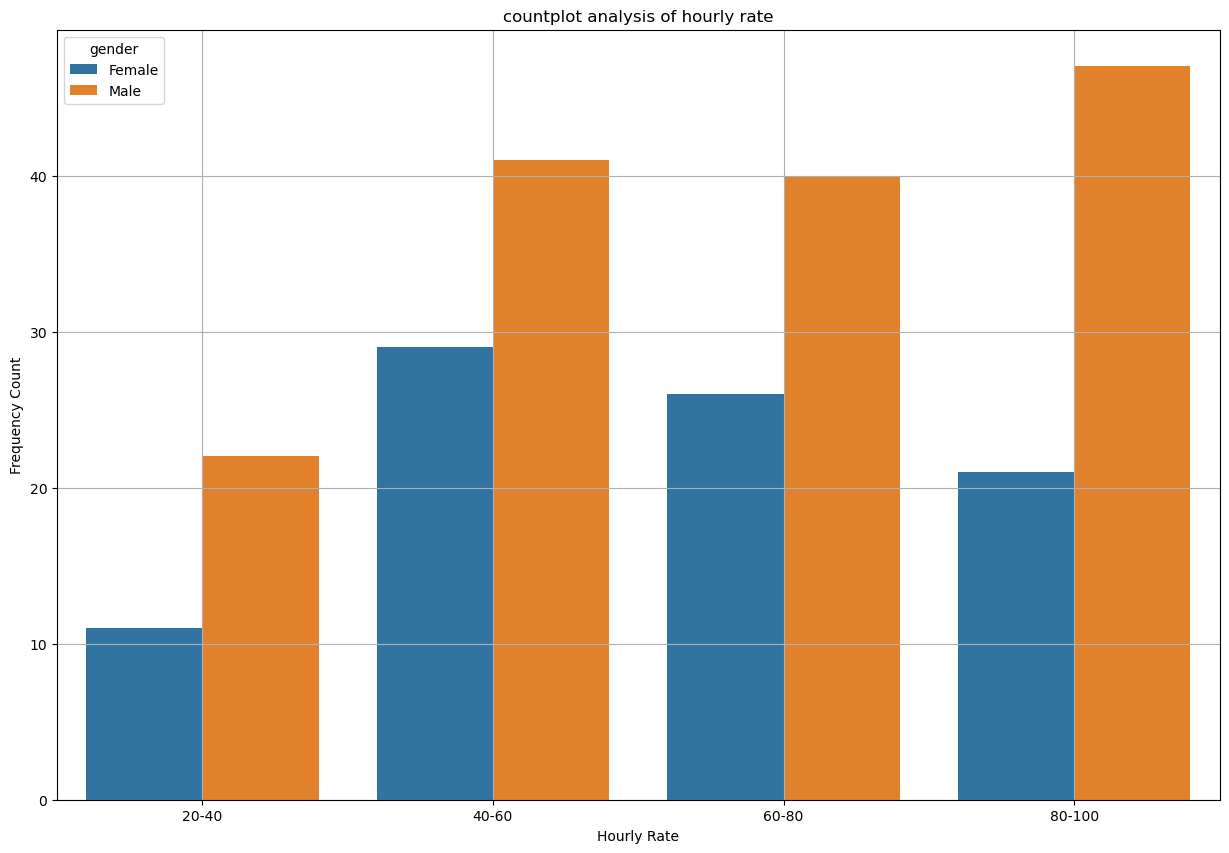

In [75]:
df1['hourlyrate_slab'] = pd.cut(df1['hourlyrate'],bins=[20,40,60,80,100],labels=['20-40','40-60','60-80','80-100'])

df_hr = pd.crosstab(
    index=df1["hourlyrate_slab"],
    columns=df1["attrition"],
    normalize = "index"
)
print(df_hr)
plt.figure(figsize=(15,10))
sns.countplot(data=df1,x="hourlyrate_slab",hue="attrition")
plt.title("countplot analysis of hourly rate")
plt.xlabel("Hourly Rate")
plt.ylabel("Frequency Count")
plt.grid(True)
plt.show()

df_hr = pd.crosstab(
    index=df1["hourlyrate_slab"],
    columns=[df1["attrition"],df1['gender']],
    normalize = "index"
)
print(df_hr)
plt.figure(figsize=(15,10))
sns.countplot(data=df1[df1['attrition']=='Yes'],x="hourlyrate_slab",hue="gender")
plt.title("countplot analysis of hourly rate")
plt.xlabel("Hourly Rate")
plt.ylabel("Frequency Count")
plt.grid(True)
plt.show()

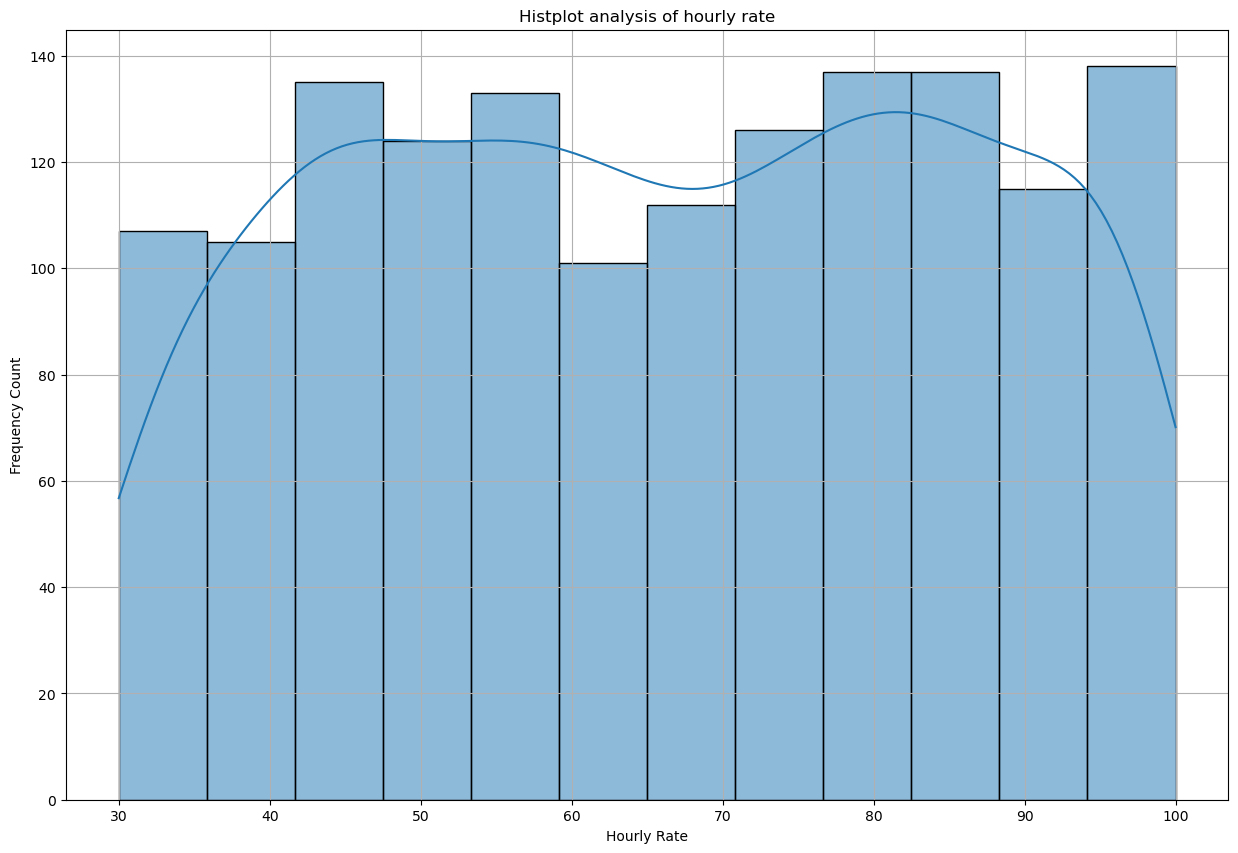

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.histplot(data=ep_df,x="hourlyrate",kde="True")
plt.title("Histplot analysis of hourly rate")
plt.xlabel("Hourly Rate")
plt.ylabel("Frequency Count")
plt.grid(True)
plt.show()

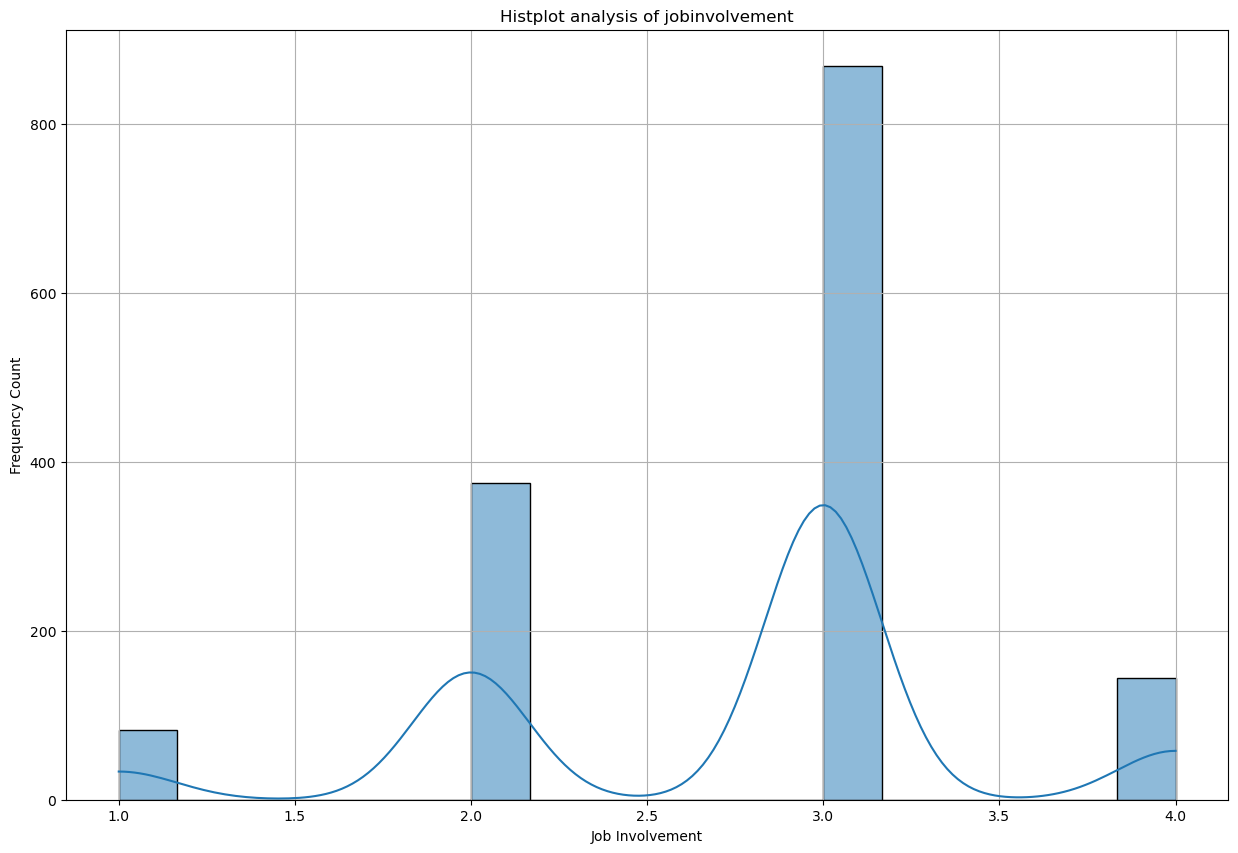

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: jobinvolvement, dtype: float64
-0.4984193640419493


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.histplot(data=ep_df,x="jobinvolvement",kde="True")
plt.title("Histplot analysis of jobinvolvement")
plt.xlabel("Job Involvement")
plt.ylabel("Frequency Count")
plt.grid(True)
plt.show()

print(ep_df['jobinvolvement'].describe())
print(ep_df['jobinvolvement'].skew())

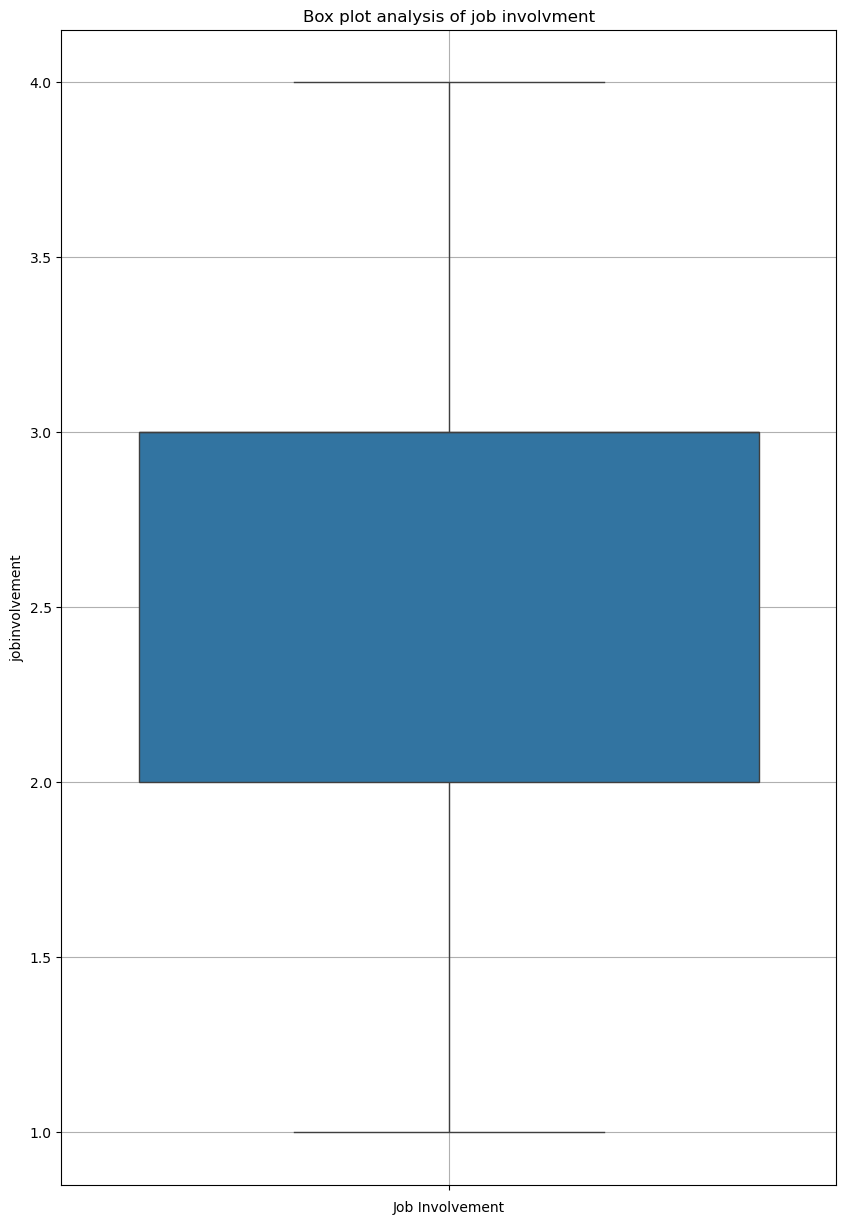

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))
sns.boxplot(data=ep_df['jobinvolvement'])
plt.title("Box plot analysis of job involvment")
plt.xlabel("Job Involvement")
plt.grid(True)
plt.show()

In [77]:
ep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1470 non-null   int64   
 1   attrition                 1470 non-null   object  
 2   businesstravel            1470 non-null   object  
 3   dailyrate                 1470 non-null   int64   
 4   department                1470 non-null   object  
 5   distancefromhome          1470 non-null   int64   
 6   education                 1470 non-null   int64   
 7   educationfield            1470 non-null   object  
 8   employeecount             1470 non-null   int64   
 9   employeenumber            1470 non-null   int64   
 10  environmentsatisfaction   1470 non-null   int64   
 11  gender                    1470 non-null   object  
 12  hourlyrate                1470 non-null   int64   
 13  jobinvolvement            1470 non-null   int64 

attrition         No        Yes
joblevel                       
1          73.664825  26.335175
2          90.262172   9.737828
3          85.321101  14.678899
4          95.283019   4.716981
5          92.753623   7.246377


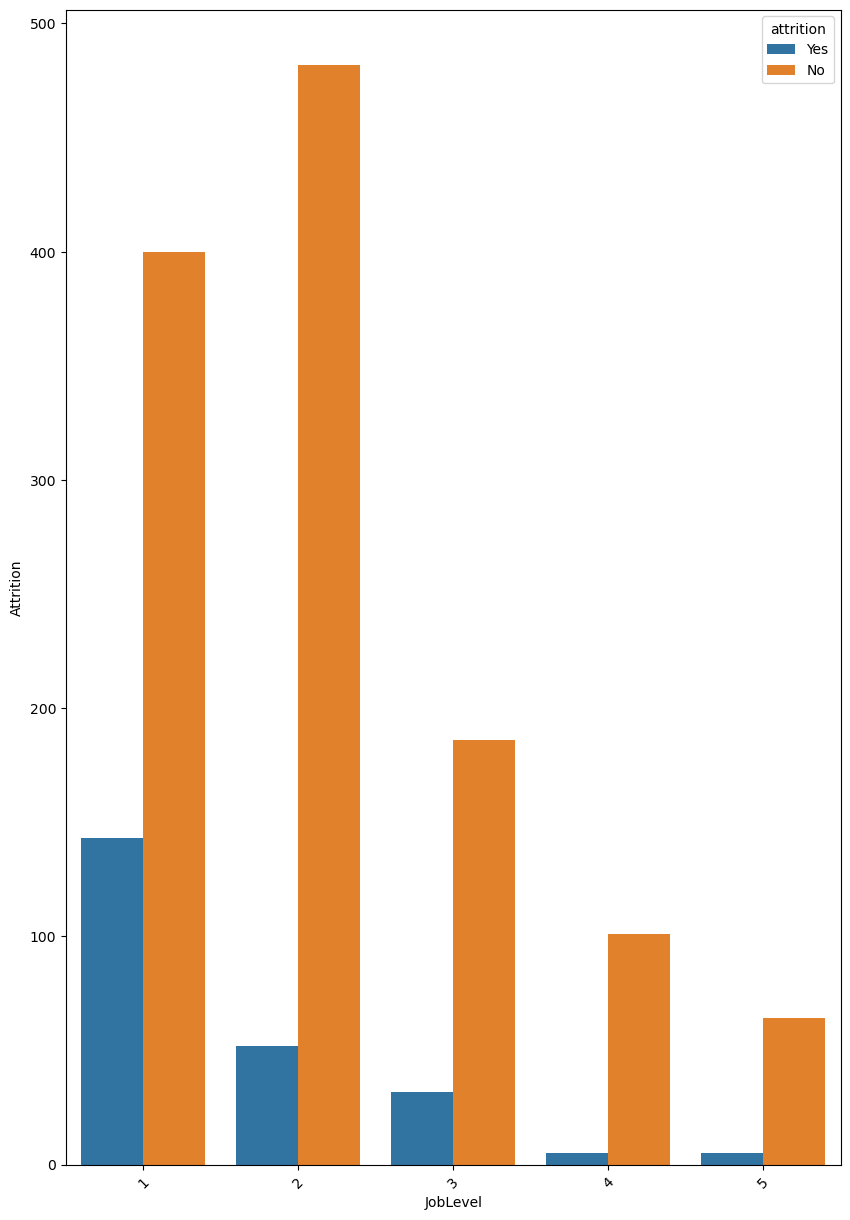

In [87]:
jl = pd.crosstab(index=df1["joblevel"],columns=df1["attrition"],normalize="index")*100
print(jl)

plt.figure(figsize=(10,15))
sns.countplot(data=df1,x="joblevel",hue="attrition")
plt.xlabel("JobLevel")
plt.ylabel("Attrition")
plt.xticks(rotation=45)
plt.show()

attrition         No                  Yes           
gender        Female       Male    Female       Male
joblevel                                            
1          26.887661  46.777164  9.760589  16.574586
2          37.827715  52.434457  3.370787   6.367041
3          37.614679  47.706422  5.504587   9.174312
4          47.169811  48.113208  0.943396   3.773585
5          30.434783  62.318841  4.347826   2.898551


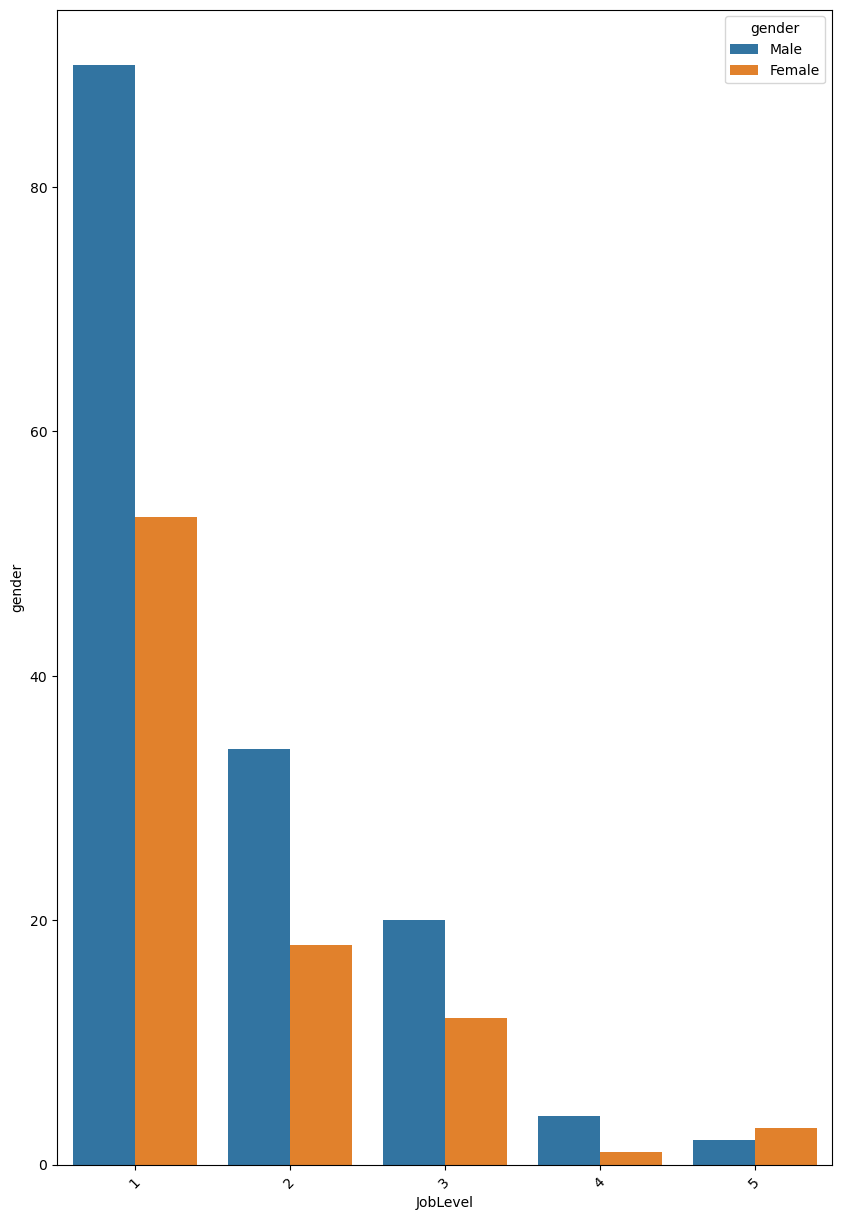

In [91]:
jl = pd.crosstab(index=df1["joblevel"],columns=[df1["attrition"],df1["gender"]],normalize="index")*100
print(jl)

plt.figure(figsize=(10,15))
sns.countplot(data=df1[df1['attrition']=="Yes"],x="joblevel",hue="gender")
plt.xlabel("JobLevel")
plt.ylabel("gender")
plt.xticks(rotation=45)
plt.show()

Descirbe info of joblevel
count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: joblevel, dtype: float64
Skew info of joblevel
1.0254012829518246


[]

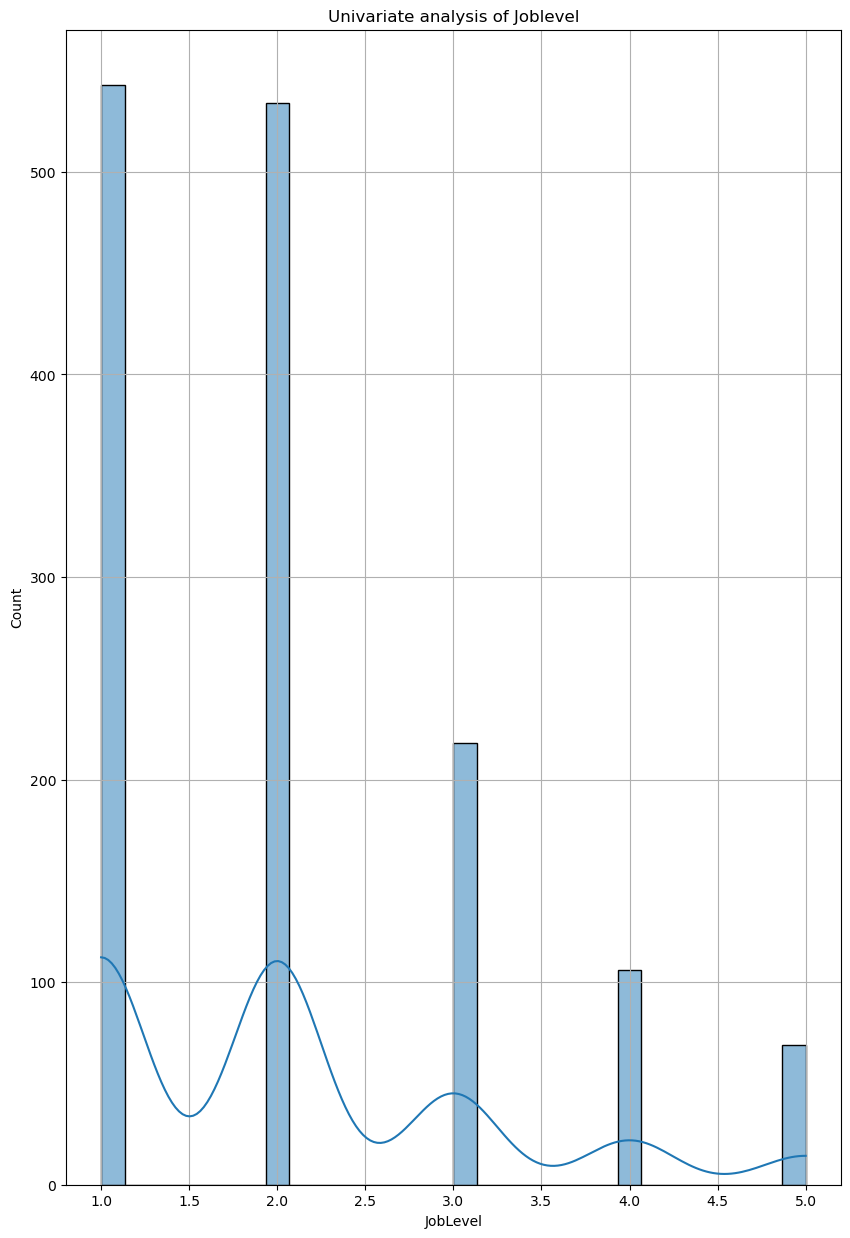

In [36]:
#univariate analysis of joblevel
print("Descirbe info of joblevel")
print(ep_df['joblevel'].describe())
print("Skew info of joblevel")
print(ep_df['joblevel'].skew())

plt.figure(figsize=(10,15))
sns.histplot(data=ep_df,x='joblevel',kde=True,bins=30)
plt.title("Univariate analysis of Joblevel")
plt.xlabel("JobLevel")
plt.ylabel("Count")
plt.grid(True)
plt.plot()

Descirbe info of joblevel
count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: joblevel, dtype: float64
Skew info of joblevel
1.0254012829518246


[]

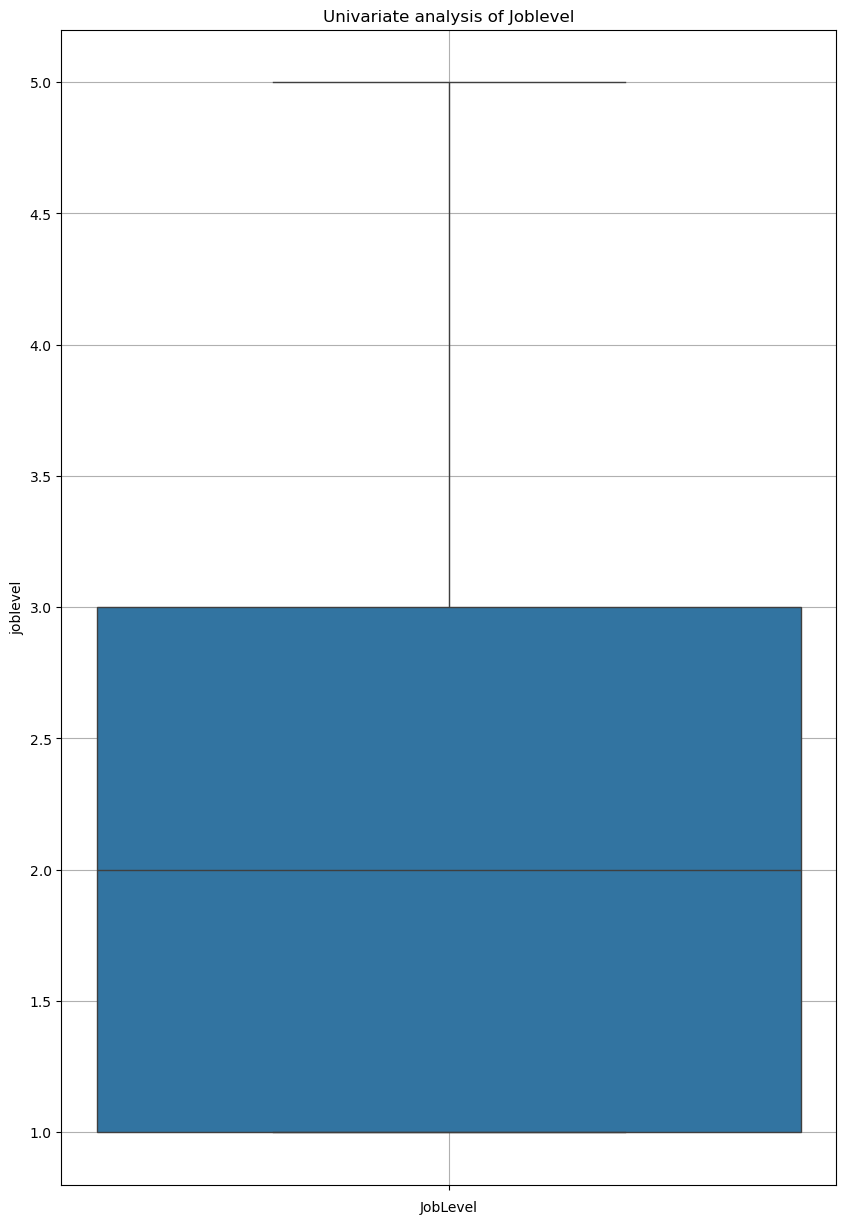

In [42]:
#univariate analysis of joblevel
print("Descirbe info of joblevel")
print(ep_df['joblevel'].describe())
print("Skew info of joblevel")
print(ep_df['joblevel'].skew())

plt.figure(figsize=(10,15))
sns.boxplot(data=ep_df['joblevel'])
plt.title("Univariate analysis of Joblevel")
plt.xlabel("JobLevel")
plt.grid(True)
plt.plot()

In [95]:
ep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1470 non-null   int64   
 1   attrition                 1470 non-null   object  
 2   businesstravel            1470 non-null   object  
 3   dailyrate                 1470 non-null   int64   
 4   department                1470 non-null   object  
 5   distancefromhome          1470 non-null   int64   
 6   education                 1470 non-null   int64   
 7   educationfield            1470 non-null   object  
 8   employeecount             1470 non-null   int64   
 9   employeenumber            1470 non-null   int64   
 10  environmentsatisfaction   1470 non-null   int64   
 11  gender                    1470 non-null   object  
 12  hourlyrate                1470 non-null   int64   
 13  jobinvolvement            1470 non-null   int64 

attrition               No        Yes
jobsatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976


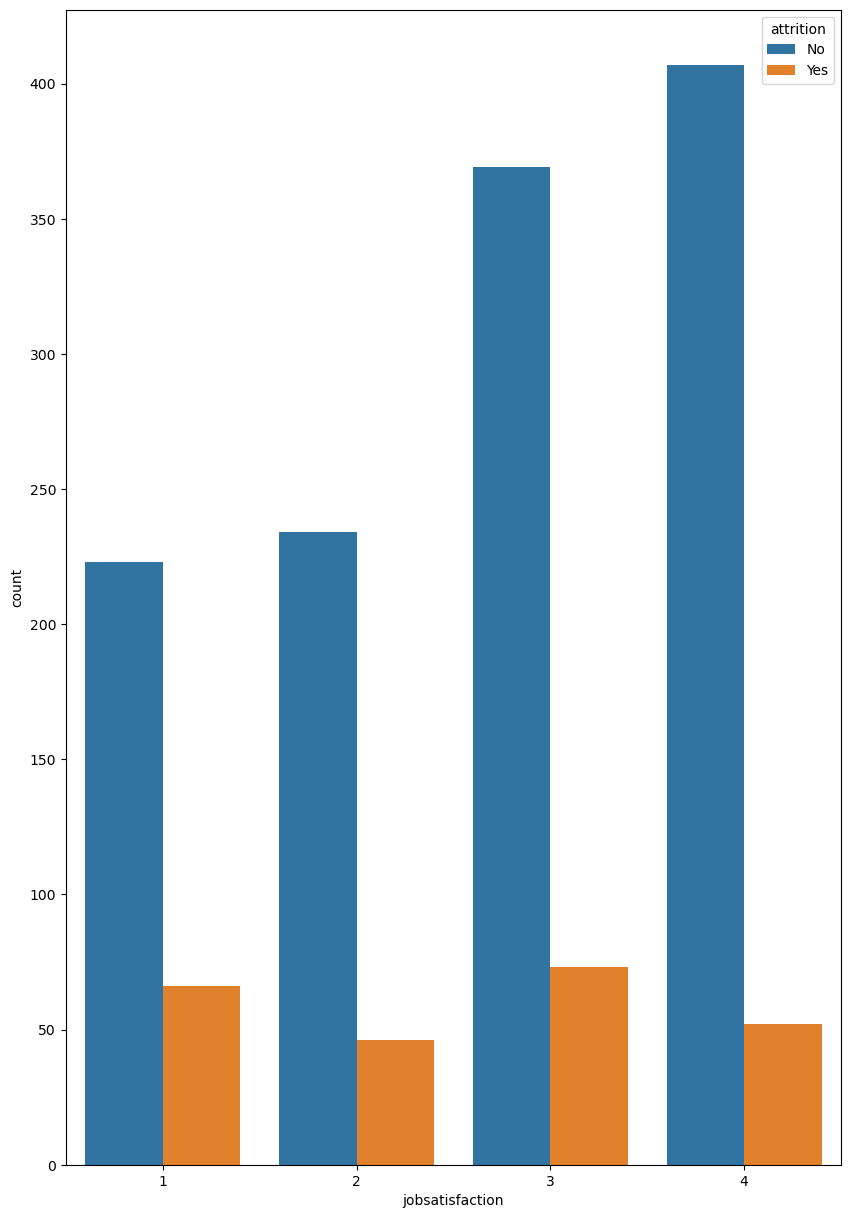

In [103]:
#bivariate analysis with attrition
df1['jobsatisfaction'].unique()

js = pd.crosstab(
    index=df1["jobsatisfaction"],
    columns=df1["attrition"],
    normalize="index"
) * 100
print(js)

plt.figure(figsize=(10,15))
sns.countplot(data=df1,x="jobsatisfaction",hue="attrition")
plt.show()

attrition               No                  Yes           
gender              Female       Male    Female       Male
jobsatisfaction                                           
1                33.910035  43.252595  7.266436  15.570934
2                33.571429  50.000000  8.571429   7.857143
3                35.067873  48.416290  5.882353  10.633484
4                33.551198  55.119826  3.485839   7.843137


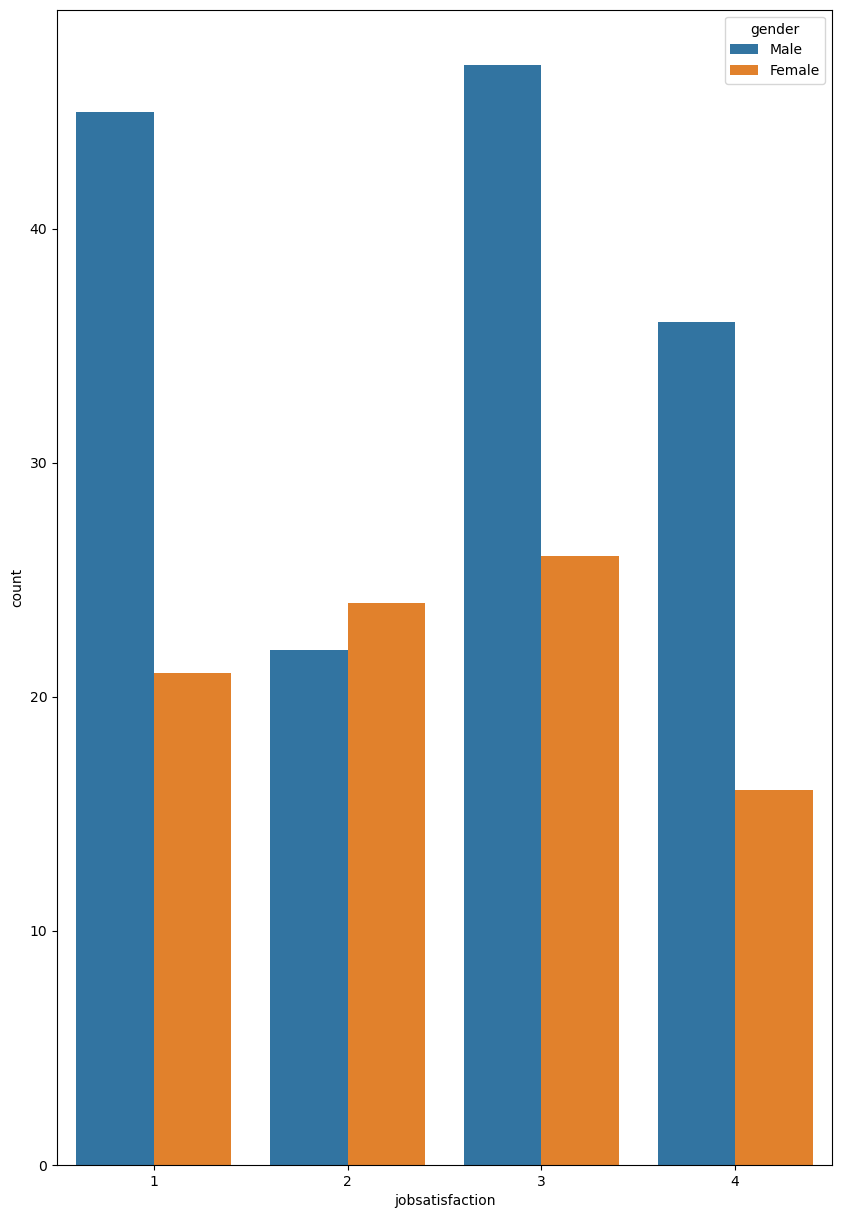

In [105]:
#bivariate analysis with attrition,gender

js = pd.crosstab(
    index=df1["jobsatisfaction"],
    columns=[df1["attrition"],df1['gender']],
    normalize="index"
) * 100
print(js)

plt.figure(figsize=(10,15))
sns.countplot(data=df1[df1['attrition']=="Yes"],x="jobsatisfaction",hue="gender")
plt.show()

Descirbe info of jobsatisfaction
count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: jobsatisfaction, dtype: float64
Skew info of jobsatisfaction
-0.3296719586636647


[]

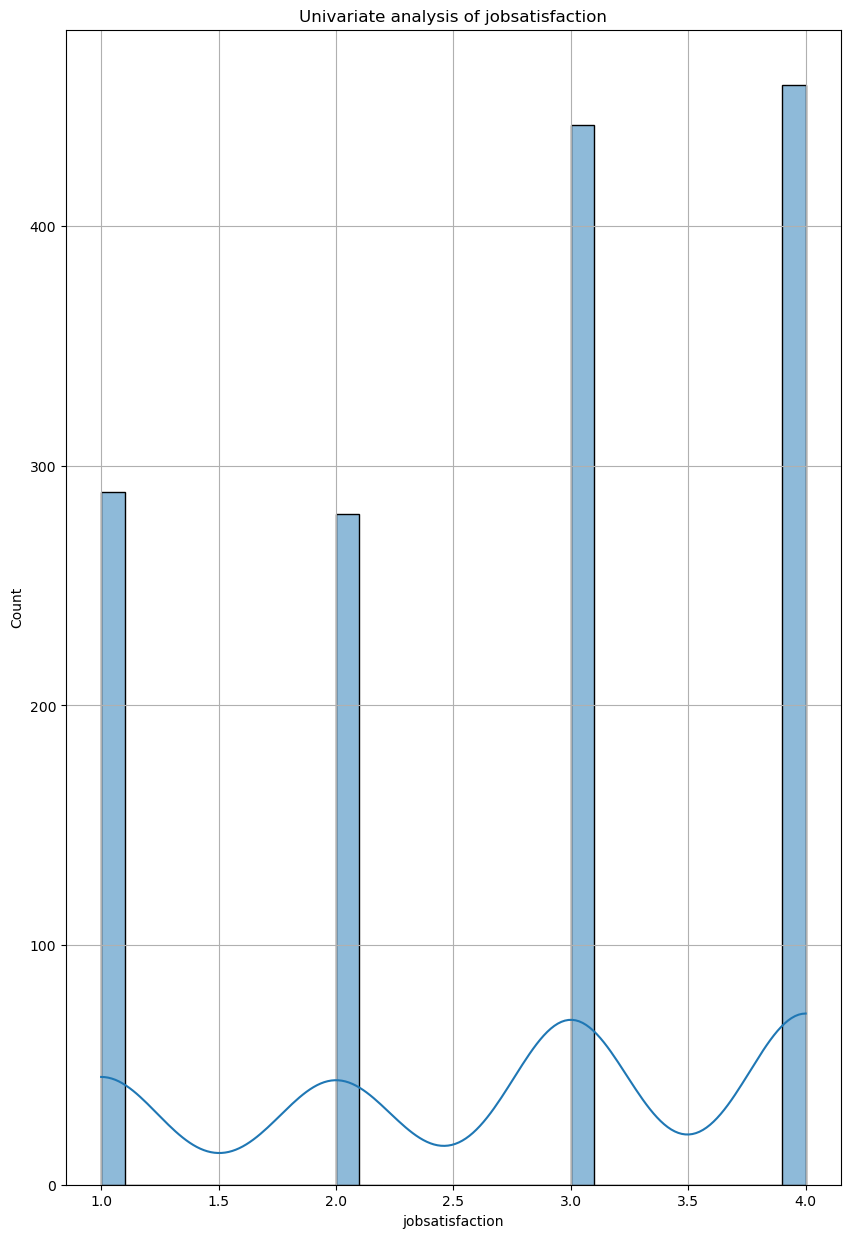

In [44]:
#univariate analysis of jobsatisfaction
print("Descirbe info of jobsatisfaction")
print(ep_df['jobsatisfaction'].describe())
print("Skew info of jobsatisfaction")
print(ep_df['jobsatisfaction'].skew())

plt.figure(figsize=(10,15))
sns.histplot(data=ep_df,x='jobsatisfaction',kde=True,bins=30)
plt.title("Univariate analysis of jobsatisfaction")
plt.xlabel("jobsatisfaction")
plt.ylabel("Count")
plt.grid(True)
plt.plot()

[]

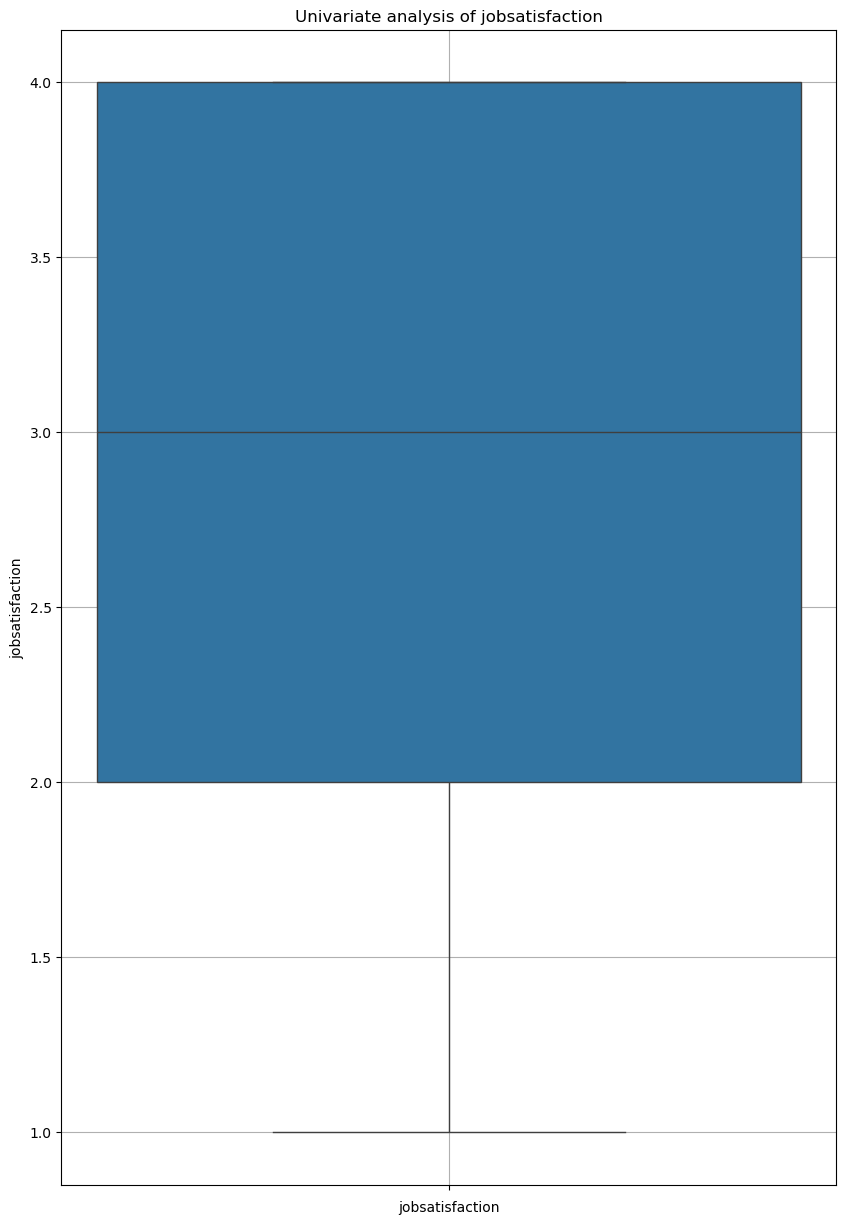

In [46]:
#univariate analysis of jobsatisfaction
plt.figure(figsize=(10,15))
sns.boxplot(data=ep_df['jobsatisfaction'])
plt.title("Univariate analysis of jobsatisfaction")
plt.xlabel("jobsatisfaction")
plt.grid(True)
plt.plot()

In [15]:
ep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [56]:

ep_df['overtime'].head(10)

0    Yes
1     No
2    Yes
3    Yes
4     No
5     No
6    Yes
7     No
8     No
9     No
Name: overtime, dtype: object

attrition        No       Yes
overtime                     
No         0.895636  0.104364
Yes        0.694712  0.305288


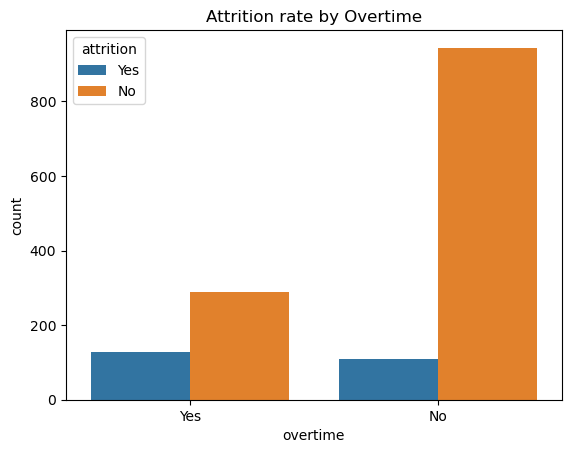

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = ep_df
# Crosstab
print(pd.crosstab(df['overtime'], df['attrition'], normalize='index'))

# Countplot
sns.countplot(x='overtime', hue='attrition', data=df)
plt.title("Attrition rate by Overtime")
plt.show()


attrition               No        Yes
overtime gender                      
No       Female  90.196078   9.803922
         Male    89.164087  10.835913
Yes      Female  73.888889  26.111111
         Male    66.101695  33.898305


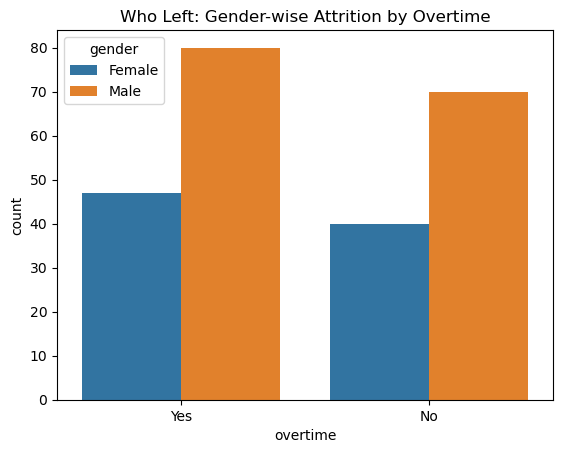

In [107]:
# Crosstab with two index levels: overtime and gender
print(pd.crosstab(index=[df['overtime'], df['gender']],
                  columns=df['attrition'],
                  normalize='index')*100)

sns.countplot(x='overtime', hue='gender', data=df[df['attrition'] == 'Yes'])
plt.title("Who Left: Gender-wise Attrition by Overtime")
plt.show()


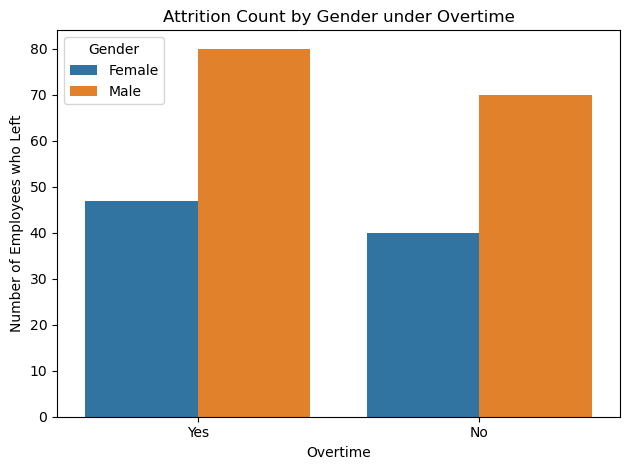

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped bar chart using countplot
sns.countplot(x='overtime', hue='gender', data=df[df['attrition'] == 'Yes'])

plt.title("Attrition Count by Gender under Overtime")
plt.xlabel("Overtime")
plt.ylabel("Number of Employees who Left")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

C:\Users\JEEVA\AppData\Local\Temp\ipykernel_12020\3807132608.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(['distance_bin', 'gender'])['attrition'].value_counts(normalize=True).unstack()


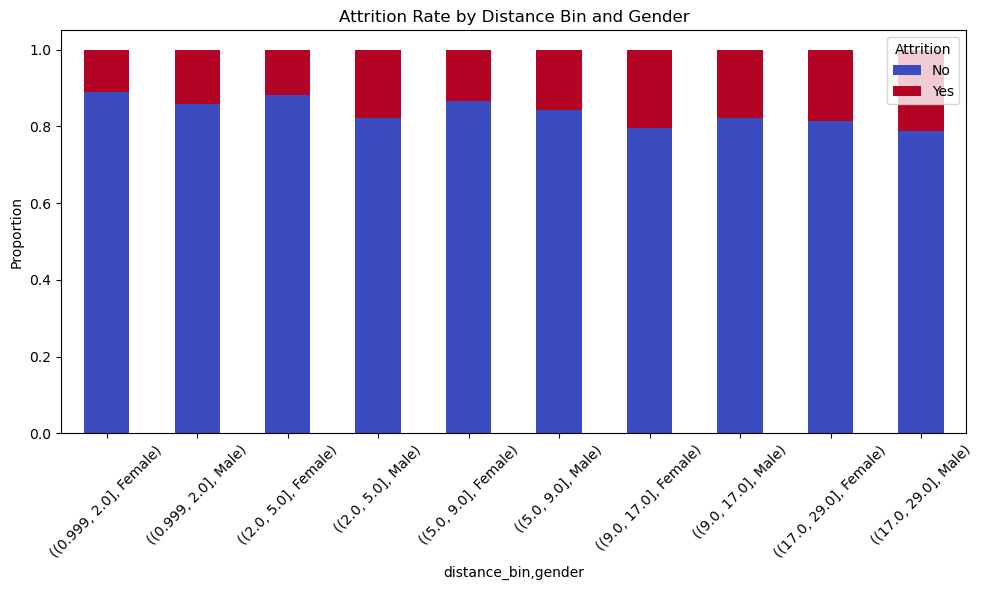

In [70]:
# Crosstab with two index levels: distancefromhome and gender
df['distance_bin'] = pd.qcut(df['distancefromhome'], q=5)
result = df.groupby(['distance_bin', 'gender'])['attrition'].value_counts(normalize=True).unstack()

import matplotlib.pyplot as plt

# Plot
result.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')

# Labels and title
plt.ylabel('Proportion')
plt.title('Attrition Rate by Distance Bin and Gender')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()


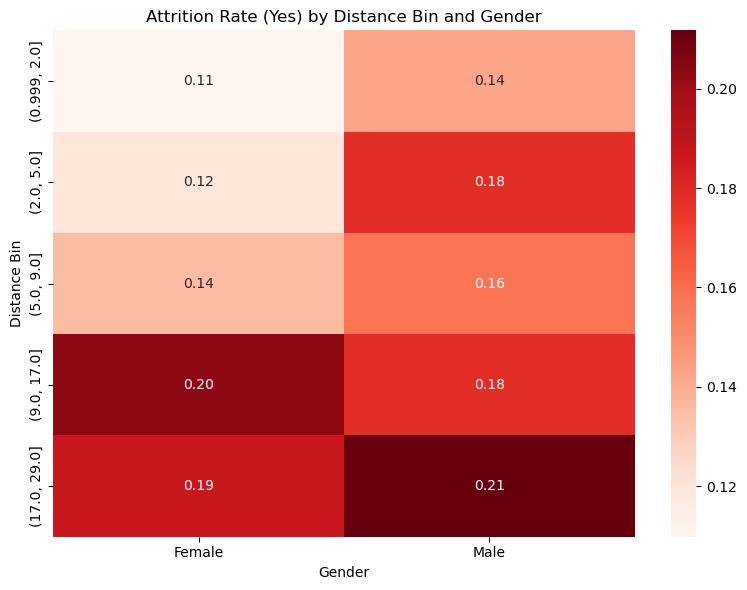

In [72]:
import seaborn as sns

# Reset index to convert MultiIndex to columns
heatmap_data = result.reset_index().pivot(index='distance_bin', columns='gender', values='Yes')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Reds")
plt.title('Attrition Rate (Yes) by Distance Bin and Gender')
plt.ylabel('Distance Bin')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


attrition                            No       Yes
department             gender                    
Human Resources        Female  0.700000  0.300000
                       Male    0.860465  0.139535
Research & Development Female  0.886544  0.113456
                       Male    0.845361  0.154639
Sales                  Female  0.798942  0.201058
                       Male    0.789883  0.210117


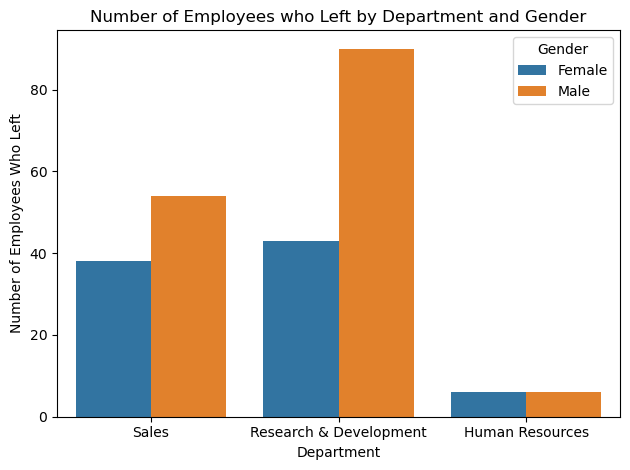

In [88]:
# Crosstab with two index levels: department and gender
import seaborn as sns
import matplotlib.pyplot as plt

# Crosstab with two index levels: overtime and gender
print(pd.crosstab(index=[df['department'], df['gender']],
                 columns=df['attrition'],
                 normalize='index'))

# print(pd.crosstab(index=[df['department'], df['gender']],
#             columns=df['attrition'])
# )

# Grouped bar chart using countplot
sns.countplot(x='department', hue='gender', data=df[df['attrition'] == 'Yes'])

plt.title("Number of Employees who Left by Department and Gender")
plt.xlabel("Department")
plt.ylabel("Number of Employees Who Left")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


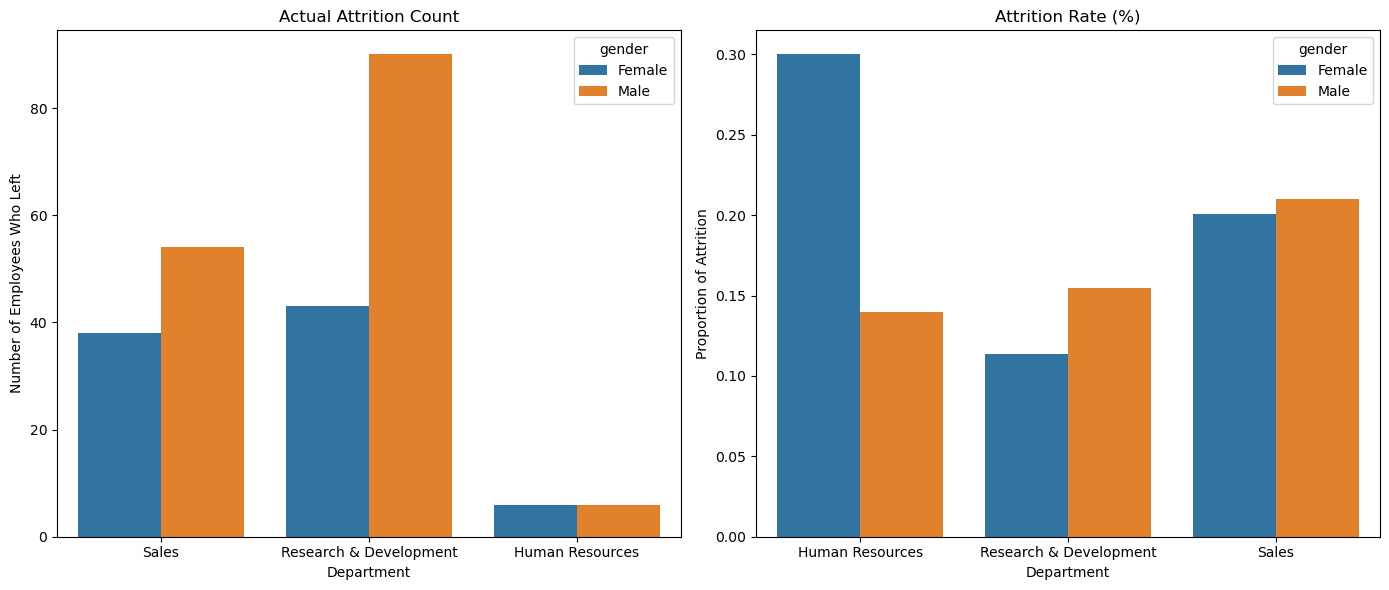

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Left: Absolute counts of attrition
sns.countplot(x='department', hue='gender', data=df[df['attrition'] == 'Yes'], ax=axs[0])
axs[0].set_title('Actual Attrition Count')
axs[0].set_ylabel('Number of Employees Who Left')
axs[0].set_xlabel('Department')

# Right: Percentage (rate) of attrition
rate_df = pd.crosstab(index=[df['department'], df['gender']],
                      columns=df['attrition'],
                      normalize='index').reset_index()

rate_df.columns.name = None  # Clean column header
rate_df = rate_df.rename(columns={'Yes': 'AttritionRate'})

sns.barplot(x='department', y='AttritionRate', hue='gender', data=rate_df, ax=axs[1])
axs[1].set_title('Attrition Rate (%)')
axs[1].set_ylabel('Proportion of Attrition')
axs[1].set_xlabel('Department')

plt.tight_layout()
plt.show()


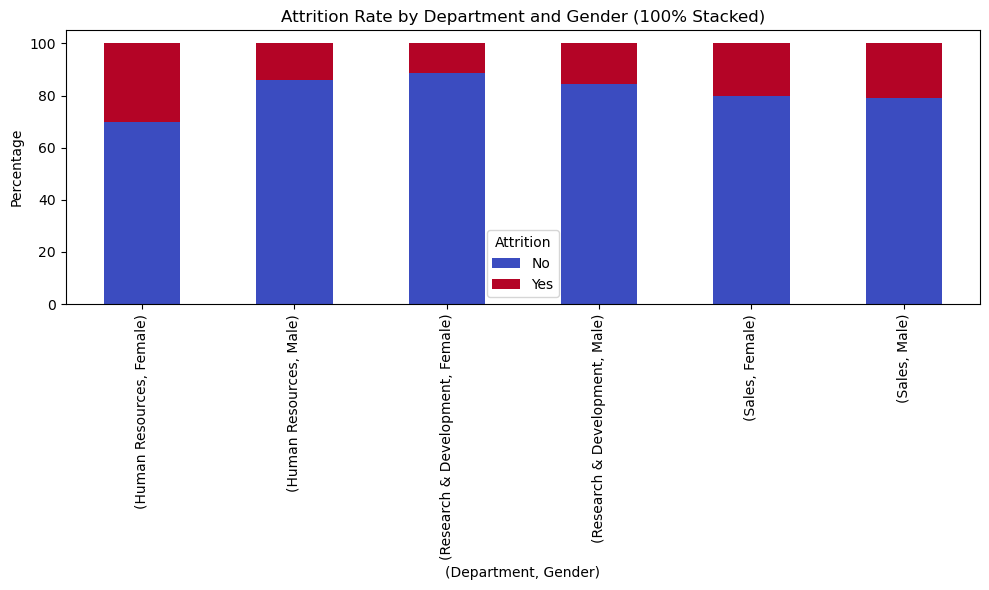

In [92]:
ct = pd.crosstab(index=[df['department'], df['gender']],
                 columns=df['attrition'],
                 normalize='index') * 100

ct.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Attrition Rate by Department and Gender (100% Stacked)')
plt.ylabel('Percentage')
plt.xlabel('(Department, Gender)')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()


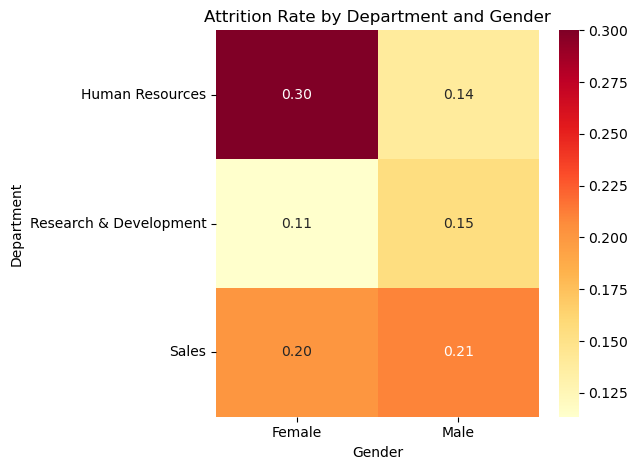

In [94]:
rate = pd.crosstab(index=df['department'],
                   columns=df['gender'],
                   values=(df['attrition'] == 'Yes'),
                   aggfunc='mean')

sns.heatmap(rate, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Attrition Rate by Department and Gender")
plt.ylabel("Department")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


attrition                No       Yes
businesstravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569


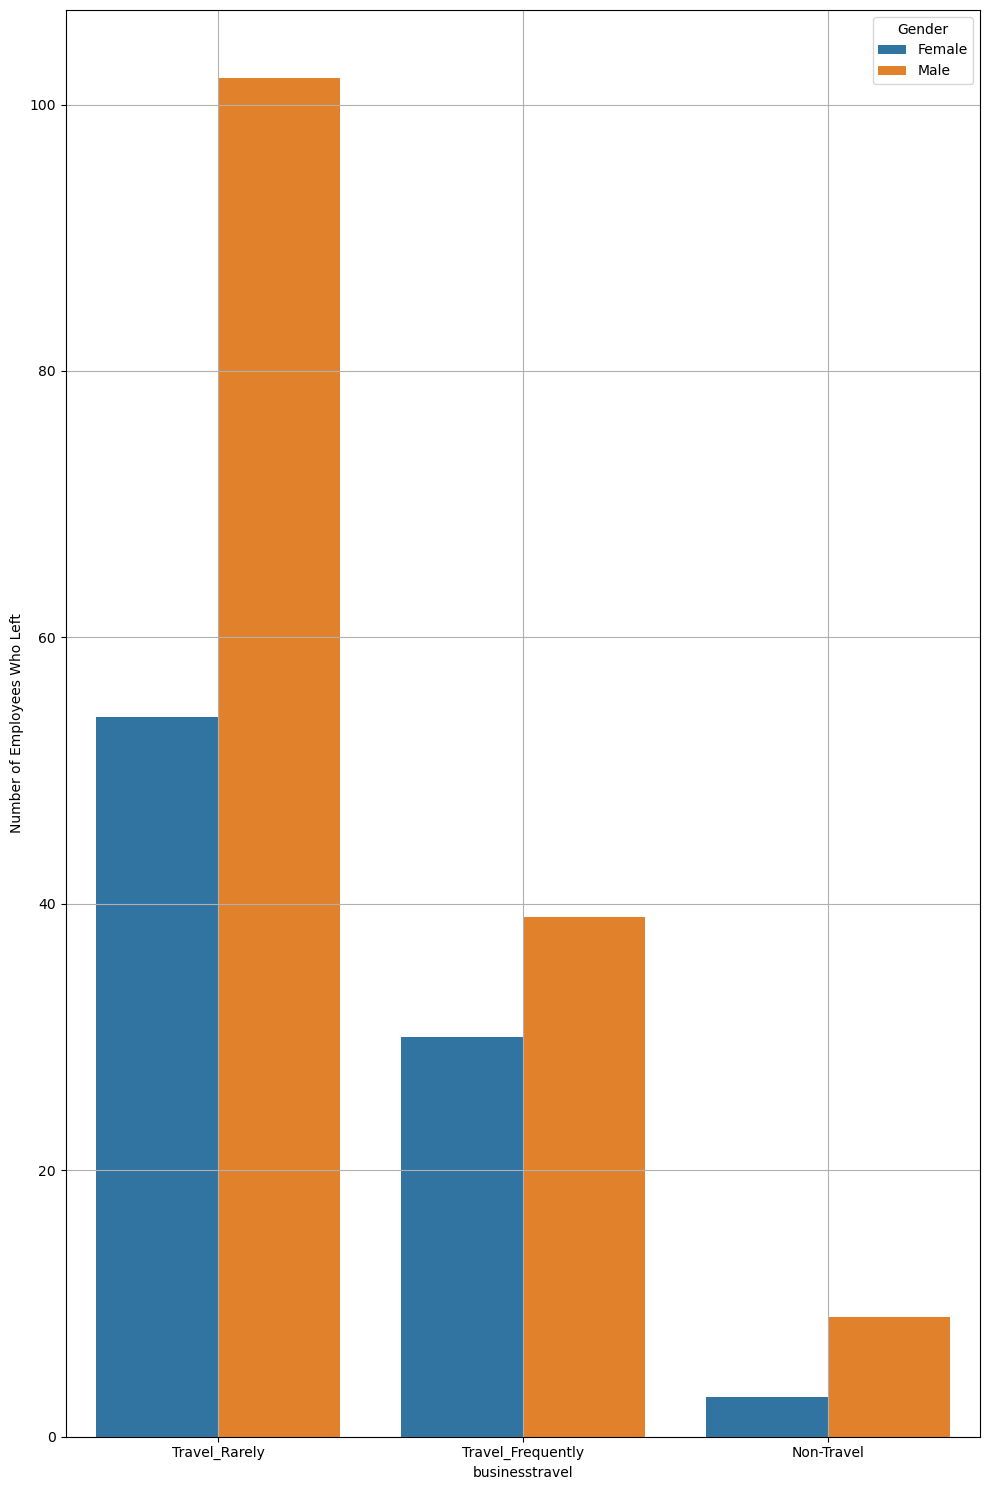

In [37]:
df = ep_df
df['businesstravel'].unique()

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Crosstab with two index levels: overtime and gender , df['gender']
print(pd.crosstab(index=[df['businesstravel']],
                 columns=df['attrition'],
                 normalize='index'))


plt.figure(figsize=(10,15))
sns.countplot(data=df[df['attrition'] == 'Yes'],x='businesstravel',hue='gender')
plt.xlabel("businesstravel")
plt.ylabel("Number of Employees Who Left")
plt.legend(title='Gender')
plt.tight_layout()
plt.grid(True)
plt.show()

attrition                     No       Yes
department                                
Human Resources         0.636364  0.363636
Research & Development  0.796703  0.203297
Sales                   0.666667  0.333333


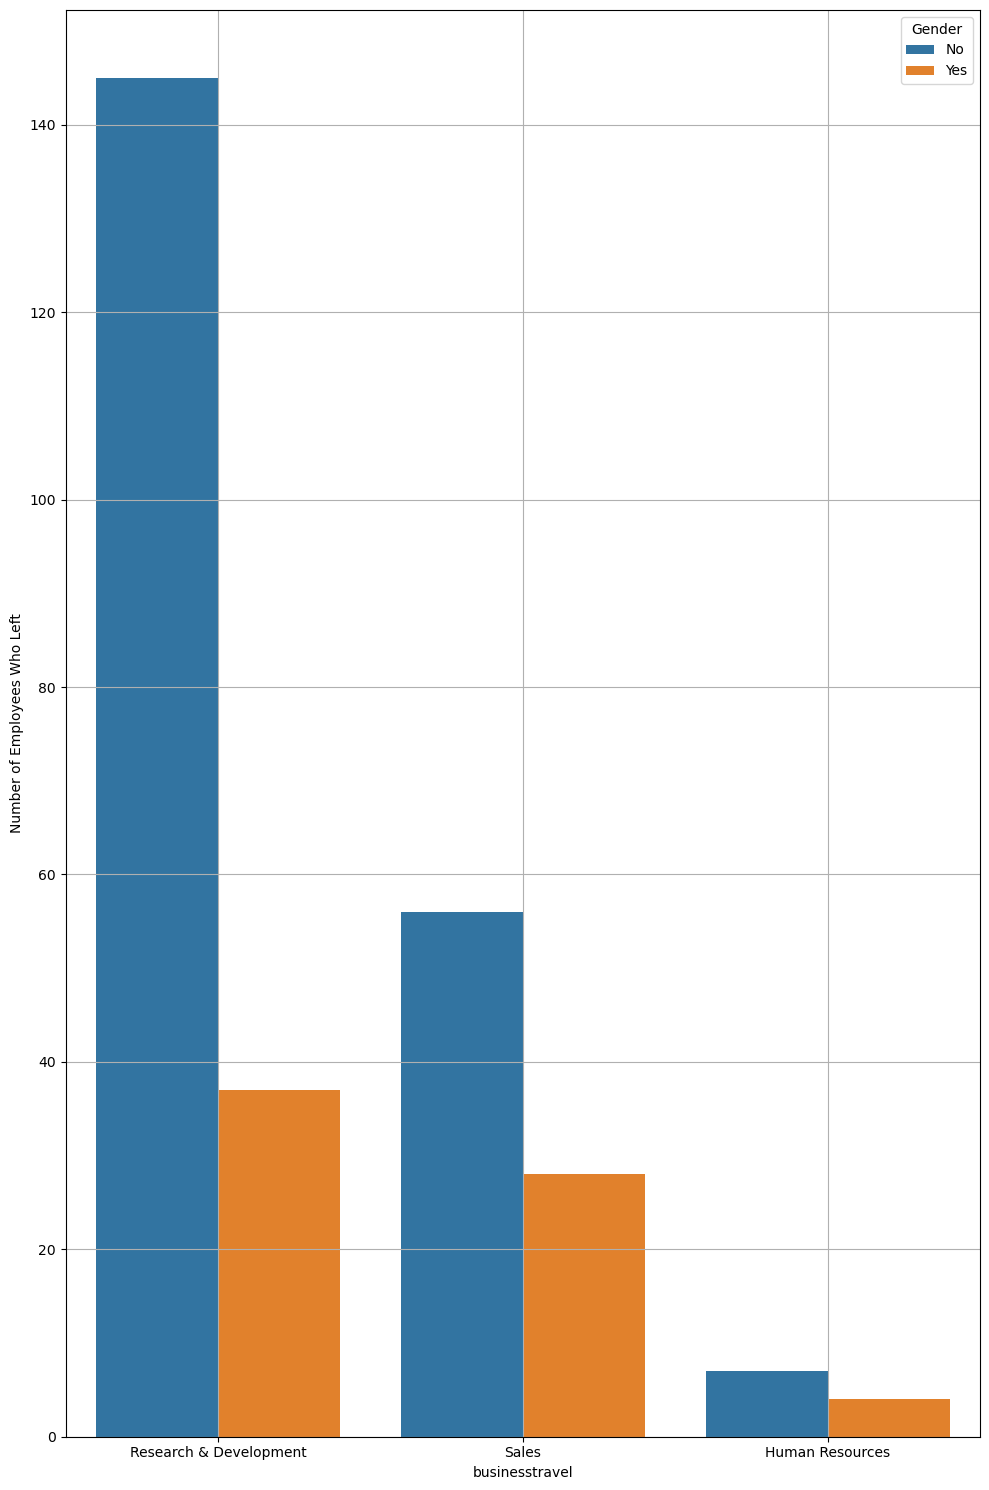

In [53]:
# Step 1: Filter only frequent travelers
df_frequent = df[df['businesstravel'] == 'Travel_Frequently']

# Step 2: Create normalized crosstab by department and attrition
dept_attrition = pd.crosstab(df_frequent['department'], df_frequent['attrition'], normalize='index')
print(dept_attrition)


plt.figure(figsize=(10,15))
sns.countplot(data=df_frequent,x="department",hue="attrition")
plt.xlabel("businesstravel")
plt.ylabel("Number of Employees Who Left")
plt.legend(title='Gender')
plt.tight_layout()
plt.grid(True)
plt.show()

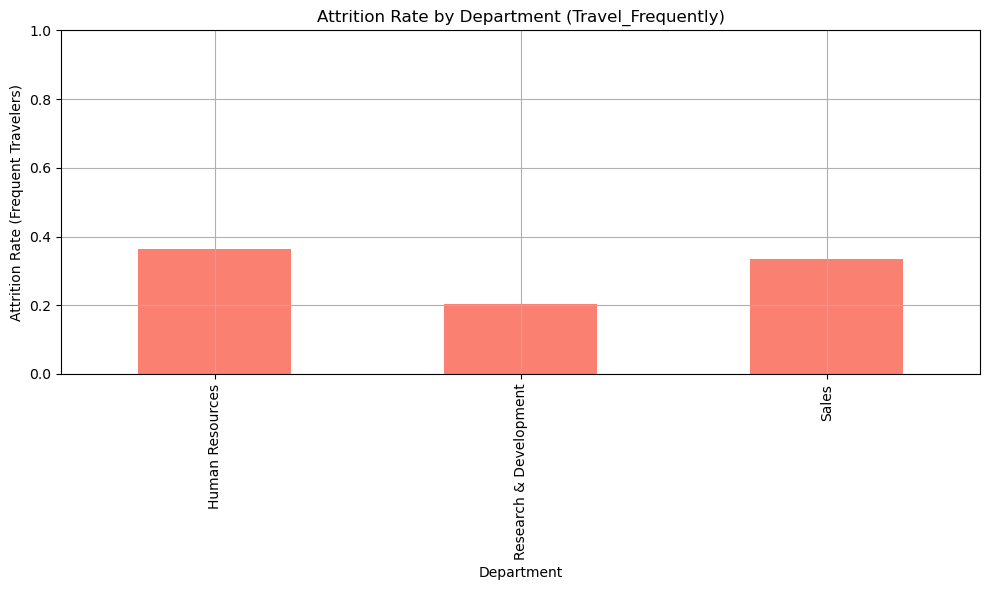

In [55]:
dept_attrition['Yes'].plot(kind='bar', figsize=(10,6), color='salmon')
plt.ylabel("Attrition Rate (Frequent Travelers)")
plt.title("Attrition Rate by Department (Travel_Frequently)")
plt.xlabel("Department")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [59]:
#bivariate analysis on education
df['education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

gender    Female     Male    
attrition     No Yes   No Yes
education                    
1             49  11   90  20
2             98  19  140  25
3            197  38  276  61
4            138  16  202  42
5             19   3   24   2
gender    Female         Male       
attrition     No   Yes     No    Yes
education                           
1          28.82  6.47  52.94  11.76
2          34.75  6.74  49.65   8.87
3          34.44  6.64  48.25  10.66
4          34.67  4.02  50.75  10.55
5          39.58  6.25  50.00   4.17


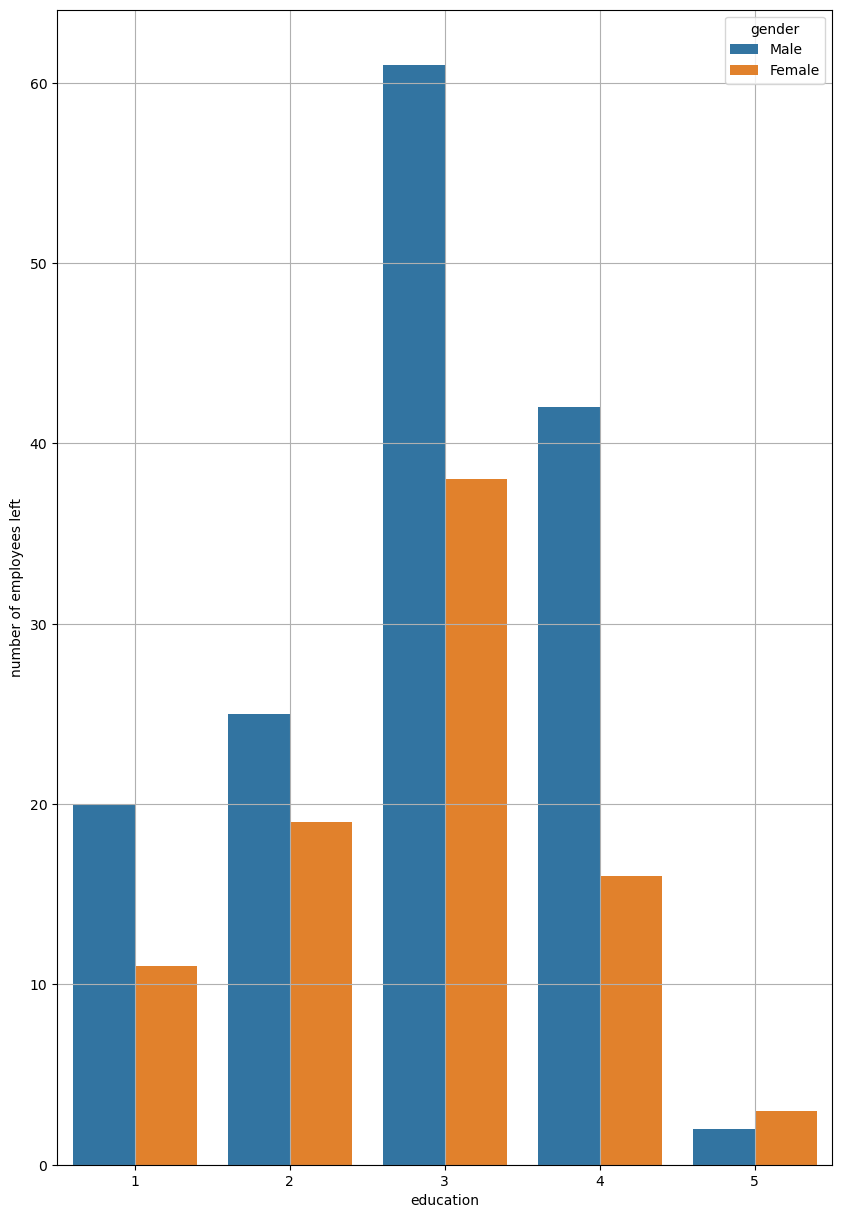

In [83]:
ed = pd.crosstab(index=df['education'],
                   columns=[df['gender'],df['attrition']],
                   )
print(ed)

ed_pct = pd.crosstab(index=df['education'],
                     columns=[df['gender'], df['attrition']],
                     normalize='index') * 100

print(ed_pct.round(2))


plt.figure(figsize=(10,15))
# Grouped bar chart using countplot
sns.countplot(x='education', hue='gender', data=df[df['attrition'] == 'Yes'])
plt.xlabel("education")
plt.ylabel("number of employees left")
plt.grid(True)
plt.show()

attrition               No       Yes
educationfield                      
Human Resources   0.013605  0.004762
Life Sciences     0.351701  0.060544
Marketing         0.084354  0.023810
Medical           0.272789  0.042857
Other             0.048299  0.007483
Technical Degree  0.068027  0.021769


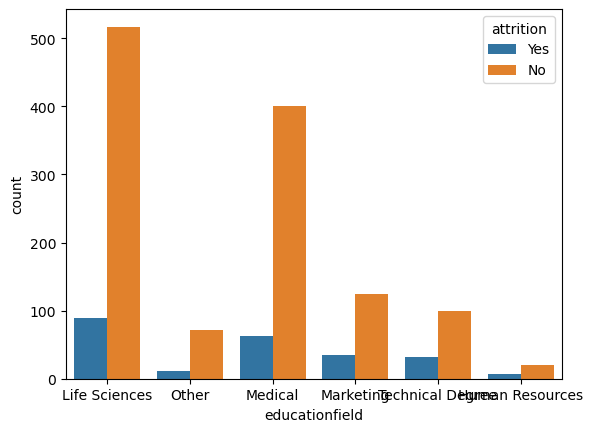

In [99]:
df['educationfield'].unique()
sns.countplot(x='educationfield', hue='attrition', data=df)

attrition                       No       Yes
environmentsatisfaction                     
1                        14.421769  4.897959
2                        16.598639  2.925170
3                        26.598639  4.217687
4                        26.258503  4.081633


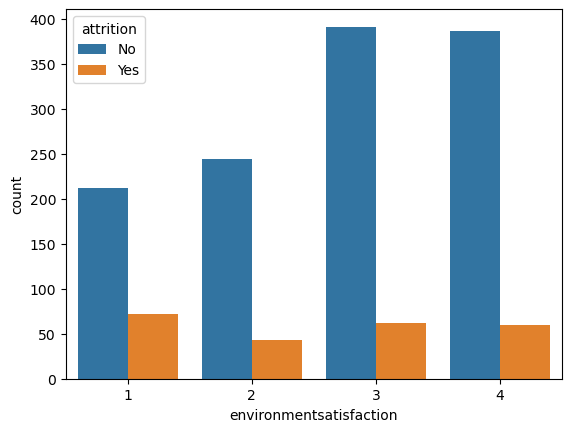

In [127]:
#bivariate analysis of environmentsatisfaction
sns.countplot(data = df , x = df["environmentsatisfaction"],hue=df["attrition"])

#
es = pd.crosstab(index=df["environmentsatisfaction"],columns=[df["attrition"]],normalize=True)*100
print(es)

gender                      Female                  Male           
attrition                       No        Yes         No        Yes
environmentsatisfaction                                            
1                        16.966068  32.183908  17.349727  29.333333
2                        18.363273  22.988506  20.765027  15.333333
3                        34.131737  20.689655  30.054645  29.333333
4                        30.538922  24.137931  31.830601  26.000000


<Axes: xlabel='environmentsatisfaction', ylabel='count'>

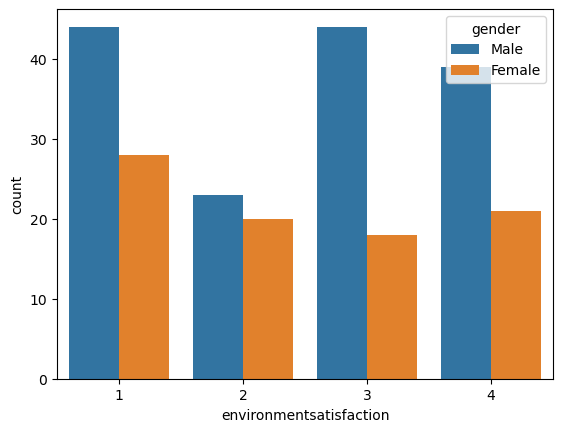

In [137]:
gd_env = pd.crosstab(
    index=[df['environmentsatisfaction']], 
    columns=[df['gender'], df['attrition']], 
    normalize='columns'  # to get percentage within each (Gender, Attrition)
) * 100

print(gd_env)
sns.countplot(data = df[df["attrition"] == 'Yes'] , x = "environmentsatisfaction",hue="gender")

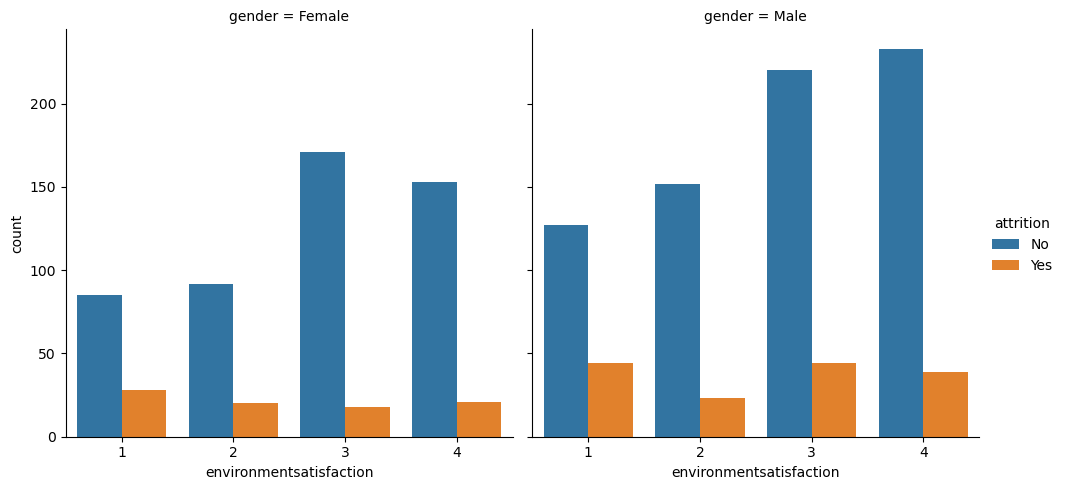

In [143]:
import seaborn as sns
g = sns.catplot(data=df, x="environmentsatisfaction", hue="attrition",
                col="gender", kind="count")


col_0                    No - Female  No - Male  Yes - Female  Yes - Male
environmentsatisfaction                                                  
1                                 85        127            28          44
2                                 92        152            20          23
3                                171        220            18          44
4                                153        233            21          39
col_0                    No - Female  No - Male  Yes - Female  Yes - Male
environmentsatisfaction                                                  
1                           5.782313   8.639456      1.904762    2.993197
2                           6.258503  10.340136      1.360544    1.564626
3                          11.632653  14.965986      1.224490    2.993197
4                          10.408163  15.850340      1.428571    2.653061


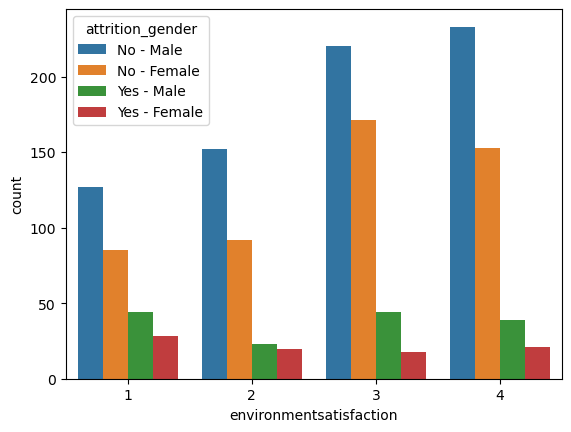

In [151]:
df1 = df
df1["attrition_gender"] = df1["attrition"] + " - " + df1["gender"]
sns.countplot(data=df1, x="environmentsatisfaction", hue="attrition_gender")

edg = pd.crosstab(df["environmentsatisfaction"], df["attrition"] + " - " + df["gender"])
print(edg)


edg = pd.crosstab(df["environmentsatisfaction"], df["attrition"] + " - " + df["gender"],normalize=True)*100
print(edg)

In [153]:
gg = pd.crosstab(df["environmentsatisfaction"], df["attrition"] + " - " + df["gender"], normalize='index') * 100
print(gg)

col_0                    No - Female  No - Male  Yes - Female  Yes - Male
environmentsatisfaction                                                  
1                          29.929577  44.718310      9.859155   15.492958
2                          32.055749  52.961672      6.968641    8.013937
3                          37.748344  48.565121      3.973510    9.713024
4                          34.304933  52.242152      4.708520    8.744395


attrition              No        Yes
jobinvolvement                      
1               66.265060  33.734940
2               81.066667  18.933333
3               85.599078  14.400922
4               90.972222   9.027778


<Axes: xlabel='jobinvolvement', ylabel='count'>

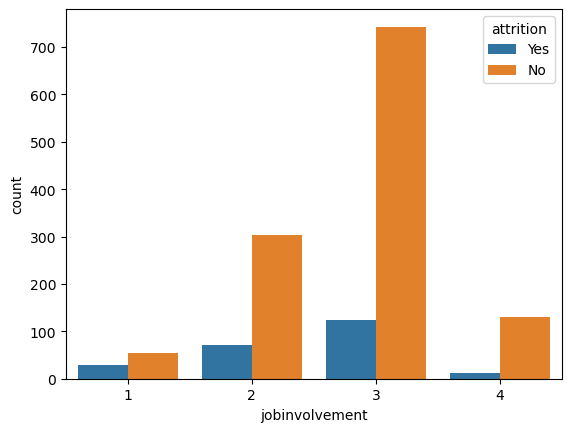

In [159]:
#bivariate analysis of job involvement
gd_env = pd.crosstab(
    index=[df['jobinvolvement']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, Attrition)
) * 100

print(gd_env)
sns.countplot(data = df , x = "jobinvolvement",hue="attrition")

gender             Female                  Male           
attrition              No        Yes         No        Yes
jobinvolvement                                            
1               22.891566  14.457831  43.373494  19.277108
2               36.266667   6.133333  44.800000  12.800000
3               34.447005   5.299539  51.152074   9.101382
4               32.638889   4.166667  58.333333   4.861111


<Axes: xlabel='jobinvolvement', ylabel='count'>

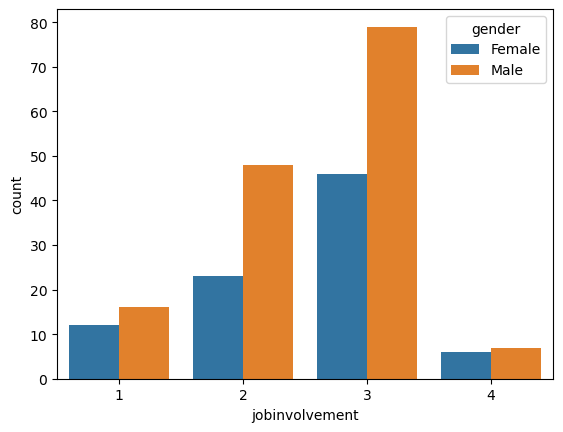

In [157]:
gd_env = pd.crosstab(
    index=[df['jobinvolvement']], 
    columns=[df['gender'], df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, Attrition)
) * 100

print(gd_env)
sns.countplot(data = df[df["attrition"] == 'Yes'] , x = "jobinvolvement",hue="gender")

attrition         No        Yes
joblevel                       
1          73.664825  26.335175
2          90.262172   9.737828
3          85.321101  14.678899
4          95.283019   4.716981
5          92.753623   7.246377


<Axes: xlabel='joblevel', ylabel='count'>

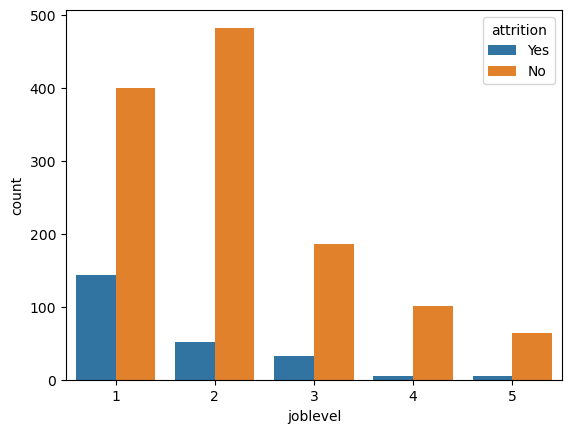

In [161]:
#bivariate analysis of joblevel
gd_env = pd.crosstab(
    index=[df['joblevel']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, Attrition)
) * 100

print(gd_env)
sns.countplot(data = df , x = "joblevel",hue="attrition")

gender        Female                 Male           
attrition         No       Yes         No        Yes
joblevel                                            
1          26.887661  9.760589  46.777164  16.574586
2          37.827715  3.370787  52.434457   6.367041
3          37.614679  5.504587  47.706422   9.174312
4          47.169811  0.943396  48.113208   3.773585
5          30.434783  4.347826  62.318841   2.898551


<Axes: xlabel='joblevel', ylabel='count'>

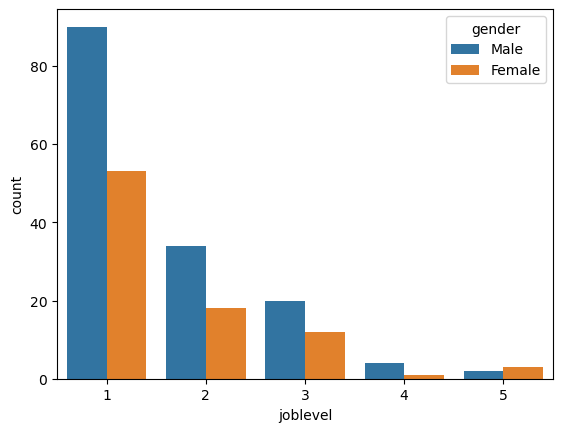

In [163]:
gd_env = pd.crosstab(
    index=[df['joblevel']], 
    columns=[df['gender'], df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, Attrition)
) * 100

print(gd_env)
sns.countplot(data = df[df["attrition"] == 'Yes'] , x = "joblevel",hue="gender")

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
attrition                         No        Yes
jobrole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036


<Axes: xlabel='jobrole', ylabel='count'>

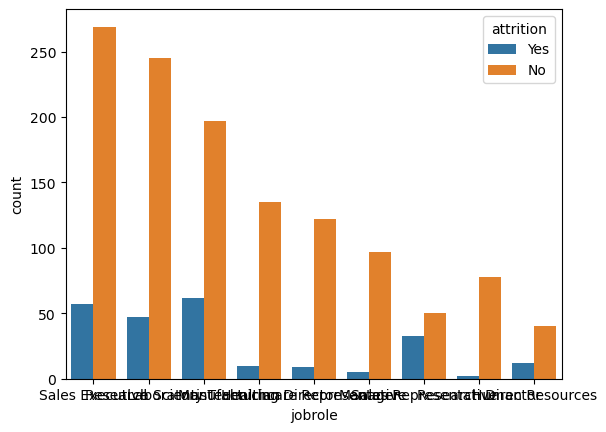

In [173]:
#bivariate analysis of joblevel

print(df['jobrole'].unique())
gd_env = pd.crosstab(
    index=[df['jobrole']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, Attrition)
) * 100

print(gd_env)
sns.countplot(data = df , x = "jobrole",hue="attrition")

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
attrition                         No                   Yes           
gender                        Female       Male     Female       Male
jobrole                                                              
Healthcare Representative  35.114504  58.015267   3.816794   3.053435
Human Resources            19.230769  57.692308  11.538462  11.538462
Laboratory Technician      26.640927  49.420849   6.177606  17.760618
Manager                    44.117647  50.980392   1.960784   2.941176
Manufacturing Director     46.896552  46.206897   2.758621   4.137931
Research Director          40.000000  57.500000   1.250000   1.250000
Research Scientist         33.219178  50.684932   5.821918  10.273973
Sales Executive            34.355828  48.159509   6.134969  11.349693
Sales Representative       26.506024  3

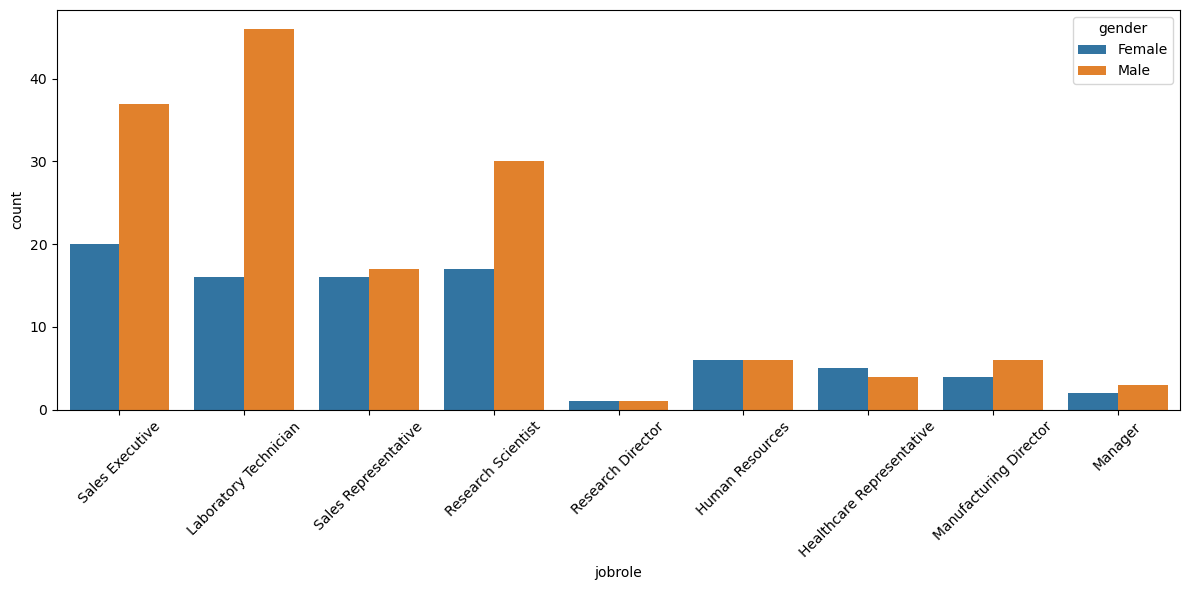

In [177]:
#multivariate analysis of joblevel

print(df['jobrole'].unique())
gd_env = pd.crosstab(
    index=[df['jobrole']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, Attrition)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "jobrole", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[4 2 3 1]
attrition               No        Yes
jobsatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976
[4 2 3 1]
attrition               No                  Yes           
gender              Female       Male    Female       Male
jobsatisfaction                                           
1                33.910035  43.252595  7.266436  15.570934
2                33.571429  50.000000  8.571429   7.857143
3                35.067873  48.416290  5.882353  10.633484
4                33.551198  55.119826  3.485839   7.843137


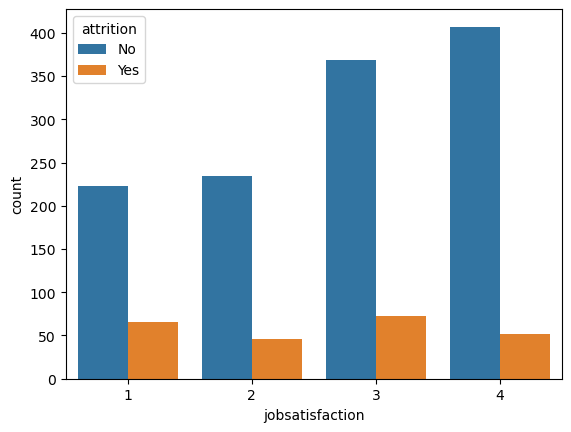

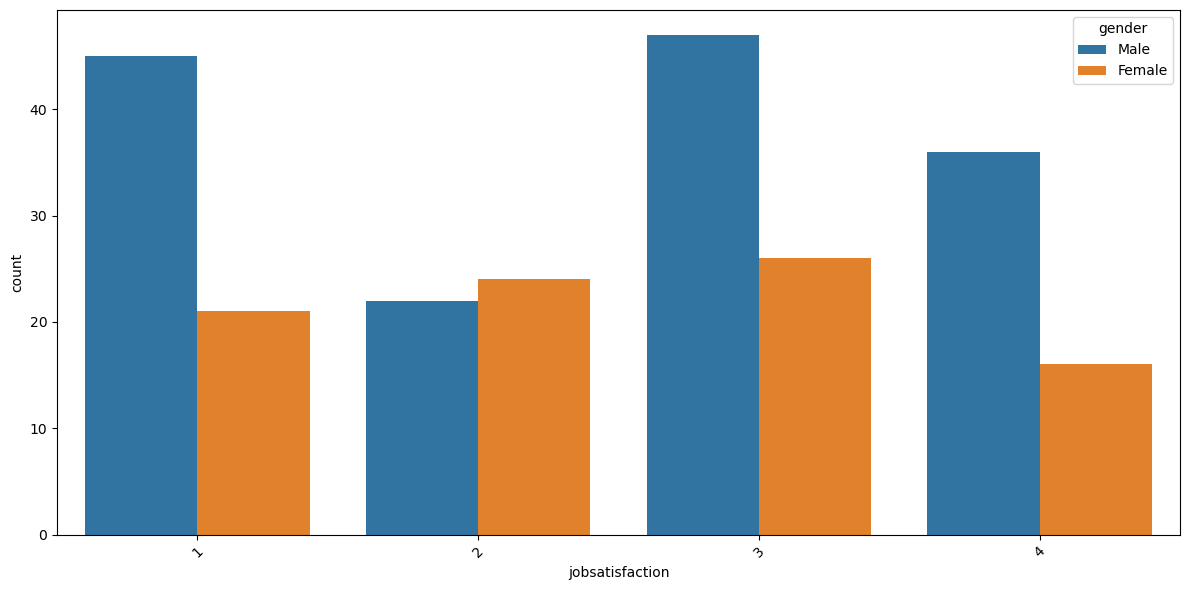

In [186]:
#bivariate analysis of jobsatisfaction

print(df['jobsatisfaction'].unique())
gd_env = pd.crosstab(
    index=[df['jobsatisfaction']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, jobsatisfaction)
) * 100

print(gd_env)
sns.countplot(data = df , x = "jobsatisfaction",hue="attrition")

gd_env = pd.crosstab(
    index=[df['jobsatisfaction']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, jobsatisfaction)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "jobsatisfaction", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


['Single' 'Married' 'Divorced']
attrition             No        Yes
maritalstatus                      
Divorced       89.908257  10.091743
Married        87.518574  12.481426
Single         74.468085  25.531915
attrition             No                   Yes           
gender            Female       Male     Female       Male
maritalstatus                                            
Divorced       33.027523  56.880734   2.752294   7.339450
Married        35.809807  51.708767   4.606241   7.875186
Single         32.340426  42.127660  10.000000  15.531915


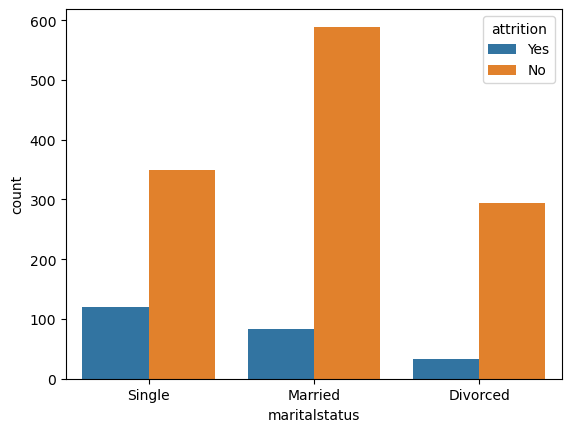

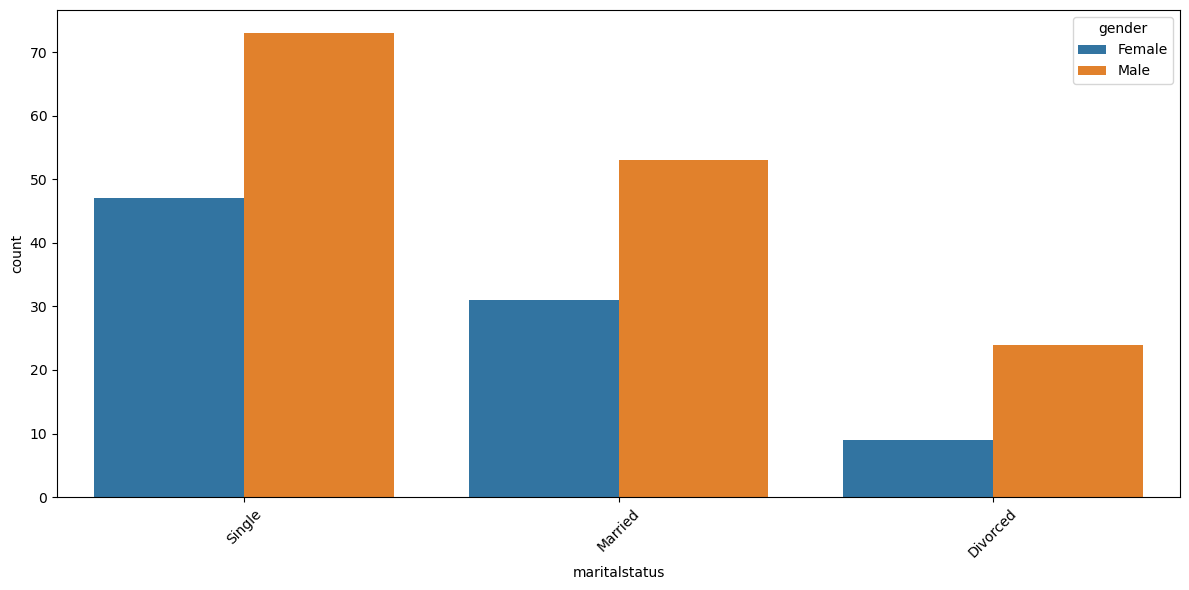

In [188]:
#bivariate analysis of maritalstatus

print(df['maritalstatus'].unique())
gd_env = pd.crosstab(
    index=[df['maritalstatus']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, maritalstatus)
) * 100

print(gd_env)
sns.countplot(data = df , x = "maritalstatus",hue="attrition")

gd_env = pd.crosstab(
    index=[df['maritalstatus']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, maritalstatus)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "maritalstatus", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[5993 5130 2090 ... 9991 5390 4404]
attrition         No    Yes
monthlyincome              
1009             0.0  100.0
1051           100.0    0.0
1052           100.0    0.0
1081             0.0  100.0
1091             0.0  100.0
...              ...    ...
19859            0.0  100.0
19926          100.0    0.0
19943          100.0    0.0
19973          100.0    0.0
19999          100.0    0.0

[1349 rows x 2 columns]


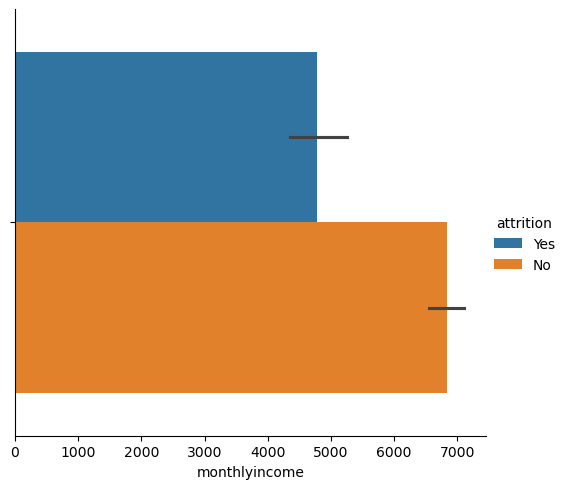

In [192]:
#bivariate analysis of monthlyincome

print(df['monthlyincome'].unique())
gd_env = pd.crosstab(
    index=[df['monthlyincome']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, monthlyincome)
) * 100

print(gd_env)
sns.catplot(data = df , x = "monthlyincome",hue="attrition", kind="bar")

# gd_env = pd.crosstab(
#     index=[df['monthlyincome']], 
#     columns=[df['attrition'],df['gender']], 
#     normalize='index'  # to get percentage within each (Gender, monthlyincome)
# ) * 100

# print(gd_env)
# plt.figure(figsize=(12,6))  # Adjust width and height as needed
# sns.countplot(data = df[df['attrition']== "Yes"], x = "monthlyincome", hue="gender")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


[8 1 6 9 0 4 5 2 7 3]
attrition                  No        Yes
numcompaniesworked                      
0                   88.324873  11.675127
1                   81.190019  18.809981
2                   89.041096  10.958904
3                   89.937107  10.062893
4                   87.769784  12.230216
5                   74.603175  25.396825
6                   77.142857  22.857143
7                   77.027027  22.972973
8                   87.755102  12.244898
9                   76.923077  23.076923
attrition                  No                   Yes           
gender                 Female       Male     Female       Male
numcompaniesworked                                            
0                   30.964467  57.360406   5.583756   6.091371
1                   31.285988  49.904031   7.869482  10.940499
2                   32.876712  56.164384   3.424658   7.534247
3                   41.509434  48.427673   2.515723   7.547170
4                   36.690647  51.079137   4.

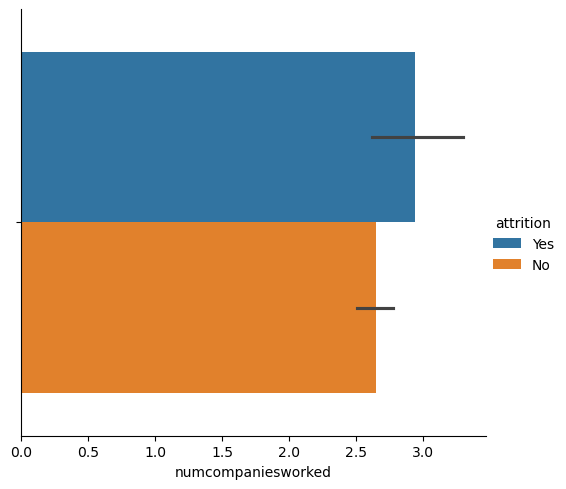

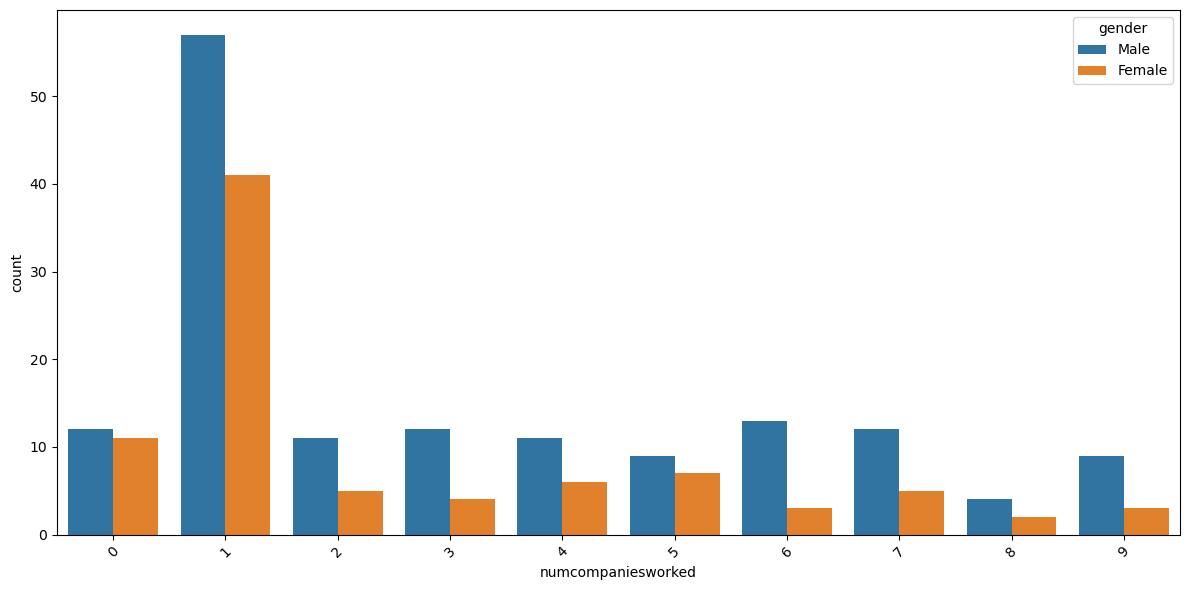

In [194]:
#bivariate analysis of numcompaniesworked

print(df['numcompaniesworked'].unique())
gd_env = pd.crosstab(
    index=[df['numcompaniesworked']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, numcompaniesworked)
) * 100

print(gd_env)
sns.catplot(data = df , x = "numcompaniesworked",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['numcompaniesworked']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, numcompaniesworked)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "numcompaniesworked", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


['Y']
attrition         No        Yes
over18                         
Y          83.877551  16.122449
attrition         No                  Yes           
gender        Female       Male    Female       Male
over18                                              
Y          34.081633  49.795918  5.918367  10.204082


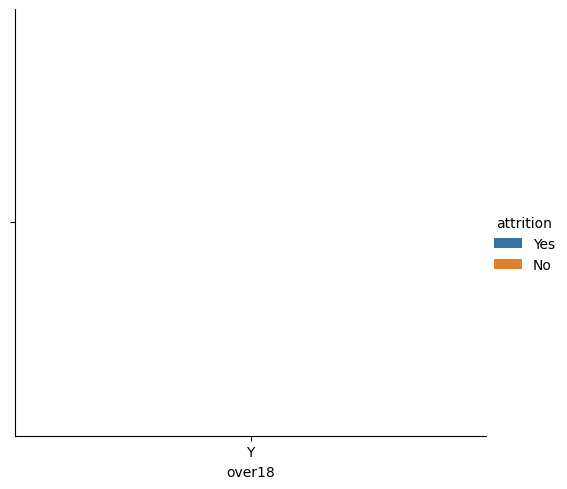

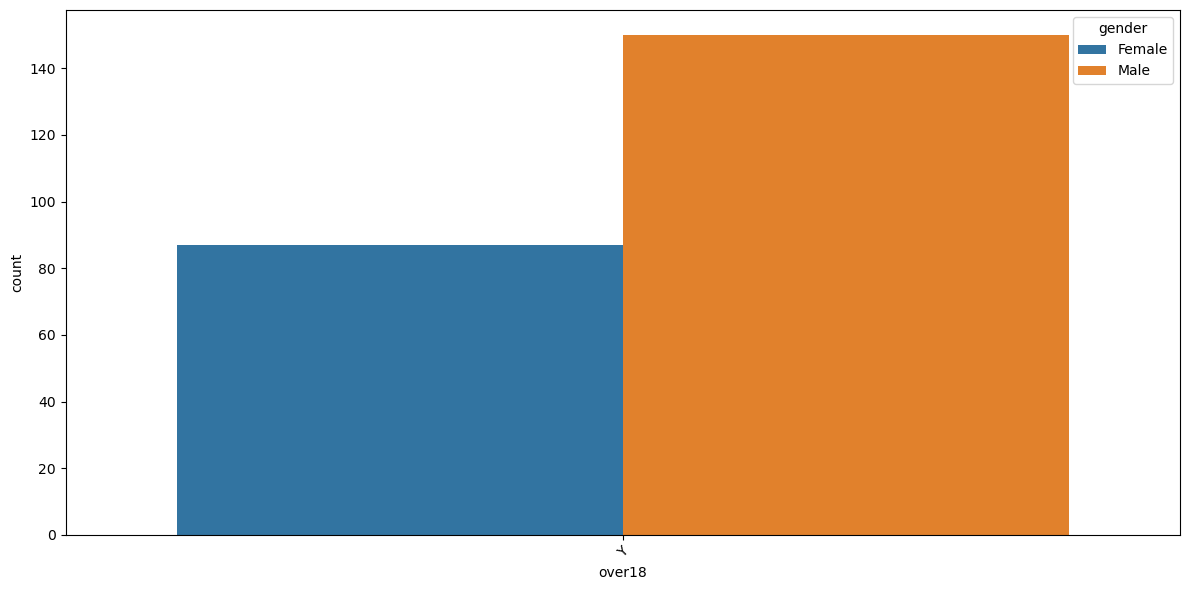

In [196]:
#bivariate analysis of over18

print(df['over18'].unique())
gd_env = pd.crosstab(
    index=[df['over18']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, over18)
) * 100

print(gd_env)
sns.catplot(data = df , x = "over18",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['over18']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, over18)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "over18", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


['Yes' 'No']
attrition         No        Yes
overtime                       
No         89.563567  10.436433
Yes        69.471154  30.528846
attrition         No                   Yes           
gender        Female       Male     Female       Male
overtime                                             
No         34.914611  54.648956   3.795066   6.641366
Yes        31.971154  37.500000  11.298077  19.230769


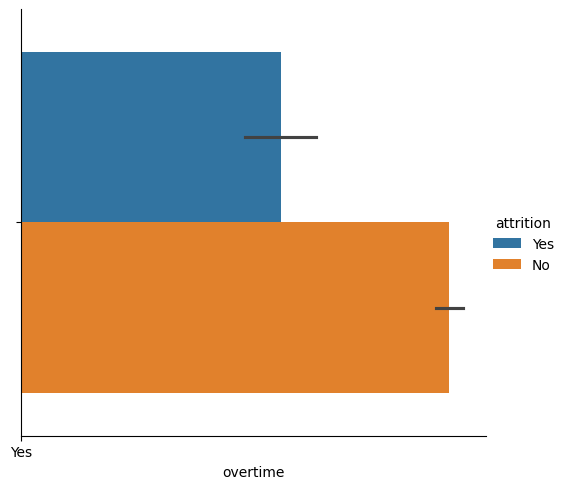

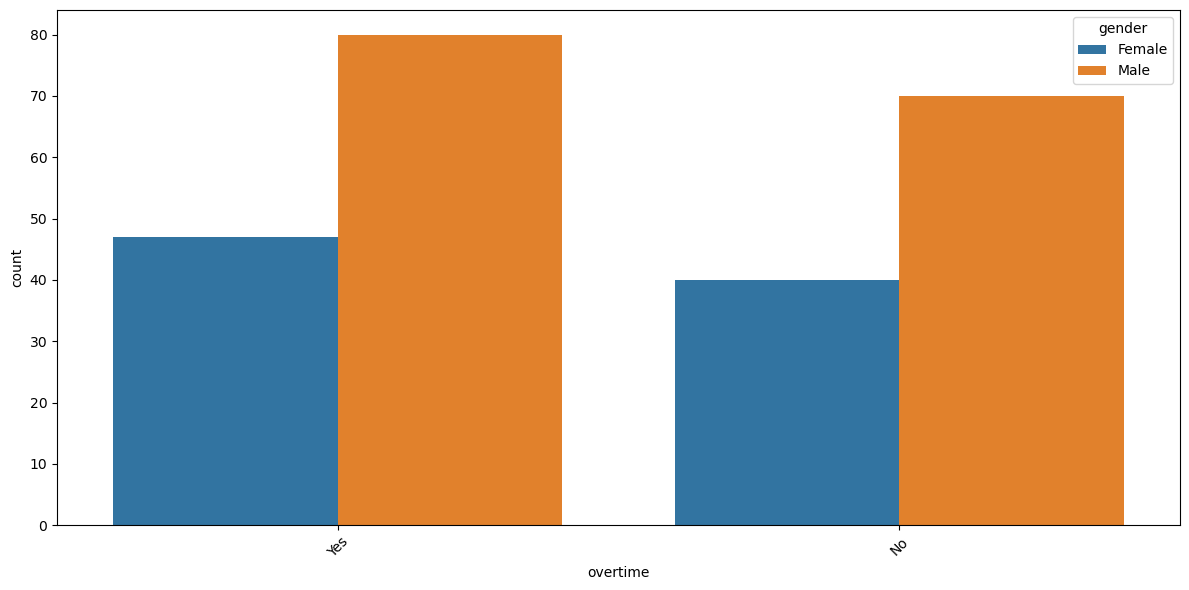

In [198]:
#bivariate analysis of overtime

print(df['overtime'].unique())
gd_env = pd.crosstab(
    index=[df['overtime']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, overtime)
) * 100

print(gd_env)
sns.catplot(data = df , x = "overtime",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['overtime']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, overtime)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "overtime", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: percentsalaryhike, dtype: float64
attrition                      No        Yes
percentsalaryhike_slab                      
11-15                   84.626234  15.373766
15-19                   84.615385  15.384615
19-23                   83.957219  16.042781
23-27                   82.051282  17.948718


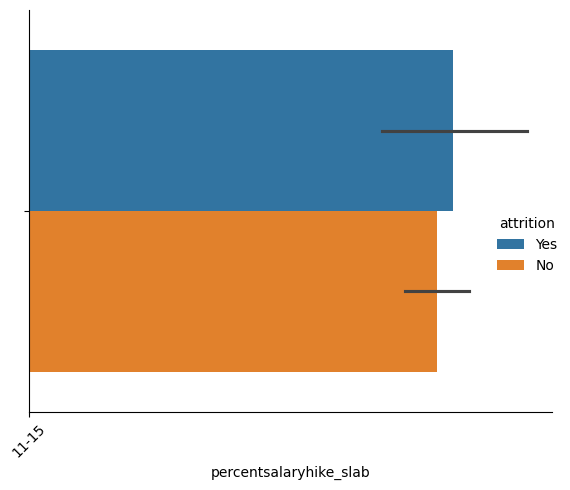

attrition                      No                  Yes           
gender                     Female       Male    Female       Male
percentsalaryhike_slab                                           
11-15                   33.568406  51.057828  5.077574  10.296192
15-19                   33.538462  51.076923  6.153846   9.230769
19-23                   35.828877  48.128342  7.486631   8.556150
23-27                   30.769231  51.282051  2.564103  15.384615


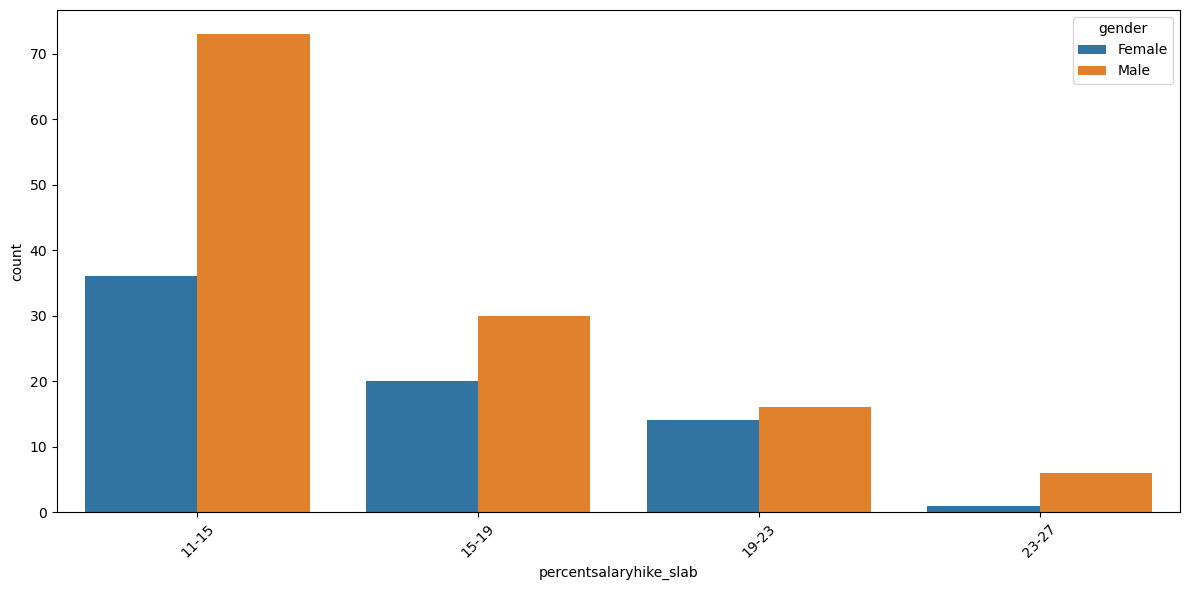

In [111]:
#bivariate analysis of percentsalaryhike

print(df['percentsalaryhike'].unique())
print(df['percentsalaryhike'].describe())

df1['percentsalaryhike_slab'] = pd.cut(df1['percentsalaryhike'],bins=[11,15,19,23,27],labels=["11-15","15-19","19-23","23-27"])
gd_env = pd.crosstab(
    index=[df1['percentsalaryhike_slab']], 
    columns=[df1['attrition']], 
    normalize='index'  # to get percentage within each (Gender, percentsalaryhike)
) * 100

print(gd_env)
sns.catplot(data = df , x = "percentsalaryhike_slab",hue="attrition", kind="bar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


gd_env = pd.crosstab(
    index=[df['percentsalaryhike_slab']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, percentsalaryhike)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "percentsalaryhike_slab", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[3 4]
attrition                 No        Yes
performancerating                      
3                  83.922830  16.077170
4                  83.628319  16.371681
attrition                 No                  Yes           
gender                Female       Male    Female       Male
performancerating                                           
3                  33.922830  50.000000  5.787781  10.289389
4                  34.955752  48.672566  6.637168   9.734513


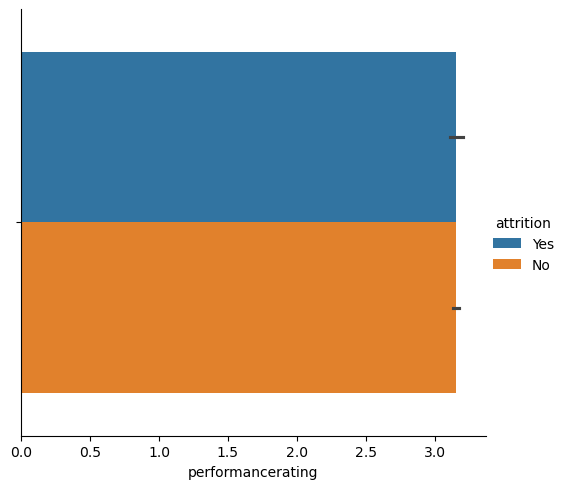

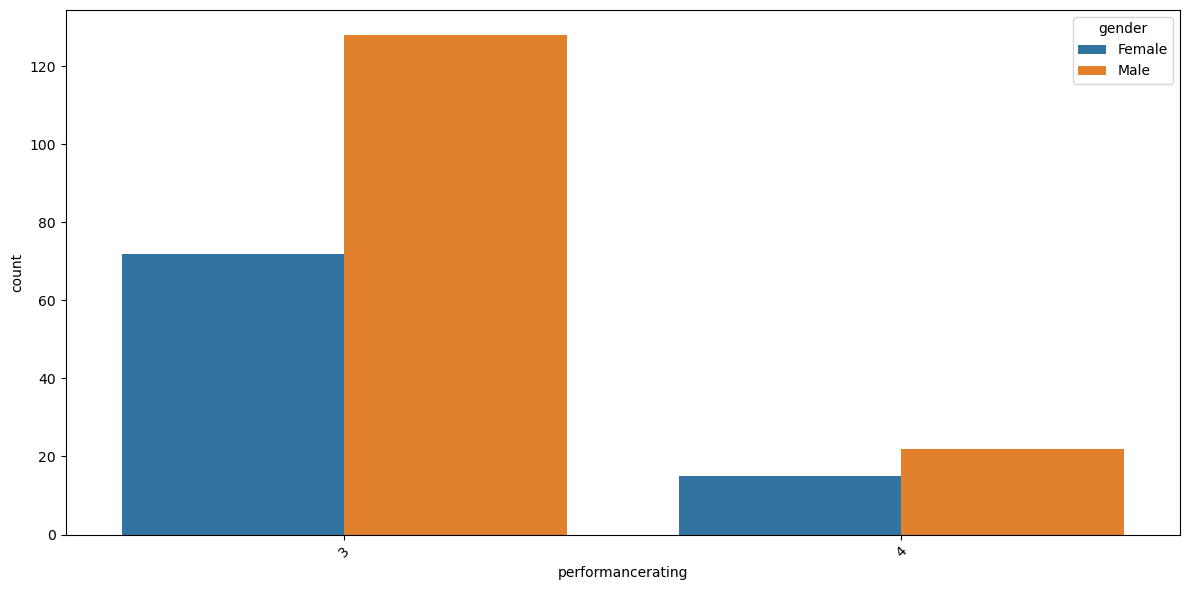

In [202]:
#bivariate analysis of performancerating

print(df['performancerating'].unique())
gd_env = pd.crosstab(
    index=[df['performancerating']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, performancerating)
) * 100

print(gd_env)
sns.catplot(data = df , x = "performancerating",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['performancerating']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, performancerating)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "performancerating", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[1 4 2 3]
attrition                        No        Yes
relationshipsatisfaction                      
1                         79.347826  20.652174
2                         85.148515  14.851485
3                         84.531590  15.468410
4                         85.185185  14.814815
attrition                        No                   Yes           
gender                       Female       Male     Female       Male
relationshipsatisfaction                                            
1                         32.608696  46.739130  10.144928  10.507246
2                         33.663366  51.485149   4.620462  10.231023
3                         36.165577  48.366013   5.010893  10.457516
4                         33.101852  52.083333   5.092593   9.722222


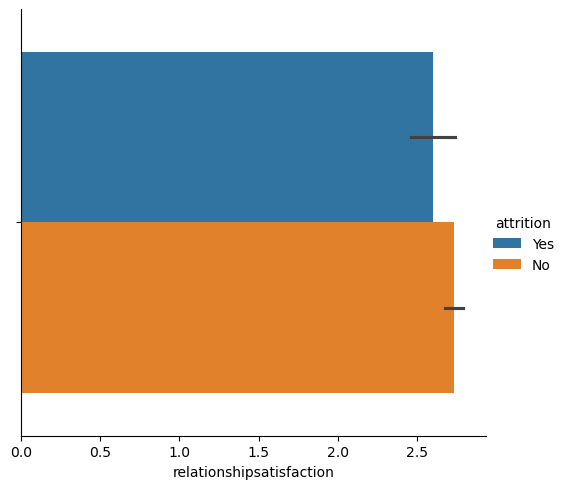

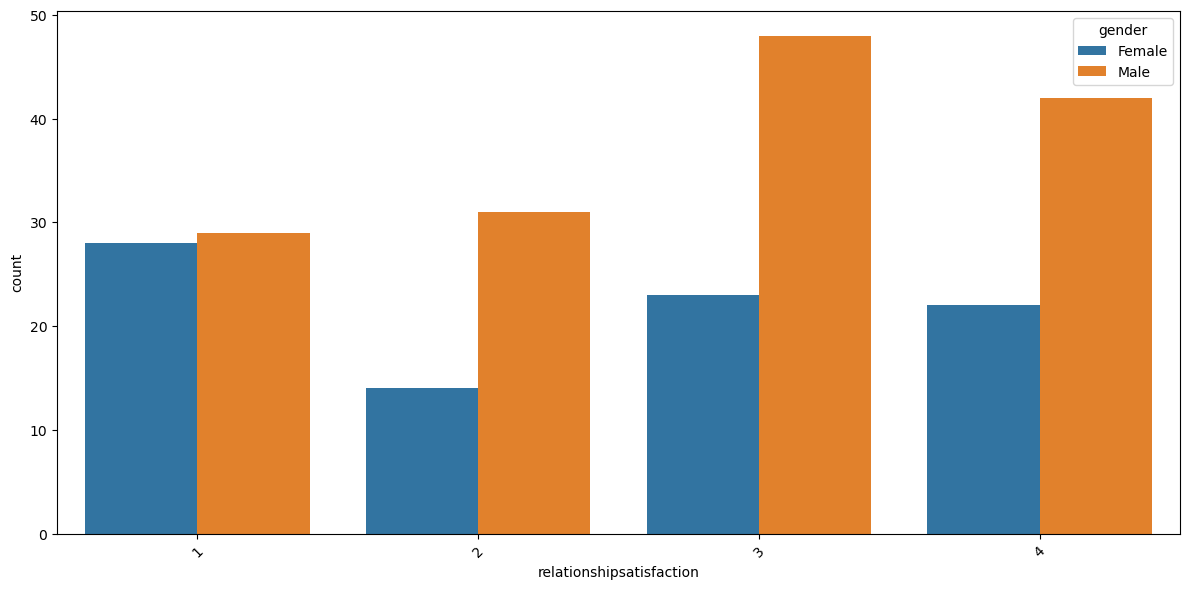

In [204]:
#bivariate analysis of relationshipsatisfaction

print(df['relationshipsatisfaction'].unique())
gd_env = pd.crosstab(
    index=[df['relationshipsatisfaction']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, relationshipsatisfaction)
) * 100

print(gd_env)
sns.catplot(data = df , x = "relationshipsatisfaction",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['relationshipsatisfaction']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, relationshipsatisfaction)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "relationshipsatisfaction", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[80]
attrition             No        Yes
standardhours                      
80             83.877551  16.122449
attrition             No                  Yes           
gender            Female       Male    Female       Male
standardhours                                           
80             34.081633  49.795918  5.918367  10.204082


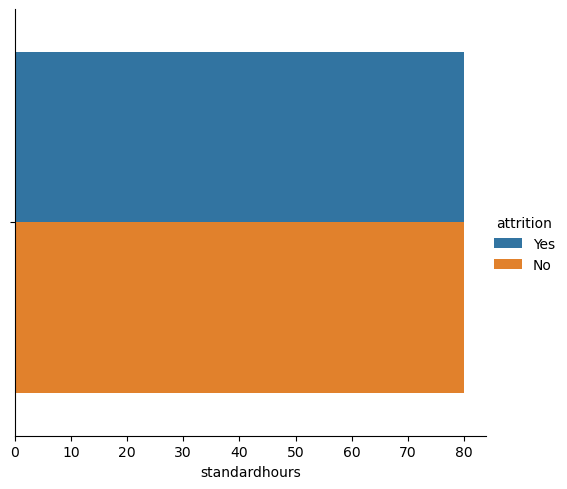

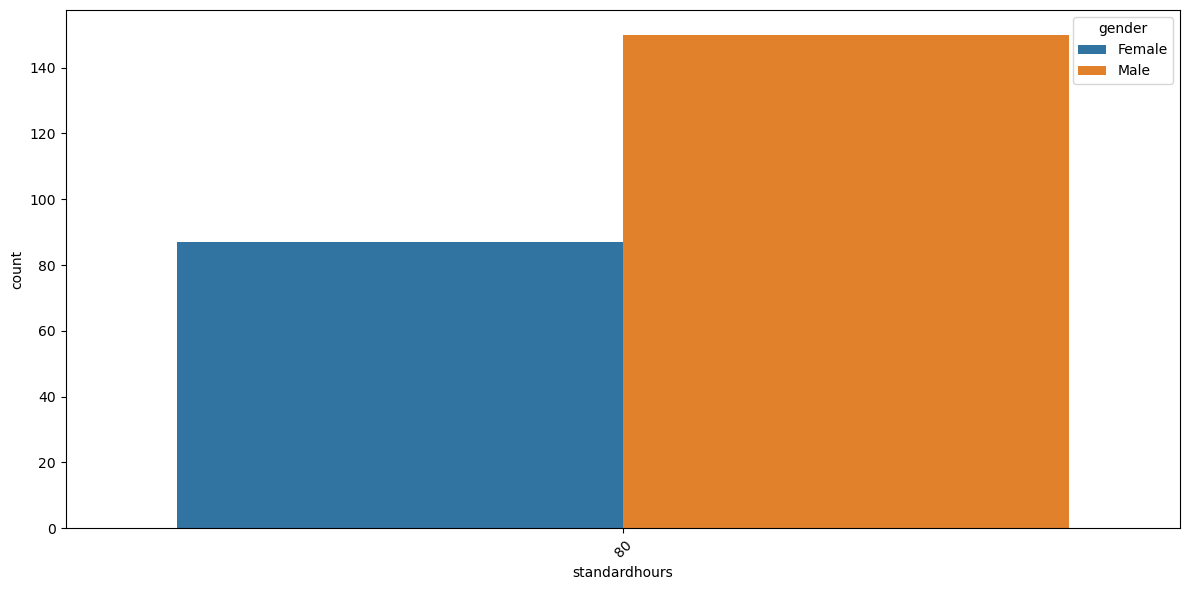

In [206]:
#bivariate analysis of standardhours

print(df['standardhours'].unique())
gd_env = pd.crosstab(
    index=[df['standardhours']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, standardhours)
) * 100

print(gd_env)
sns.catplot(data = df , x = "standardhours",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['standardhours']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, standardhours)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "standardhours", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[0 1 3 2]
attrition                No        Yes
stockoptionlevel                      
0                 75.594295  24.405705
1                 90.604027   9.395973
2                 92.405063   7.594937
3                 82.352941  17.647059
attrition                No                  Yes           
gender               Female       Male    Female       Male
stockoptionlevel                                           
0                 31.061807  44.532488  9.350238  15.055468
1                 37.248322  53.355705  3.187919   6.208054
2                 34.177215  58.227848  2.531646   5.063291
3                 34.117647  48.235294  5.882353  11.764706


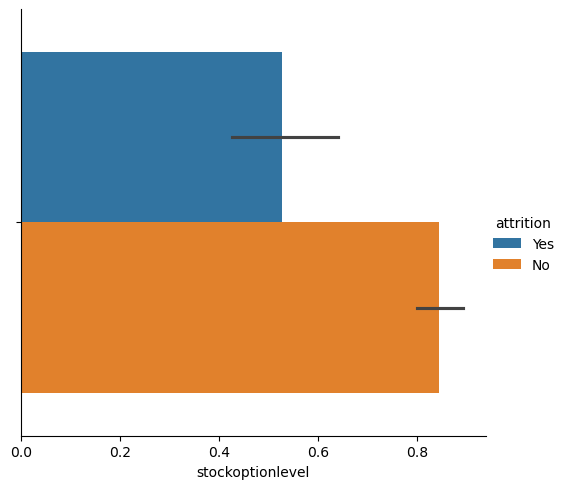

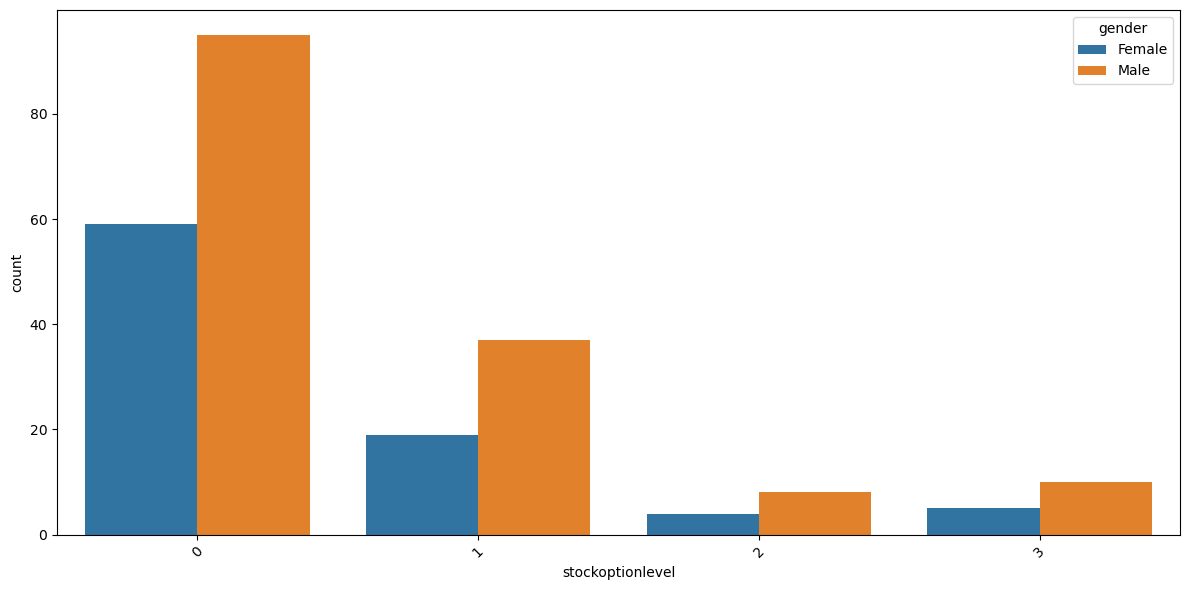

In [208]:
#bivariate analysis of stockoptionlevel

print(df['stockoptionlevel'].unique())
gd_env = pd.crosstab(
    index=[df['stockoptionlevel']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, stockoptionlevel)
) * 100

print(gd_env)
sns.catplot(data = df , x = "stockoptionlevel",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['stockoptionlevel']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, stockoptionlevel)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "stockoptionlevel", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [121]:
# df1.drop(columns='totalworkingyears_slab',inplace=True)
df1.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'AgeGroup', 'dailyrate_slab',
       'distancefromhome_slab', 'hourlyrate_slab', 'percentsalaryhike_slab'],
      dtype='object')

[ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: totalworkingyears, dtype: float64
attrition                       No         Yes
totalworkingyears_slab                        
0-3                      62.337662   37.662338
3-6                      81.884058   18.115942
6-9                      84.285714   15.714286
9-12                     87.062937   12.937063
12-15                    88.785047   11.214953
15-18                    89.690722   10.309278
18-21                    93.023256    6.976744
21-24                    88.524590   11.475410
24-27                    94.285714    5.714286
27-30                    96.774194    3.225806
30-33                    92.000000    8.000000
33-36                    92.857143    7.142857
36-39      

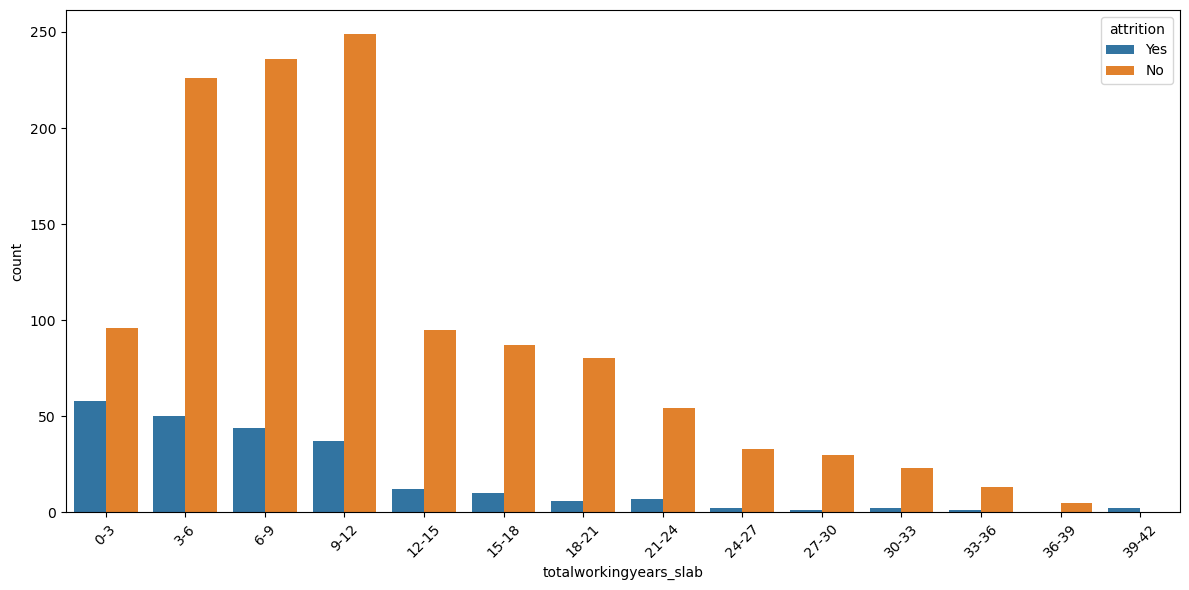

In [133]:
#bivariate analysis of totalworkingyears

print(df['totalworkingyears'].unique())
print(df['totalworkingyears'].describe())
df1['totalworkingyears_slab'] = pd.cut(df1['totalworkingyears'],
                                       bins=[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42],
                                       labels=["0-3","3-6","6-9","9-12","12-15","15-18","18-21","21-24","24-27","27-30","30-33","33-36","36-39","39-42"])
gd_env = pd.crosstab(
    index=[df1['totalworkingyears_slab']], 
    columns=[df1['attrition']], 
    normalize='index'  # to get percentage within each (Gender, totalworkingyears)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df1, x = "totalworkingyears_slab", hue="attrition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




attrition                      No                   Yes           
gender                     Female       Male     Female       Male
totalworkingyears_slab                                            
0-3                     22.727273  39.610390  16.883117  20.779221
3-6                     29.347826  52.536232   5.797101  12.318841
6-9                     35.357143  48.928571   5.357143  10.357143
9-12                    35.314685  51.748252   4.895105   8.041958
12-15                   32.710280  56.074766   4.672897   6.542056
15-18                   40.206186  49.484536   2.061856   8.247423
18-21                   45.348837  47.674419   1.162791   5.813953
21-24                   37.704918  50.819672   3.278689   8.196721
24-27                   37.142857  57.142857   2.857143   2.857143
27-30                   64.516129  32.258065   0.000000   3.225806
30-33                   36.000000  56.000000   8.000000   0.000000
33-36                   21.428571  71.428571   7.142857   0.00

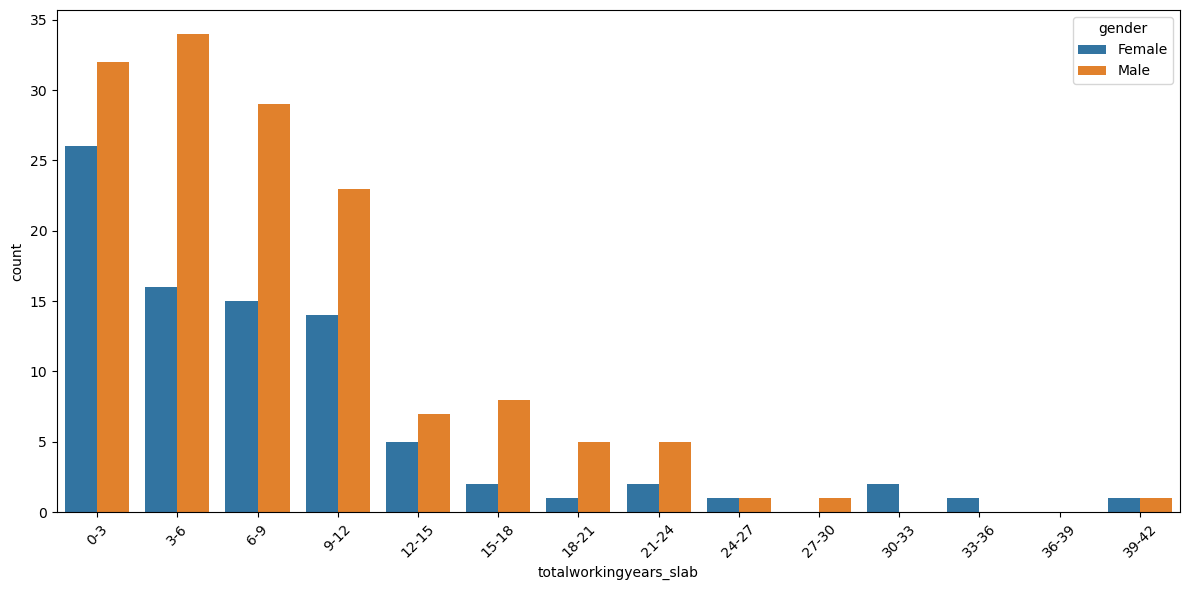

In [131]:
gd_env = pd.crosstab(
    index=[df1['totalworkingyears_slab']], 
    columns=[df1['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, stockoptionlevel)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df1[df1['attrition']== "Yes"], x = "totalworkingyears_slab", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[0 3 2 5 1 4 6]
attrition                     No        Yes
trainingtimeslastyear                      
0                      72.222222  27.777778
1                      87.323944  12.676056
2                      82.084095  17.915905
3                      85.947047  14.052953
4                      78.861789  21.138211
5                      88.235294  11.764706
6                      90.769231   9.230769
attrition                     No                   Yes           
gender                    Female       Male     Female       Male
trainingtimeslastyear                                            
0                      22.222222  50.000000  14.814815  12.962963
1                      30.985915  56.338028   5.633803   7.042254
2                      33.455210  48.628885   5.850091  12.065814
3                      34.419552  51.527495   5.295316   8.757637
4                      33.333333  45.528455   6.504065  14.634146
5                      38.655462  49.579832   5.882353   5.8

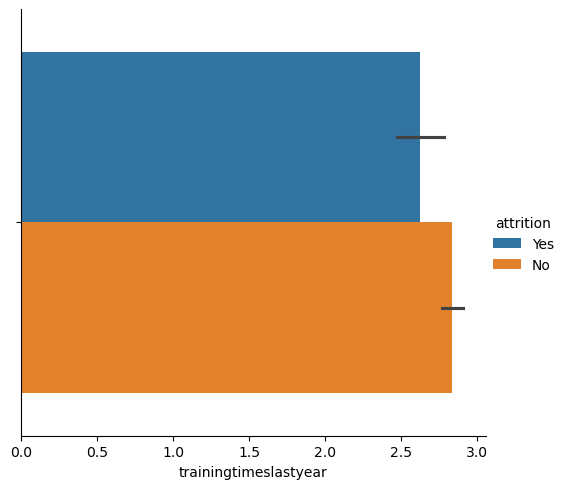

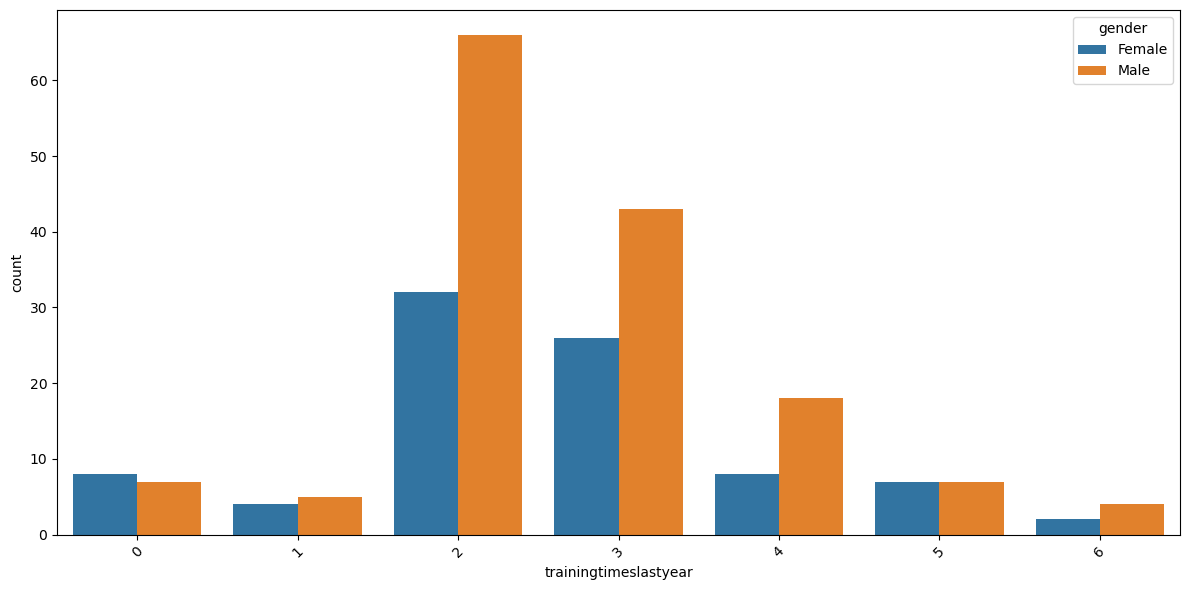

In [212]:
#bivariate analysis of trainingtimeslastyear

print(df['trainingtimeslastyear'].unique())
gd_env = pd.crosstab(
    index=[df['trainingtimeslastyear']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, trainingtimeslastyear)
) * 100

print(gd_env)
sns.catplot(data = df , x = "trainingtimeslastyear",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['trainingtimeslastyear']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, stockoptionlevel)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "trainingtimeslastyear", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[1 3 2 4]
attrition               No        Yes
worklifebalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059
attrition               No                  Yes           
gender              Female       Male    Female       Male
worklifebalance                                           
1                28.750000  40.000000  8.750000  22.500000
2                34.011628  49.127907  5.523256  11.337209
3                35.610302  50.167973  5.263158   8.958567
4                28.104575  54.248366  9.150327   8.496732


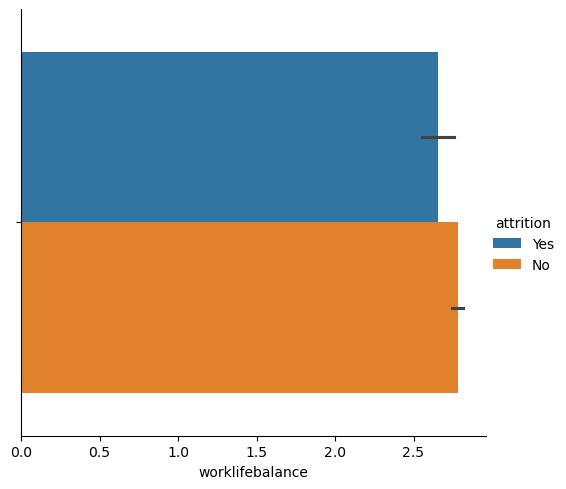

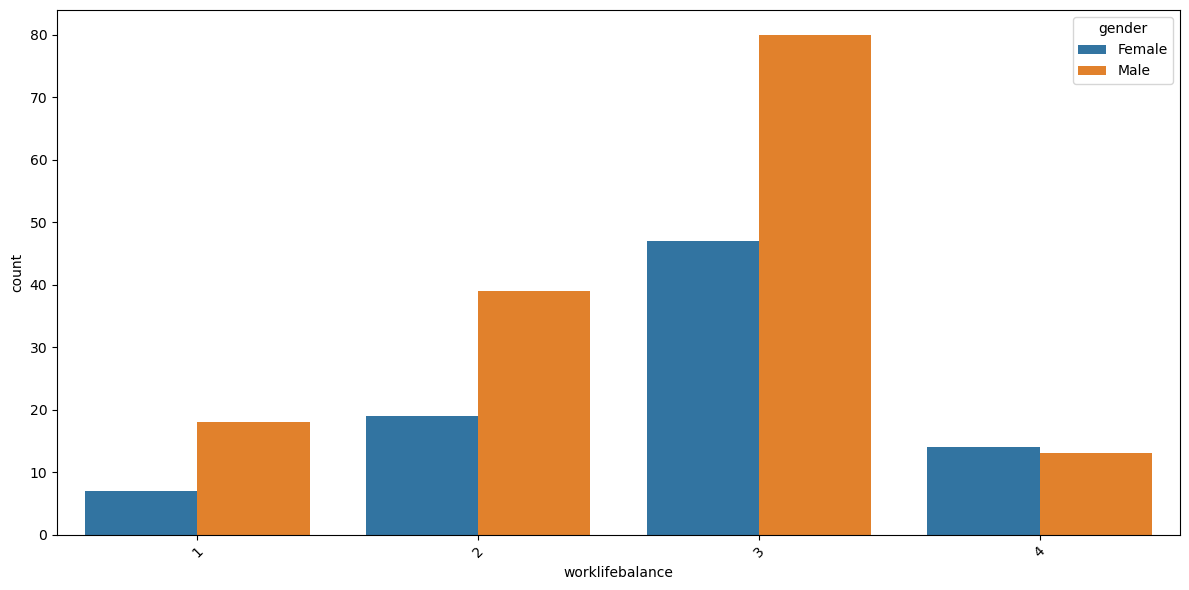

In [214]:
#bivariate analysis of worklifebalance

print(df['worklifebalance'].unique())
gd_env = pd.crosstab(
    index=[df['worklifebalance']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, worklifebalance)
) * 100

print(gd_env)
sns.catplot(data = df , x = "worklifebalance",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['worklifebalance']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, worklifebalance)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "worklifebalance", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
attrition               No         Yes
yearsatcompany                        
0                63.636364   36.363636
1                65.497076   34.502924
2                78.740157   21.259843
3                84.375000   15.625000
4                82.727273   17.272727
5                89.285714   10.714286
6                88.157895   11.842105
7                87.777778   12.222222
8                88.750000   11.250000
9                90.243902    9.756098
10               85.000000   15.000000
11               93.750000    6.250000
12              100.000000    0.000000
13               91.666667    8.333333
14               88.888889   11.111111
15               95.000000    5.000000
16               91.666667    8.333333
17               88.888889   11.111111
18               92.307692    7.692308
19               90.909091    9.090909
20               96.296296  

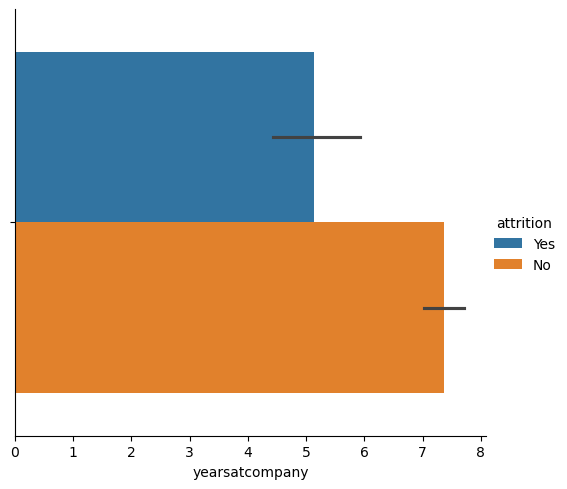

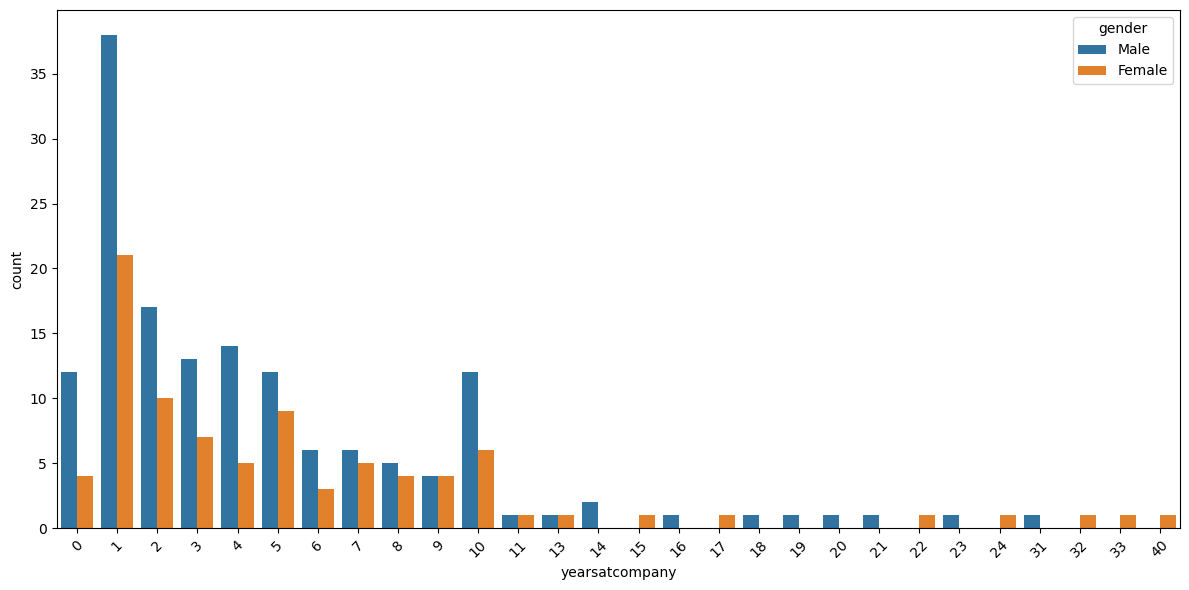

In [216]:
#bivariate analysis of yearsatcompany

print(df['yearsatcompany'].unique())
gd_env = pd.crosstab(
    index=[df['yearsatcompany']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, yearsatcompany)
) * 100

print(gd_env)
sns.catplot(data = df , x = "yearsatcompany",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['yearsatcompany']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, yearsatcompany)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "yearsatcompany", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
attrition                   No        Yes
yearsincurrentrole                       
0                    70.081967  29.918033
1                    80.701754  19.298246
2                    81.720430  18.279570
3                    88.148148  11.851852
4                    85.576923  14.423077
5                    97.222222   2.777778
6                    94.594595   5.405405
7                    86.036036  13.963964
8                    92.134831   7.865169
9                    91.044776   8.955224
10                   93.103448   6.896552
11                  100.000000   0.000000
12                   90.000000  10.000000
13                   92.857143   7.142857
14                   90.909091   9.090909
15                   75.000000  25.000000
16                  100.000000   0.000000
17                  100.000000   0.000000
18                  100.000000   0.000000
attrition                  No                    Yes       

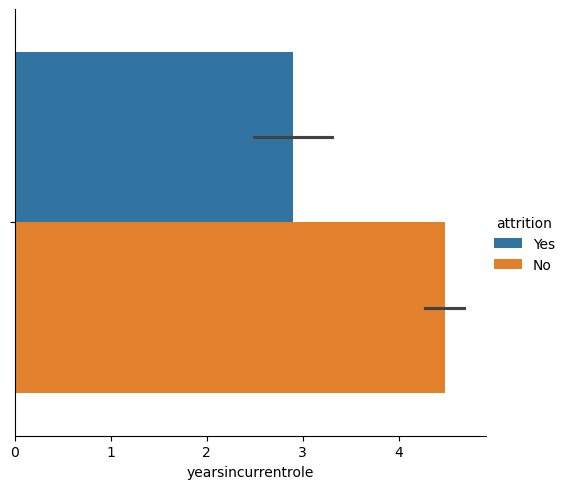

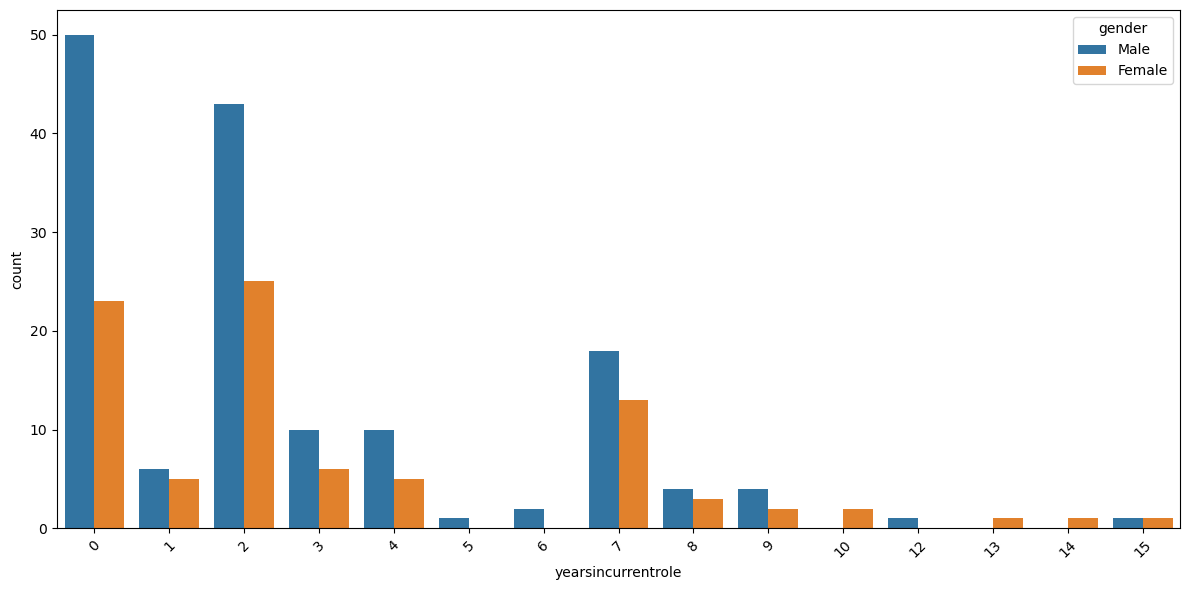

In [218]:
#bivariate analysis of yearsincurrentrole

print(df['yearsincurrentrole'].unique())
gd_env = pd.crosstab(
    index=[df['yearsincurrentrole']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, yearsincurrentrole)
) * 100

print(gd_env)
sns.catplot(data = df , x = "yearsincurrentrole",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['yearsincurrentrole']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, yearsincurrentrole)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "yearsincurrentrole", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
attrition                        No        Yes
yearssincelastpromotion                       
0                         81.067126  18.932874
1                         86.274510  13.725490
2                         83.018868  16.981132
3                         82.692308  17.307692
4                         91.803279   8.196721
5                         95.555556   4.444444
6                         81.250000  18.750000
7                         78.947368  21.052632
8                        100.000000   0.000000
9                         76.470588  23.529412
10                        83.333333  16.666667
11                        91.666667   8.333333
12                       100.000000   0.000000
13                        80.000000  20.000000
14                        88.888889  11.111111
15                        76.923077  23.076923
attrition                       No                   Yes           
gender                      Female  

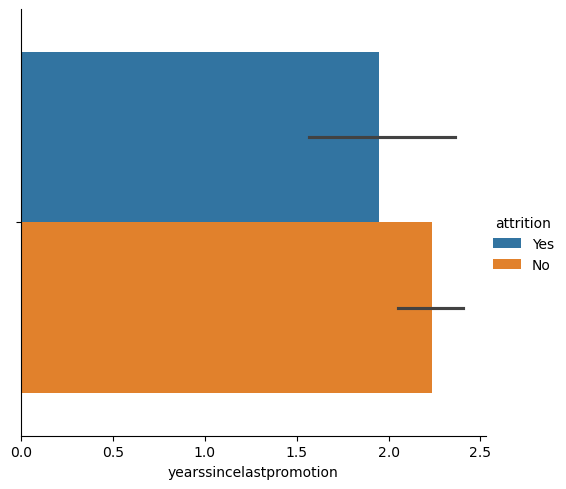

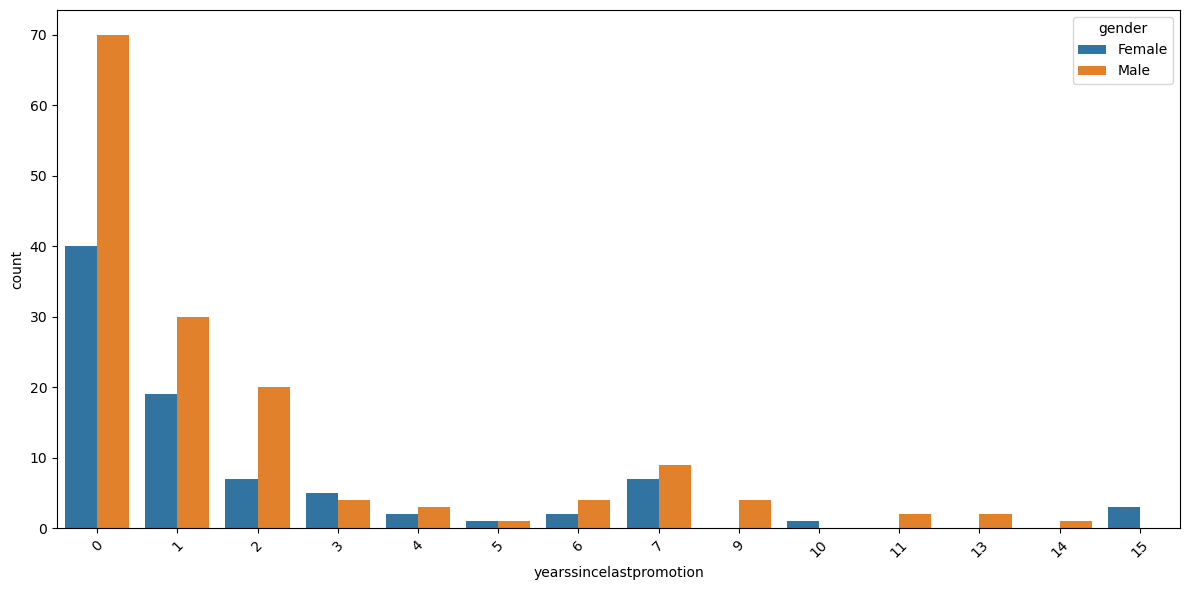

In [222]:
#bivariate analysis of yearssincelastpromotion

print(df['yearssincelastpromotion'].unique())
gd_env = pd.crosstab(
    index=[df['yearssincelastpromotion']], 
    columns=[df['attrition']], 
    normalize='index'  # to get percentage within each (Gender, yearssincelastpromotion)
) * 100

print(gd_env)
sns.catplot(data = df , x = "yearssincelastpromotion",hue="attrition", kind="bar")

gd_env = pd.crosstab(
    index=[df['yearssincelastpromotion']], 
    columns=[df['attrition'],df['gender']], 
    normalize='index'  # to get percentage within each (Gender, yearssincelastpromotion)
) * 100

print(gd_env)
plt.figure(figsize=(12,6))  # Adjust width and height as needed
sns.countplot(data = df[df['attrition']== "Yes"], x = "yearssincelastpromotion", hue="gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode 'attrition' column to binary
df['attrition'] = df['attrition'].map({'Yes': 1, 'No': 0})

# Drop unnecessary columns
df = df.drop(['employeecount', 'employeenumber', 'over18', 'standardhours'], axis=1)

# One-hot encode categorical variables
df = pd.get_dummies(df)

# Split data
X = df.drop('attrition', axis=1)
y = df['attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



In [141]:
df.columns

Index(['age', 'attrition', 'dailyrate', 'distancefromhome', 'education',
       'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel',
       'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'businesstravel_Non-Travel', 'businesstravel_Travel_Frequently',
       'businesstravel_Travel_Rarely', 'department_Human Resources',
       'department_Research & Development', 'department_Sales',
       'educationfield_Human Resources', 'educationfield_Life Sciences',
       'educationfield_Marketing', 'educationfield_Medical',
       'educationfield_Other', 'educationfield_Technical Degree',
       'gender_Female', 'gender_Male', 'jobrole_Healthcare Representative',
       'jobrol

In [179]:
cl_df = pd.read_csv(r"D:\Jeeva\ds_course\employee_attrition\employee_attrition_cleaned.csv")
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load your dataframe (assuming it's already loaded as 'df')

df = cl_df

print(df.columns)
# Step 1: Drop non-informative columns
df = df.drop(['employeecount', 'employeenumber', 'over18',
              'standardhours'], axis=1)

print(df.columns)

# Step 2: Encode target variable 'attrition' (Yes=1, No=0)
df['attrition'] = df['attrition'].map({'Yes': 1, 'No': 0})

# Step 3: Label encode binary categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])           # Female=0, Male=1
df['overtime'] = le.fit_transform(df['overtime'])       # No=0, Yes=1

# Step 4: One-hot encode multi-class categorical variables
df = pd.get_dummies(df, columns=[
    'businesstravel', 'department', 'educationfield', 
    'jobrole', 'maritalstatus'
], drop_first=True)

# # Step 5: Split data
X = df.drop('attrition', axis=1)
y = df['attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy Score: {accuracy:.4f}")
print("Classification Report:\n", report)


Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')
Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyin

C:\Users\JEEVA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = cl_df

# Drop irrelevant columns
df = df.drop(['employeecount', 'employeenumber', 'over18',
              'standardhours'], axis=1)

# Convert target variable to binary
df["attrition"] = df["attrition"].apply(lambda x: 1 if x == "Yes" else 0)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df.drop("attrition", axis=1)
y = df["attrition"]

# --- ✅ Scaling numeric features ---
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# --- ✅ Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- ✅ Logistic Regression with class_weight='balanced' ---
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# --- ✅ Prediction and Evaluation ---
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Check class distribution
print("\nTarget distribution:\n", y.value_counts(normalize=True))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")



Confusion Matrix:
 [[191  56]
 [ 16  31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       247
           1       0.36      0.66      0.46        47

    accuracy                           0.76       294
   macro avg       0.64      0.72      0.65       294
weighted avg       0.83      0.76      0.78       294


Target distribution:
 attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

Accuracy: 0.7551


<Axes: >

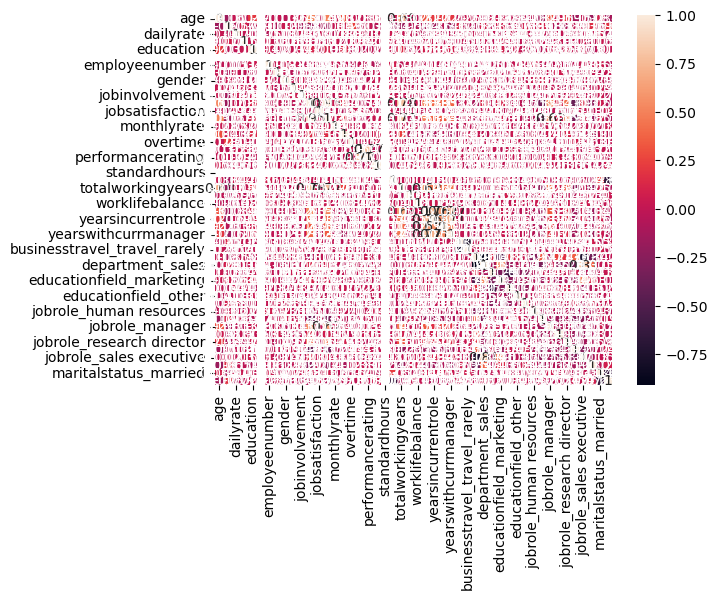

In [85]:
sns.heatmap(df.corr(), annot=True)


In [87]:
df.columns

Index(['age', 'attrition', 'dailyrate', 'distancefromhome', 'education',
       'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'businesstravel_travel_frequently', 'businesstravel_travel_rarely',
       'department_research & development', 'department_sales',
       'educationfield_life sciences', 'educationfield_marketing',
       'educationfield_medical', 'educationfield_other',
       'educationfield_technical degree', 'jobrole_human resources',
       'jobrole_laboratory technician', 'jobrole_manager',
       'jobrole_manufac

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   age                                1470 non-null   int64
 1   attrition                          1470 non-null   int64
 2   dailyrate                          1470 non-null   int64
 3   distancefromhome                   1470 non-null   int64
 4   education                          1470 non-null   int64
 5   employeecount                      1470 non-null   int64
 6   employeenumber                     1470 non-null   int64
 7   environmentsatisfaction            1470 non-null   int64
 8   gender                             1470 non-null   int64
 9   hourlyrate                         1470 non-null   int64
 10  jobinvolvement                     1470 non-null   int64
 11  joblevel                           1470 non-null   int64
 12  jobsatisfaction     

In [1]:
df.corr()['attrition'].sort_values(ascending=False)

NameError: name 'df' is not defined

In [121]:
selected_features = df.corr()['attrition'].abs().sort_values(ascending=False)
selected_features = selected_features[selected_features > 0.1]
selected_features = selected_features.drop('attrition')  # exclude self-correlation
print(selected_features.index.tolist())


['overtime', 'maritalstatus_single', 'totalworkingyears', 'joblevel', 'yearsincurrentrole', 'monthlyincome', 'age', 'jobrole_sales representative', 'yearswithcurrmanager', 'stockoptionlevel', 'yearsatcompany', 'jobinvolvement', 'businesstravel_travel_frequently', 'jobsatisfaction', 'environmentsatisfaction']


In [129]:
# Set a threshold for absolute correlation
threshold = 0.1

# Get correlation with target
corr = df.corr()['attrition']
corr = corr.sort_values(ascending=False)
# Select features with abs(correlation) above threshold, excluding the target itself
selected_features = corr[abs(corr) > threshold].index.drop('attrition')

print("Selected features based on correlation threshold:")
print(selected_features)


Selected features based on correlation threshold:
Index(['overtime', 'maritalstatus_single', 'jobrole_sales representative',
       'businesstravel_travel_frequently', 'environmentsatisfaction',
       'jobsatisfaction', 'jobinvolvement', 'yearsatcompany',
       'stockoptionlevel', 'yearswithcurrmanager', 'age', 'monthlyincome',
       'yearsincurrentrole', 'joblevel', 'totalworkingyears'],
      dtype='object')


In [127]:

X = df.drop('attrition', axis=1)  # Remove target column
y = df['attrition']               # Target column


from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


import pandas as pd

importances = rf.feature_importances_
feature_names = X.columns

feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)
# print(feat_importances)

top_features = feat_importances.head(10)  # Top 10 features
print(top_features)


monthlyincome        0.073258
dailyrate            0.053130
overtime             0.052535
totalworkingyears    0.051900
age                  0.051546
monthlyrate          0.048427
employeenumber       0.047275
hourlyrate           0.045414
distancefromhome     0.039682
yearsatcompany       0.035330
dtype: float64
